In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
import numpy as np

hosting = pd.read_csv('hosting.csv',header=0,sep=',')

train_set, test_set = train_test_split(hosting,test_size=0.2,random_state=2)
train_set.shape
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

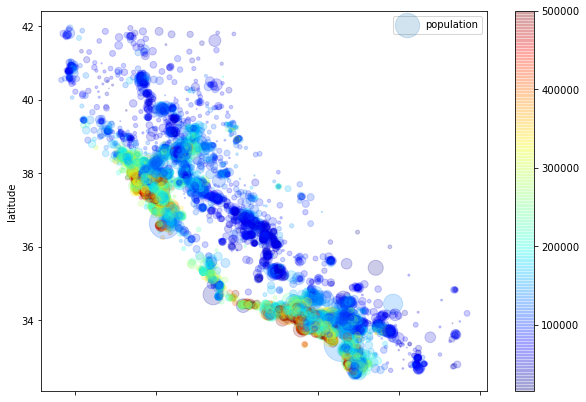

In [4]:
data =  train_set.copy()
data.plot(kind='scatter',x='longitude',y='latitude',
         s=data['population']/30,label='population',
         c=data['median_house_value'],cmap=plt.get_cmap('jetdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAkoAAAGSCAYAAAAcpu5GAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOz9d5Bla1qfiT7fMtu79N6W9/bU8a6b292iWwIJkAABjeAKgaQYoYmJAeLeuBDo6g6KUYDEHV2NCEmjhpEQEhpABglabWhzTJ2qOuVtVnrvtrfLfPePb2dlZtWuqqyqrDp1zvmeiB2ZuXK5vXLnXr/9mt8rpJRoNBqNRqPRaO7F+KhPQKPRaDQajeZ5RQsljUaj0Wg0mvughZJGo9FoNBrNfdBCSaPRaDQajeY+aKGk0Wg0Go1Gcx+0UNJoNBqNRqO5D1ooaTQajUajeaYIIcaFEJeEEOeFEGfqy5qFEF8VQtyqf23asP4vCSFGhBA3hBCf37D8RH0/I0KI3xRCiPryoBDi9+rL3xdCDG7Y5sv1Y9wSQnz5YeeqhZJGo9FoNJqPgrellEellCfrP/8i8DUp5S7ga/WfEULsB34YOAB8Afj/CSHM+jb/FPgZYFf98YX68p8G0lLKncBvAP+gvq9m4JeBF4FTwC9vFGSN0EJJo9FoNBrN88D3AV+pf/8V4Ps3LP+3UsqqlHIMGAFOCSG6gISU8l2p3LN/+65t1vb1+8Bn69GmzwNflVKuSinTwFdZF1cN0UJJo9FoNBrNs0YCfyqEOCuE+Jn6sg4p5RxA/Wt7fXkPMLVh2+n6sp7693cv37SNlNIFskDLA/Z1X6xHelofEa2trXJwcPCjPg2NRqPRaJ4JZ8+eXZZStj2r4739yityNZPZln1dvHbtClDZsOi3pJS/dddqr0opZ4UQ7cBXhRDXH7BL0WCZfMDyx92mIR8LoTQ4OMiZM2c+6tPQaDQazUPwfUnN85EShICAaWAYje5NmgchhJh4lsdbnJ/nd3/1V7dlX0d+/McrG+qOGiKlnK1/XRRC/AGqXmhBCNElpZyrp9UW66tPA30bNu8FZuvLexss37jNtBDCApLAan35W3dt880HnevHQihpNBqN5vml6nos56ssFarkyy4SkFIihEAA8bBFWyxIazxI0DIftjvNR8SzqsURQkQBQ0qZr3//OeBXgf8IfBn4tfrXP6pv8h+BfyOE+HWgG1W0fVpK6Qkh8kKIl4D3gZ8A/r8btvky8C7wg8DXpZRSCPEnwP9nQwH354BfetD5aqGk0Wg0msei5vpMrBSZyZQRQCRgkQjbGGI9guRLSc31GVkscGuxQE8qzGBrFNvUJbLPE1YoROu+fc/qcB3AH9Q7+S3g30gp/5sQ4gPg3wkhfhqYBH4IQEp5RQjx74CrgAv8LSmlV9/XzwH/CggD/7X+APgXwO8IIUZQkaQfru9rVQjx94AP6uv9qpRy9UEnq4WSRqPRaB6ZTKnGldkcni9pigQ2iaONGEIQsk1CtokvJXPZCov5Kge6E6QigWd81pr74VUqrF679kyOJaUcBY40WL4CfPY+2/x94O83WH4GONhgeYW60Grwu38J/Mutnq8WShqNRqO5L47jMD09TaWyXpu7WnIZWakSDZoETEHmEfdZ83xGRn12tgRpjny6b0OhUIje3l5s2/6oT6VhlbNGCyWNRqPRPIDp6Wni8TiDg4MIIciUasxNpjnUGnii9Jnj+WTKNbr6mz61kSUpJSsrK0xPTzM0NPSRnosVCtHy7FJvHyu0UNJoNBrNfalUKndEUs31uTKbIxGyn7jGyDYN4kGbq3M5Xhhs/lTWLAkhaGlpYWlp6aM+FdxKhfQzSr193Pj0vTI1Go1G80jUi26ZWCni+XLbOtdCtonrScaXi9uyv48j4j61Xc8agRIE2/H4pKEjShqNRqN5KFXXYyZTpmmb02TJsM1Mpkx/S+Qjsw4YHx/nS1/6EpcvX37gOu+88w4/+qM/CsCZM2f47d/+bX7zN3/zWZ3mU8UMhWjSqbeGaKGk0Wg0moeylK+qqMM2R0CMutfScr5KT1NkW/e9nYyPj/Nv/s2/uSOUTp48ycmTD/RU/FjhVSpkdOqtIZ/EKJlGo9FotpnlQpVI4Ol8to4ELJYK1fv+fnx8nL179/LlL3+Zw4cP84M/+IOUSiW+9rWvcezYMQ4dOsRP/dRPUa2qfQwODvILv/ALnDp1ilOnTjEyMgLAT/7kT/L7v//7d/Ybi8UaHuv111/n+PHjHD9+nHfeeQeAX/zFX+Tb3/42R48e5Td+4zf45je/yZe+9CUAVldX+f7v/34OHz7MSy+9xMWLFwH4lV/5FX7qp36Kt956i+Hh4ec++iS26fFJ46lHlIQQJnAGmJFSfkkI8b8Cfx6oAbeBvyalzDzt89BoNBrN4+H7knzZJRF+Oi3sAcsgV3bwfXnfcSc3btzgX/yLf8Grr77KT/3UT/Hrv/7r/LN/9s/42te+xu7du/mJn/gJ/uk//af8/M//PACJRILTp0/z27/92/z8z/88//k//+ctnUt7eztf/epXCYVC3Lp1ix/5kR/hzJkz/Nqv/Rr/8B/+wzv7+eY3v3lnm1/+5V/m2LFj/OEf/iFf//rX+Ymf+AnOnz8PwPXr1/nGN75BPp9nz549/NzP/dxzYQVwN2YoREqn3hryLFJvfwe4BiTqP38V+CUppSuE+Aco6/BfeAbn8VCkhHQRMiUIWtAah+Dz93rWaDSaZ0rN85Fsf9ptDUMI5eDt+YSMxnVKfX19vPrqqwD82I/9GH/v7/09hoaG2L17NwBf/vKX+Sf/5J/cEUo/8iM/cufr3/27f3fL5+I4Dn/7b/9tzp8/j2ma3Lx586HbfOc73+E//If/AMBnPvMZVlZWyGazAHzxi18kGAwSDAZpb29nYWGB3t7eB+3uI8GrVMjp1FtDnqpQEkL0Al9EuWn+jwBSyj/dsMp7qBksHzmeD+cnYTEHlgm+D4YBJwehKfpRn93TY3nZ5cYNh0LBp73dZM+eAJGIzshqNJp1pFSeP8/iOPfjUbvDNq6/9r1lWfi+Xz+WpFar3bPdb/zGb9DR0cGFCxfwfZ9QKLSF8773xNeOGQwG7ywzTRPXdR/peTwr1rreNPfytK/LPwL+Z8C/z+9/ivW5LJsQQvyMEOKMEOLMs/CYmFiC81dg4jKMXwavAGEbzk0oEfVJJJfz+OCDKlJKWloMVlc9zpyp4HlP/w3R8ySu+/SPo9Fonhwhnk0b+4MOMTk5ybvvvgvA7/7u7/I93/M9jI+P36k/+p3f+R3efPPNO+v/3u/93p2vL7/8MqBql86ePQvAH/3RH+E4zj3HyWazdHV1YRgGv/M7v4PnqZFi8XicfD7f8NzeeOMN/vW//teASsm1traSSCQarvu8YoZCJPbt25bHJ42nFlESQnwJWJRSnhVCvNXg9/8P1HC7f91oeynlbwG/BXDy5Mmnfkf9s/dhZgKsALgeTMzAkSMQa4NsCZrvrfm7g+MqMRW0H/yP/ji4rsR1IRjc/jeqmRmXQADCYaWXUymTxUWXTManpaVx+NvzJEtLPktLPoYBXV0mTU1iy+eWzbqMjFRYWlJvUM3NJjt3hmlu1jlOjeZ5JWAaCNSA26eRflvbb9C6/2f3ffv28ZWvfIW/8Tf+Brt27eIf/+N/zEsvvcQP/dAP4bouL7zwAj/7sz97Z/1qtcqLL76I7/v87u/+LgB//a//db7v+76PU6dO8dnPfpZo9N50wd/8m3+TH/iBH+Df//t/z9tvv31nncOHD2NZFkeOHOEnf/InOXbs2J1tfuVXfoW/9tf+GocPHyYSifCVr3xluy7NM8OrVMjr1FtDxNMKpwoh/hfgx1FiKISqUfq/pJQ/JoT4MvCzwGellKWH7evkyZPyzJkzT+U8ARaW4f/1mxCJQSigxI7jQKkEe47DD70KXU2Nt51YhOuzKmQcD8PxIQgHG6/7KHieZGTEZ2JCFVJGIoJ9+wRtbdsXBLxypcrCgksyuS6KFhc9Tp4M0tZ2r4auViVnzjhksz6RiMD3oVKBnh6DQ4es+xZhrrG8XOODD4qEwwaxmIEQgmLRI5/3OHYsSnf3Nlw4jUazrVy7do19+/ZxfiqN40pC9vZ7HVUcD9sSHO1r/Ea7FZ+jjQwODnLmzBlaW1u38zSfGmvXeCNCiLNSymfmP3B4eFj+8a/+6rbsq+/Hf/yZnvvT5qlFlKSUv4Qq1KYeUfqf6iLpC6ji7Te3IpKeFrUaeB5UHHj3kqpD8oMQqd+rQwGQDuTzMDIBbXGw7rpaq3m4PAVtCTANFXk6Pw4v73ny87txQ4mklhYwTYNKRXLmjM8rrwiSye35RNfVZTE+7hCNSixLUCr52DbE4wbZrI9pQiy2Lsxu3HAplSQdHetvlMkkzMx4tLQIenvv/3LyfcmlS2USCZNQaH2f0ahJMGhw+XKJtjYb29ZZco3meaQtFmRksfBUhFKp5rIz9YCwveapY4ZCxD+BabPt4KMwnPzfgCDw1Xq65j0p5c8+eJPto1aDGyMwM6cKtq9NgSlgZRYm0xBLQk8XSA8iSTixAwplmFmCga7N+ypUwDaVSAJIRmApp1J3T2IwW6tJJiclra3iTpQmFBJUqzA56XPo0Pa8UTU3mxw+HOTGjRqOA7GYoL/f4tvfruB5KkrW3Gxw+HAA0xTMzvq0tt4r0lIpg9FRnwc1cmSzHpWKRyJxr6uvZQk8D1ZXXTo67v294/gsLjrkch6RiEFHR2CT2HoUpJQUiz6eJ4nFTEzz6dZdFAoeuZxHMGjQ3Gw+N+MKNJpHpTUe5NZiYdvTb76UyPr+78fg4OCWo0mgIlCaR8OvVCjq1FtDnolQklJ+E/hm/fudz+KYjc8Dzl2EXB5aW2B+CT68CAsz0JoCuwqzIzB1G44chr/weWhOQM2B0Vno61CdcGsEbXA3FHpXHbCtdeH0uKw1YtydygoGVYTrSfF9KJXVufb12bS2mszNuaTTPu++W2Vw0L4TScpkfC5cqHHwYOC+BZ2BAOTzD07huq58oEgwDCWI7iafd/nggwK1miQQELiu5Pr1MsePR2lre7RRCqWSx4ULRTIZFyHAsgwOHAjT1fV0Un7ZrMd77xWRUuJ5kr17w+zY8WjHchx5J7qXShlaaGk+MoKWSU8qzFy2sq1jTLJlh55U+CMbX6JZR8fzG/OpGmGSyUI6A+1t4LrwrXfg1k3wazA5A4k4tLVBKAQry5DPKaEUsCFbhHIVouH1/bUloCMJC1lY0zQnhp+8oDsUUiLJdVVKbI1SCfr7n2zfy6tw6SZUa+omPDNW5YP3HMplSKV8mlIeuZxkeNiis9MilTJYXPRwHIkQqnbq7ihMqQSp1IOfdDAoHthe7PsQCm1+o5RScv58EcsSJJPrL9Vazef8+SJvvmkRCGztX9v3JefOFXEcn/Z29SbvOD4fflgkEjE37X+7mJ6uYVmCVMrC9yUjIxWGhwNbFju1muT99yt3ROjgoMX+/ds7Z0uj2QpSqg86Ay1RFvNVqq63LcKm4nhYpmCw9RPswfIQnoXtwlYwQyGiOvXWkE+VUCqV1yNC8/Nw4QKUyyr1ZgUgGIDFeRgcVuu8cwb6e9aFz92vZ8OAY0OwWlDptngYog+33HgoliXYu1dw6ZJPIrEWsVHH6+9/sDCoViUzMz4zMz6+D93dgr4+k1BIUK7A2SsQj4Jt+PzhH1f46n/36GgTtLUILl1WkZY//0XByIhLOGyQTK4fb2jI5NYtl/b29ciG50nyef+hN/BEwiKVssjnPeLxzW+w5bJHKGTQ3Lz55ZjNehQK3h1hs0YgYOB5LsvLzpYLwDMZl3ze3bQv2zYIhQympqpPRSjZNncsEBxHYttb7w4EWFpyKRRUTZiUkokJl6Eh606XokbzLAiFQqysrNDS0kLAMjjQneDcZJpUWGA/Qfjc8XzyVYfj/U1PtJ+PM1JKVlZWtuTV9LTxKhVKOvXWkE+VUAoGwK+LnbExKBVVgbbjqTRasN7xNjurIjfZrIoihYOAVJGluzEMaH0Kdhn9/QahEIyNSUol6O6GwUGDcPj+N9pKRfL++y7VqiQeF/Xn6TM1JXnxRYvVXN0ALQDvnXW4cNGno1MQDBgkEjAwYHHjWo0//arP228ZTE567Nsn7hR1JxJKiE1NeSh7MvUp8+BBi9bWh7/RHT4c5fTpAsvLNWIx9dIrFj2EgFOn4vekGh/ks2QYglpt65/E1iJidxMIqCL27cD3Jem0x8RElWLRx3Ulq6sOpZJHLGZw7NijDfwUYl2cS7nmZbMtp6rRbJne3l6mp6fZ6GcXLLlcmqwSDZoEHqPOr+b5FKs+O1uCzE2sMredJ/wxIxQKPRdO3dpw8v58qoRSUwrCISgUlAiKBaFYVj5IiXrk17KgVoRiATp7QQK5InS3KaEkJUwVYbSgRNdQDAZi66m37aS93aC9fevr37rlUasp88g1WloE2azk2jWP9u41ceIzPeXjOgbJpBKKngfFgoFpmkxPedy+LRgbc2lqMjh50sa21RM8eNBmaMgil/MRQgmlchnm5jxaW4076zUiGjV59dU4c3M1ZmdrSAk7d4bp7m5cnK0cwsWdsP9GPI97IlMPIho177gLb9xXqeRviy1BoeBx7lyJYtEnEjEIBASmKWhutiiVPJqaVETtUWhrs2hq8lhc9JASdu2yH7uIXaN5XGzbZmho6J7lB0o1rszm8HxJMmxvqcDbl5Js2cEyBfu7EqS2sdZJ82QYoRARnXpryKdKKJkmvHAUPrwEdhBqLkQsqLrrBdieC4apapj6BsAyoOjAYL3jbaoIl9LQUo+UXlPjfBiKP/OnswnXlczO+jQ33/tmlUjA8rLP4JDE9wTlsgQEliUpVCTBiMFsWkXY2jpsDEOQSIAQJl1dIXp6Nt+co1FBJGJw7ZrH+LiHZSnhEgr5vPiiRSRy/zfMQMBgYCDEwMDDQ82RiElPj83sbI3WVvuOwMlkXBIJk6amrb98YzGTvr4gk5NVUikL0xTkci62bdDT82Rv1sWiKtq2bUF7++awYzBoADbLyw4XLpQ4ejSy5U472xacOhUkn/cxTUE8rkWS5vkhFQlwaqiZ8eUiM5kyAogELAKWsUk0+VJSc31KNRcJ9KTCDLZGP7XptucVv1KholNvDflUCSWAaBRefRHaW2ByFDwHZrMwlVYXw3PAtGD3ARjsVkXcJ/asR5zGCtAchDW7n5YgjOY/eqG01s7fyPRRCQxJOASH98Lp8wIpJGZQsJAVdEWhUIKKb1AqSJqbDLq6TAYHbarVxm9mmYxkfNynvV1sEDA+N254HDu2fS+r/fujmKZgaqqKii5BW5vNwYORhxpc3ruvCMmkycRElUrFp6cnyNBQsC5mHp+rVyuYpiAWu3+Eq7XVZmGhxsKCQ3f31oWZaQpSKd0NpHk+sU2DXR1x+lsiLOerLBWq5MoO/oaCTkMI4mGLnakYrfGg7m57jtGZ/cZ86oQSqDqPXTvhh/8KfO2/q3RbxIaFApghOHgI3n4N9gxAXzvEHq205JHJZCQ3bvjUatDZCcPDxiP7+6hRJIJqVRIM3lvrY1mqm64nCt/7tsD2DbIliXdbUilLhCfwaxJpShKtqog7lbLY6PDv+6r4XQhYXZXY9ma7gGRSsLjoN0yVPS6WJThwIMqOHWEqFZ9AQBCJPN4brWEI+vpC9PVtX+FkoeCxvOzeE0lqRDJpMTpapavL1m3+mk8UQcukpylCT1ME35fUPP9OXV3ANB75Q43m2WOEQoR06q0hn0qhBOof+LVXlR3AzZtqFEckrDredu6AUFCl6u5mKLY59bZahb3Jxz+PQkHy/vseoZAgEIBbt1Tb+v79jyYGhBDs3Glw4YJHayt3hJbvS1ZWJPv2rZsrBoOCF0/ZfHjLJRHzmJoSpFd9SmVJPCbp3xFkcNDC8wQ7dtTrsqZhZER5RQHUqlCrQHPz+jk4jtr30xABoZDxXNbnrK66W74JhEIGi4sOpZJPNKo/VWs+mRiGIGTo1/fHDVmpUNWpt4Z8aoUSqEjSgf2we5cyeQwEVEv3g+irR1huF5SA2JdUxdyPy/Kyir7EYupm294umZqCvXvlI38K6+42qFZVUbfvr4e+d+wwGBzcLDJSSYMjh218RzA8LHFdg1hMsLBkUMgpgfXCC5JkUnBrBG7egpZmSNavTy5v8N5VHzsg6e1RIimdlhw+/Ml6g8xkaszPVzAMQU9PmGh0879MpeLfM9rmQQih6t80Go3meeP5+yj6fPCpFkpr2PbDBdIaQkB/TD22g40t4HCvV9Mj7o1o1CQcNZidlQSDsH+vYMcOcU9buW3DYI9gbtnmZC9IJNeue5QqkkN71EncuOETDFrcHhO0t212JU/EBSdOWExOeQQDPqGQ4NAh857C748zS0sVPvggTTBo4vuSiYkSr7zSskksKU+nR9tvo0ilRqPRfJRoe4D7o4XSR0x7u+DWLUkmo2p+8nnJ7t3isXL6t0bUIxEX7NopqNVgdFy5kZ88ce9Q371DajzLYlodd3xScmSvoK9dCaulJZ/rN3ykb24SSWu0NAs83+K1lyWxWOPxJh9nbt4skEjYhMNK2aTTNSYnS+zbt26c1dRk4XmVLe2vVvMJBkXd9kCj0WieH0QoREDXKDVEC6WPmHBY8PLLBmNjqph7aMigt/fRBUcuB7dH2RT5CQTUz4tLMDMLA3eNPwnYcPIA5Itwe1QS8SRdHWsdbDA5JbhyVRKOqPqtYNCnWPAQhrgzUHZt/tt2aaRazefq1Ry2Ldi7N/HUh9Y+CNeVmzriLEvgupvNKRMJg0TCpFTyHyqAslmPfftCurBVo9E8d8hKBUfXKDVEC6XngGhUcPDgk+Vj5ubVkNtGkZ9UEsbG7xVKa8Sj0NctmJ1SKbfJKZicUHVb3T2CySn4sz+rYRhlkgkJSEzboK0rSrZoMb4EXT40xRof/1FYXq4yNVVCCEFXV5jm5o/OkK6vL8z163laWgL4vvJLOnBgc8ecEIIDB0K8+24R0+S+VgOZjEs8bjySNYBGo9E8S3SsuzFaKH1CqFTuX2dl2yri9CCamgQdHSbj4z43bwoiEWhqgh3DBoWCy9mzFRKJAL29PjUPbkz4vH+pyOf+XIKFrGBqBZIROL4TQk+gBRIJm2hUDbv9qDvDBgej+D5MTirhduxYira2e60FUimLF1+McvZs8c4su2DQQEpJsehTKvmkUibHjkUe6Fyu0Wg0HxUiFMLWqbeGaKH0CSGZhIUFiDUoMi+XIZl68PaGITh61MRxBOm0pLtb0NJiYFmCVNKluVmQyQqmpmGxAIZh0Nft0dHqkooqhZYpwIe34aW96zPJfF/eSc9thVjM4q232h5pm6eFYQh27oyxc+fDK/ebmy3efDPOwoLD2FiNfN5BSmUWeeBAmOZmU6fcNBrN80ulgqdTbw3RQukTQmcH3Li5bnOwhu9DLg+nTj58H6YpSDWZDA1BKrXxN5KhIUE2IwnFBSIuicdhZkZwdQT2CGhOQSoGixlI5yWVgs/t25JiURIIKBPN3l4lvB7Gx1VQBAIGfX1B+vqCLCxIrl2DTEZw/Trs37/Zc0qj0WieNz6mb71PHS2UnhApJY4jse2nY7S4VUIhOH4UPjyvBvmGgqqjzXWVC3lr69b209IMY2Obl6WaLBYWXMJhsBOSwozg4g2DYhFyVZPrt2H3TnjxmKqTev+8j5/3SaUEbW0GjiO5ds1neVly7Jj5kRVo+74knfapViEWEyQSTycjn83CuXNqXl48riJ6p0/D66+zyelco9FonhdEKISpU28N0ULpCSgWXc6dy1IsuiQSNsePJwmF1utqlpY8RkYkrivp7TUYGNh+K/+N40La2uCN12FhUd2sQyEVaUokHrKTDTQ3q/XTaYglYKkE0xWLkYpNk+UgluHKdZtY0GX3DpvmVuUjdOs2xGPQ2iJZmvY5untdOKphsYKFBZ/FRZ+urmdfe+S6knPnaqys+He8q4aHLfbs2aKB1iMwPQ3BoLr+AOGwEkvz87Bjx7YfTqPRaJ4YWang39Cpt0ZoofQEXLtWwHF82tqCrK7WGBkpcvCgUiWrq5IPPvBJJASWJbh61cf3YceO7REJ6bTkxg2PTEYSiwl27VLF2KHQ/bvbtoJpKs+lK1fh2zcg50DMFpw6EcQ1Db7+DY9AAAZ3BInUa5NME2IhGJ+EctWnO944uhaPCyYnJV1dj39+j8vcnMfysk9Hh7r+Ukpu33bp6jK3PbJUq91rKmkYyr1co9FonkcEOvV2P7RQegKKRfeOGWEoZFIqrVs0z8z4hMOCcHg92jM25m+LUMpmJe+95xKNqtRWpSI5e9bnxAnuCIEnIRiEgd0wJaAprPyWbFtQrQW43AkrLlgBSb7gsrzo4zhg2RBJWXR3QPI+6SXLAsd5Iuvxx2Z52ScaXX8XEEJgGFAsykeKuG2F7m6YnVVpNiFUnVilAh0d23scjUaj2TZCIYy9OvXWCC2UnoDBwQiXLuUIBlUdzq5dm6fjbt9oks2MjSkRtnbjD4XU1xs3/G0RSgDZsjKZjEbWl5kmJGJQi0omphzmJn3cGhimoFCA7oEqf+Elg1rVQH0+2UyhAL29H41TRyIhWFyUm7oCpVy/dttJezsMD8P4+Hr33969ym5Bo9FonkuqFdCpt4ZoofQEDAxEiERM8nmXZNKmpWW93ayvz2B62qVQUJGUTEZy4MD2iIRs1r/nBh8KCZaXJb7/6MN0GxG0wL9L3FkmdHZBds7Fy3oEDYNoElxH0JKSdCSgkHEJhWyKRbkpglOtSjxP0tf30Xgj9fRYTE56LC97hEKCYlHS0WGQSm2/UBIC9u2DgQEVSYpE1uuVNBqN5nlFaMfJhmih9IS0tQVpawveszyVErz0ksXt2x6uC4cPG9sWTWlpMVhYkJta+EslSTz+eDPiGtEaU/nqigOher1z1YWOdsm0qFGtCcIBn0TcJBBQ6avWqBrz0dkpKRQki4sSwwDPU5YFJ0+axGLbL0yk5KEjVEIhwSuvBJmZccnnJbt2GXR0mE+1UzESUQ+NRqN57gmFYLdOvTVCC6WnSFOT4OTJ7b/Eg4MGs7MumYwymKxUVK3Niy9uX7QmaMEL/fDhDOQKalnAhOPdkoWUx2oKihWLnm5JMiqJRyTVMiSTAs+D11+3SKcllYokEBA0NYkteSg9Cpks3BqDlVUIh2DnEHR33l80BYOC4eHt73LTaDSajz2VCtzSqbdGaKG0zZRKPuPjVRYWPCIRweBggI6O7b05x2KCV16xGBvzWVnxSSQMjhwxtz2NlArDm8OQq6qf40HwPUF3l0lfr2BxUZDJ+AigUoJdu9R6waAyjWxpeXrRmmwO3j2r6qjaWqFag/NX1Nfhgcffr+9LZmc9SiXo7DSemteSRqPRPFcI9LC3+6CF0jZSKvm8+24RKSEeN6jVJGfOlNm/32do6N703JMQiwkOHTKBp1vzYxhKMK1hGoK+PovlZZ/9+wW5nDK1DIfVcN+FBY9Dh57+y2pkXEWRYvUOu2AA2lpgZAz6uu8/924Nx5EsLTnUapLmZotEQl3HGzc8xsZcAgHB2JjHa68FNtVaaTQazSeSYAh26dRbI7RQuoulHCzmoVSCMNDaBO3NSjA8jPHxKr6vbryg6nWCQcHNm1V6ewOfmIGou3bZLC9XyOVUN5lhCBxHsrDg0dNj0tz89D+WpDOQiG9eZpqqAL1SfbBQqlR83nuvSLnsYxgC369w+HCYnp4AMzMera0GpilYWvLJ5/2PfDivRqPRPHWqFRjRqbdGaKFUJ5+H987Dt6dgchqECYMd0BqEnT3w9gvKT+hBLC2pyfEbMU2BlFAsqgnynwQiEYOXXw5x+7bD7KzyjgoEBPv32/T3W89klEssqtJskQ3RLinV42F/p4mJKo4jaW9XK7qu5MqVMh0dNq2tBgsLPpGIMqVc88HSaDSaTzz67a4hWiihHJPPnIGlGvieStPmC3CpBp/ZA+9fh6IHnzkKqfj99xOJGJTL/j2RIym5s0xKGJuAqRlVy7N/96ONGHleiEQMDh0Ksm+fxPNUBOd+HXdb6Up7VHYOwvsfqtlytq1MHZdXob9bXdcHkc36hMPrUS/LEvg+VKs++/dbBAIuhYJk926bZFIn7TUazaeAYAh26tRbI7RQAlZXVcF/MgHzNyBfhkIOVjJwy4KaB4UyzC3Bi/vg0A5VE3M3Q0MB3n+/SDC43uG1uurS1mYRjaob7vQsXLuhhs9Wq3D6HLz+8sNv7s8rliWwGryKpFTu1LdvqzRmKqWKvVtatue4rS1w7CBcH4FaTlkZDPbB7uEtbNtqcfNm5Y5YqlaVuA2H1Sy+/fufXmec4/jk8x6BgCAW0/9+Go3mOaFagVGdemuEfqdGRZQMAwIuTI/C6fehkgdZheunoXMAvv97wQMWM3DhFpw6cO9+WlstDh4Mc+OGqlWSEtrbLQ4dWncbXFpSE+VtWz2WlqFUXhdK1ark1i2f7m6xrbU+UqrnadvbH91pxI0bMDqqBFJbmxJL770Hx4/zWLPeKhWJ666NBVFPoLsTOtuVyF27nluhry/A4qLD4qKDEOpvf/x4ZNsHFt+N4/icPp0ll1PpyhMn4rS3f0wVskaj+WQh0Km3+6CFEkq45Itw6yZc+jNJviKRhoCQoCKgOAm/88fwudcgGQLXg5klGJ2Dcg3622F3r7rhDgwE6O62KZVUlCIS2Sx2YjFYWlGjQVwPJJtranI5uHpVpbOam7fn+eXycO6yKnIOh+D4QYjHHr7d41Iuw9iYGuWxJsoiEeVQfv26mnm2leJ4KSXT0x7f+pbL4iK0thr09BicPGmSSKgdG8ajmzratuDUqSjZrIfrShIJk2Dw6afYslmXXM6jvT1AqeQxPl7RQkmj0TwfBEOwQ6feGqGFEpBMgh2WfPtbLstZcC3AASICLAs/B/Oz8CffAjMLvQOqJqYlBakYjM4qsTNcj5TYtiCZbFy43doM5z6Ey1chlYS3XlNRkjVaWuDNN02SyYabPzKeB2cvqfEjbc1QLMGZi/DmS1sTK49DLqe+3h25CgQgm1XRpdhDhJrrSr72tQr/6T+5rK5CIimYnISFBYtyGb7wBRPTfPyPP4YhaGp6ti9/JcYklYpHsejR0qLNLzUazXOCTr3dF12pWsc0XNJZX9kSuUAzsF/CXg8OAClVu3RrFM6dhak5iITANCARhdXsw4+Rz6ui8dYmOHYAOltgdkalxNYwDEFHh3jgsNZyWbXHl0oPP2a1trk7LBpZX7YVsgW4PgnXJiCd39o25gOa+6TcmkC7ft3hv3/NY3HJwjADlMoWlYpBoeBz5YpHJrN9U4a3c2Dxg4jHLY4ejWMYgr6+ILt26fkmGo3mOUJs0+MTho4ooepfKkWXeMJE+EAI6EMJJs8Hw4Rh8FYgJ2AwCIuLqjMuHlOF3m2phx9nbEyln9aiRcmkqllaXISenq2d69w8XLwK0ldpu/17YKBv8zq+DzVHRZECthImNUd9X62tL3/osVbgw1vrhetjc3BwCPo7HrxdKqWeZ7W6uUg9n1fpxK2kyj74wCFfMAkFBaGwRAD5goFtewjhk8/LTYXhxRIsLCkfpbZmVZj/MHwfbo7AxDjYATh0QNVTPU26ukJ0dekJuRqN5jkjGIJhnXprxKdeKFWrPrdu1fjwXI0L7weprpjQBIygBFMTEAUigA/VgBJHe7phJQcVF9qS62m3B5HPKwfrjdi2Wr4VKhW4eEWJANtWabWr16E5peqsfB+mZmFkAhxXdYL1dsH+nXBtRGk+04Djhx4c9QG1r6vj0JxQLfigaqquT0JXy/qyRlgWHD0K586p5xYIrIumgwe39lzTaeUC3tIKy0sQiYJhSNIZQU+Pmt+4xtKKSi8aQqX7bo3Bgd3Q/xDxOT2juvLa21RU79x5eOO1e/9GGo1G84mnWoFxnXprxKdaKNVqPu+9V+LsWY//5dcNpCdU6s0B8kABsFFpOA9CFvgBaOlXEaTXT4Flby06A6r+aHJyvUW+VlPWBPu2KOKrtTVPJvWzaYIw1PI4cPUmXL6lREQqrlKD0/MQDcPR/bCwqHyinKoSWQ8SS1UHHG+zILLWnK9rDxZKoCIzb7wB8/MqRZhMquLuwAZbhVpNMjbmMzOjxNXgoKC3Vzl979xpcv6iz45hAymVcEqvCnbvhd27jTtF8r4Pl29APAqhevTK9ZQw7GzbfLy7SaeVcaVhKBGXy6u0phZKGo3mU8cnNG22HXyqhdLKikep5PNb/9xCYsNacXANVb0lAddUP/tKFLUEwY/Cjp2P3m01MABzc7C8rOajXbikbtS3RqC19d6b+uoqrKahuUmlrIIBJYxcVwkLz1PCJxhQQ2K/cVots0yYmIHudujthNFxuH0TOlqUyJqZViaXJ0/e699UqShhY1lqP467Loo8HzxP4tZgsQQ1R5CMqWhWI8JhGBpq/Dvfl5w755PNqlSd78OlS5JCQbJ/v8mbbwb4+jcqTE1J4gmIRCRNTYI3XjPo6jLvHHOt3iqxoTjcMpWgLJYeLJRSKZiZVcX0jgOIzZEqjUaj+dQQCMGgTr014lMtlISA5WWfWxOW+kGiBJILpIEYUDXAh+Fe1QS3vxXa+6Cz89GPFw7Dq6/CwgJcuQo7hpWQWFlR3WAb62PSaeU7FAjAzRvwyivqxn5oH1y4ooS/BPbtUULl3GXI5mGwnm4qV+FbZ5TXUHpeOVm3tq7vf3UVbt6EQ4fWl2Uy8MEHSmxJCR19MJ9TQmlxWfLhRQ+jKnn3W5KpeVVw3tFu8Pk3DF45/mj+TOm0erS3r2/U0SGZnJQMD0uSSYNf/IUgf/AHDjOzkt5ug6EhQUeHyZEj5h0vpbUaLLcuEGF9lMnDTDz7eqFYhMkp9RyPH3l08avRaDSfCGoVmNCpt0Z8qoVSc7NJLifxzfqd1auLJQGUAc+EEOzshN4wHGyDI8NKPJSrEHsMC5xAAPr6VMTm7Dkol4AGN/VsVq3T1ATLK6rlPpWC7i5lK1CpKpGw1mZfKIK1oZtsOaOeiu9AOqeiUBtJpZRz9r593HHWvnJFRVQiEbX+0gy8+BJ8/V3JB+86VPMeE9MwuyhJJk0OHjBYWvT4t/8FrJDBkV0QekAEZyPlsryn+21N/FSr6jw6O01+5mcMMhmJ46hlyaTYNEvONGHXIFy9paJKhlCdegM9m+fANcIwYP8+2LtHibxnYcSp0Wg0zy26D74hn2qhFAgYHDwYZnDIZ3xCKOttWX8AeAZ2FPo64JUh6G+DogM7W2AhC213dVZ5PszmYDqnREt/EtpjjW/AnZ1w+BCs1GuU7p731tSk9re0BAglbNaIRO6NfPR2qdqhShVKFeX2XXVVpMX1oO2u0SGGUdeG3rpQqlbXPZ0sS/0+m4Hz5zze/47HyJhPwQN8AIeb04L2gQChoIf7xwZvvwDHdsHO7oeLjkhE4Ps+G5Pivq8u/sYaIdMUtLQ8eGeDfUoUjU+r53N4H3Q/pDPv7muh0Wg0n2oCIRjQqbdGfKqFEsDgoMVf+3GHX/stKC+i0m4IsEzCnXD0FLywV3kemSbsTUHEUt1uG5ESLs7DXAGSQSi7cGYW9rfBUAOHbSGgv189GpFMwquvQKGgUmv3qwO68zx61UDYP3tfpfg8T0WeYlHobYee9s3rl8tqnxtreAYGlHN2LFYvwG6C//5d+A9/4nN7FFzTgICof+qQLFXBWXTp7bDIFCRjE4KVNIReUeLyQTQ1QVubYGFBkkyqGqVcTrJnj0Eg8GihHSGgo009ngWOq45pPaRzUKPRaD421CowqVNvjfjUC6X+fpMf+T7JxXGfd84ZZPMCpEmsXdC7A07sg1f7oat9PfKwXICeu8RPrgrzBejYUFQcsuDmCvQmwX6Mm2oicW+k6X4YBuzfoaJJ2TwEbRVV2jsMzQcgvaoKwm1bia9iEU6d2hz5STaBCMH4PAz1QdmAf/VNGFkGz5QqTBZCRZQMgef4ZJtMwhJGliTtHYKyB18/Bz/xhQdHlYQQHD1qMDMjmZmRBINw4oRBR8f6Rp6nfKPSaXUdujofXJz9LJhegcvTKsV3bPDeqKJGo9F8LNFdb/flUyuUfB8W0jC7KvBcm74+iI5JsqbEReIgKS/C5C2D2+0wUxcPUkCxCu07N++v4t4rDExDZfGq7oOFkudJxsZcymWf/n6bZPLhuaBiUVIuKwFxJwJjwNF9dYPJGqSzcOKgMmCcmlJDams1JZgOH1ZRnTUWluHMJYjFIZmCmWX4vfdhalEJFipApF7H5QFIMASuL1ixoS0suJ2DHSZUJmBuSXXdFUrqYRjQlLjLbsASDAwIBgYa/30+PA+LSyqtNjML09Nw6oWtD7/dbnwfrs5AU0SlRa9Mw1v7H30/EskcLjaCtk/vv6BGo3meCISgX6feGvGpe5d263U7t+dV5CQegYlZ+PYZSWZF4kdBSEhXoVyAQFlytUPQ2wMfXIKBbtjXCx+ch5OH1ofLhqx7R2F4vhLowYdc5ZERh9u3HcJhg/n5Cm+8ESYYXFddUkpKJVX8HA4brK5KTp/2kFIQDsPLLxsEg4L+LvjwqjonX6qv8agSR/39MDiobvYba3JcCVUfro5CKrHuRbTqqQjZ6jJQE8qXIETd1VGCJSBqQhnKSSgKwUwFvDzsicLYjCoon1le79AzDTiyC2IRJaSKFXX9O1vuLbzOZGBpGTrqKcN4XImmpSXo7t7633s7WUu3VRxwffU3X1xSdWZCQEuzsnJ4mJlnAcklalgI3sDE1h/jNBrNR02tAtM69daIT41QklI5Vo9Oq6LnkTl44SBEQ8pjMr0CNQsSnqBQhXAFAgFJMSeRecH8DPQ2waF+GOhSHj0Xr8MrJ9RNMhGErjjM5tX3voR8VdUoPSztlk77JBIG4bDB4qJHpSLvCKVSyefChTLZrKda9jtspLQJhQTxuGBxUZLJQEeHKmAWQkW/AnFob4IPzqgC72gYThxfLwL3JYxWYLQKnoSzFdiTgAGpzCYXi+CEoOJIlWqLmRAASj5gQEgoY85mwITFtKQ3IFguwWAzXB6F1uS6XQGo2p7/+o4SR4koBCyYX4abE3B4l4pArVFrMIvOtlQ68aNCCDg5BNdmVQ1XdhbOTq93LI5NKaF54ggkHlBTFkEwgIWN+PT8A2o0mucf/ZmtIZ+a9+n5JXVDbmuCQkVFe67fVsNpm2LqQvg+lFyQTn0EiAllR0WW7AiEA+uvo2gEFlegXFHRECHgUAe0hGEmrwIue1tV19vD6O+3OH++Rj7vkUoZxGLqKFJKLlwoUy77tLWpP9Xysovvg+8HME2JlHKTtUBXu3oAnDmrZsK1tagIza0ROHJY/e5WBW5XodVSPpsDSbhdAjcC7R4Ua1C0wUiAP48q4C4Cdj0c5aIUpgDSUIz6LEdMesJKcC6loe8ur6lKFWYXYUevGo0CKrrkunDhlop+xetdd7GY2veag7iUal5dU2pLf+5HxvdV7ZZprnf+NSIRgUPd8N3T6vu7XbxLZXjvjGT/bsjnlK1BIAAdHYJUStVmmQj28hjeEhqNRvO0CISgT6feGvGpEUqTc5CMqRthKKA8ecpVdWNLNSl/pOx5yEqJRGAHJYYDhlRiKOqr4bfN9YG2Ut7b+WQa0JdSj0ehu9siFjOo1SSplIFZdwgvlyWZjEd7u0U261EoeDQ3m+TzLjt2BMhmYccOg1Sq8ceASgUC9fvx2rw1gJoP41Vos1QmDWCoF0q34FYOvAoslZQIMAPgrokBr/4wJZQ9JZQqEsICr9sgHjUo+YJofbSK728+n7llJYzK1c3LLUtF3aYXYV/dyTsWg7274frNeupOKnNO01SmmGsGnbt2PblJpOfB2bPK+BNg7977O4oDTM6or41GnTg1yYULkslxGOpXz811YWxMEoup2rBkUn9s02g0zxlOBWZ06q0RnxqhZFkq5QaqI6y/DS6MQK4MIR+OnxLgwrtnJEVX4jkqKhRICkJhKBWgbUilVlwPVjKqXmm7urASiXsLuNeKwysVn8uXS4BgeVnQ1xdi925jk/FiI4aG4MJFKBgqgrZnt1pe9usm5Bs2D4dUIfhoBnahIk5nxyEeFVQDqPSbAEoe5H01A8+qL6s6+L7JSgcMDAXoDQuc8ub9gyrqFkId627CQWUUuen8B6GzQ3XohetRu+98R6W6Egk1CmY1Da+/tu4F9TisrChTz452JZpu3ISensZ/WylhclpZL9xNOu1z/rwahzK3INi9Y3N0qlSSvPee5MUXua+41Wg0Gs3zxadGKA32wHsXVAQoYEPEhpcPQG+PqpU5+cPwnS5BMQPjk+qG2NYq6O2HxSno6oP+FjVTzTBg1wAM38cDabsIhw06Omymp2v1sRySbBbeeCPwUJEE0NOt0oLFkvJTWpup5tSLke/GslRB9844RC5B0oRiM2TjJk7OA1uqSbkG4G+sCDeg6ONM+gx2SZKWQKbWhekapqHSb513mV+CSnVGG0SGwuH1yM3oqPq65kaeSsHiohrH0t5+77aPRL0Q/2GXVaU9VWSrUoNcXnLzhs/cjM/EBITDknjcpFSGc2HB8JASXaBMNj1P8vu/L+npga4uwcGDTybyNBqNZluwQ9CrU2+N+NS8Rbek4OQBuDWhRnr0tMPOATVQdo0vfhFyOcGffgMCYQhHYXZGRS8G2yBgwMGdT7/ryvMks7MegQAcOhQiGIRq1adU8jlxIsLw8NbDWE1N6zYAs2m4Nq+0zoSEQhPs2mARkPcgbiqB1G5BMg5RC7LjBstZwKupXKRhqkiSCRR98AVUJP6cx9yoT3W/weFdqoB8cXXdBTwUVAXmsbtSVlKqDrhDux78XByncUfZ3Sm+RyUc9qnVHM6dkwQCBi+8YBEINLZoMAyoenDuFqykJd99x2NhQSIcycxtn1jYZ2jII5EUpFdNrldNmprEnfRgLieYmZH096sBybEY7NzZ8FAajUbz7HAqMKtTb4341AglgI5W9bgfhqFuWrOzKu1SqkJ+SUWdmlPqhtyoG2u7mZx0uXLFwTAEr7xicOBAmH37QvV5ZOshj0rFI512SCQsotEH/ykzJbgwDU1RVQ8UduHMktI8ibASKzETjkVVVKUzCUeaYaoMgRhEmg2qKwKvisrjmfWheJYAfHDBKEncomRyEv7S29DTodJpuXqRdFMcbkyoWqVkTNWKVaqQKahOwuYG6ayNdHTA7duq5seyVM2VYWwe7/KojI1VuX69SjCoCq5dVzI1BU1NIbq67hWk6TykK5DJwsqCpJCRdLTArds+Ig7SE6ysCnYMGbiuZHLSZXjYYmhI/d1qNWV1sLQk6eoSlD/CLj6NRqPZhB7n1JBPlVDaCp2dsHu3qlUplyFkKxFRqSijw9YHCK3twjAEUopNg1qNuwt+gHPnsqTTNcJhkzffbL1TBN6IuaxKMa5ZFcQsOBqCiAcDEQgKaNpQ3H1wGD68DidbYb4VJmownbUpmg5UfHDFejE3YJuSiCnB8+lsUyJICEjF1WONw7tU5+HotPJZikXg2B7obH142iuVgkOH4Np18D3qbt6qMP9xWFhwuHq1Slubuenaua7k/PkKkYhJMrkewpISLt5WxqNOBS58KBECfM/HdySWZVATAt+T2JZPKGSSzfosLnoMDal/tbY2ZZw5P69eS319j3fuGo1Gs60EQtCtU2+N0ELpLjo71+eqrc1iGx1VN7RTp9brY7aDTEaSy0laWgTR6PqNuq/PJBwW2LZ4oEu36/pYloHrqvqlB5lg+P69QsQQEAO6G2TyulvhtaPwx98Fw4OwB6YwCIRNPNfBK4Pw691/liQYBitssXeHYN8O1fXWCNOE3g71eBz6+qCrS0VmQqGtDbR1HBXVAlWDtZa+Gxmpkkwa9whMyxIEg4Lx8RpHjqznCbMF1bHX3gQH9sLVq4LRMSWoDUPg1wADomHJwrLBcgYEgkxW4vsSwxDEYkrs1Wrw+utP3rGn0Wg024JTgTmdemuEFkp3EQzCiy/CzZuqUDgQgLffVjfoLdRPb5l8XvLuux6GIbBtyeuvG9i2OoBhCNrbHz4c7sSJFHNzFVpbg1jWgxVDZxLGVyAWVEXVvoRSDbpTjdc3TXjtCBSzMDWmolF9PZBZCTI9CYWsh5CScg2EZRKJwMFdkr/4BZOArVJrTwvL2noBdLkCH1yEYhkQ6rxeOAQ1RzI95+PWZ6r0NCsjzDXicYOFBQdYF0q1DWNqgkH4nrcNykWPixd94lGBbUKuLKh4Al8KTB8STYKpOUkmp9K3oFKH+/Y1Fkmlkiq4ikR0DFyj0TxjnnEzrhDCBM4AM1LKLwkhmoHfAwaBceAvSynT9XV/CfhplEnN/yCl/JP68hPAv0K9Wf8x8HeklFIIEQR+GzgBrAB/RUo5Xt/my8D/s34a/28p5VcedJ5aKDUgGoVjx9a9kh6XUsmnVpNEo+siaA3laSRoaVH1KrXa1maYpdNlTNMgkQgSjVrs3Lk1RdISg/1dcHOh3uAlYV+XWv4gTB8+/zKcvqjqu/IFg0uREIsLDplVn6ADYVvS1AKffcsiEjU4tu/56eS6PamMKtvrnXbLq/BnH8JiCf7rWdgzIGlrElyehCODyqZgZcWnWJTrM/Tq2HeNqenogD/3BQvb9rlxXZLJSuJt8MIug2BAEAqB70t8KRibFjQlVeRPSujs3LzvYtHj4sUymYwHQHOzxaFDYS2YNBrNs8EOQdczT739HeAasDZe/BeBr0kpf00I8Yv1n39BCLEf+GHgANAN/HchxG4ppQf8U+BngPdQQukLwH9Fiaq0lHKnEOKHgX8A/JW6GPtl4CTqdnhWCPEf1wRZI56T29nzyZpIkhLyeSVuotGHp0s8T3LlSpWZGQ8hVHro4MEA3d3rSiiVUvUqy8uSgQGx5RTM9evLRCI2R450Pnzluxhqg54mKNeUy3hgi3/9/i44dwVml2ExC1ZEsOtQgKrj0x332NEDVU9w7KBJS0Lw8FjYs6NQUr5NriOxbEHRh2/dguZWQbnVZmzVo6tFUJOQr0B6xWd01Kdc9ujqsqlW18fJJKOqc6/qKC8uIaC3V/DDfyXABx+4nL0i8ctq5psQ6nVQLEp27jSpVKBQlJSKqgYuFFoXSp4nOXOmhJTQ3q5eI7mcx9mzRV59NdawPk2j0Wi2FacC888u9SaE6AW+CPx94H+sL/4+4K36918Bvgn8Qn35v5VSVoExIcQIcEoIMQ4kpJTv1vf528D3o4TS9wG/Ut/X7wP/m1DdUJ8HviqlXK1v81WUuPrd+52rFkoPwffh0iXVCSeEEk0PdW6edJie9ujoUJLBdSUXLtRIJk2iURUhsCzBiRMGnqe+3yonTnQ/UZQrYG1dIBmG6vibnILWFHznkhKLrqMsE47uheVlwZ9+XbKwJPnm13xCEYN4WPC5t+AHf+Cjr8FpTcG5y5L5KcnwHsl3Mj5eDJrDJu2tASamKizkfVzPUNNY0hLblti2QSplUyqtz3IzDDg4CB9cXxdNAMGgYGiXyciUh2H6LMyDYfoEg4K+fpNoTDA9J1lehsOHYMeOzX/ATMajVPLviCSARMJkcdEhm/VoatL/phqN5hmwfQHsViHEmQ0//5aU8rfuWucfAf8zsHEyZoeUcg5ASjknhFhzyOtBRYzWmK4vc+rf3718bZup+r5cIUQWaNm4vME2DdHvwA9hcRFmZlSaBVQ33PXrKhoUi6mi3Pl55e4ciShzwclJl6am9VecZQkMA1ZWvDtCCVSrv2VBNiuZn5f09QkikQeroEDg2cZrdg3D1AxkM+p/qK8dujoBfL75TY/bYx7ZRYlfrjDiG3R0WOw/GOL3/7OKovzff3prBddPi6E+SGdhYQ6ulj38TkksLpnJSBIxm2RHgItzVZqDLtfnoBmfQkHQ3x8kFDbuEXptTXBqH1yfhMX0unju6TD42R8VXLzi4TuQSUtqNQPTEMoQsw0+87agufnev6/nyfuIX4nryka/0Gg0mu3FDkHntqXelqWUJ+/3SyHEl4BFKeVZIcRbW9hfo3fI+3Uwrb1pPs42DdFC6SEsLW2Oiqx1TOXzqg7n9GnI5eqzzTwYG4NaTTSwEbjfzRAuXZKsrEClIjlypPGNNJ1WvkpNTdaWXLm3C9tW6cbPvQ2Ri8qZ3AfGxzwmJjzmZz2Mcg3hC3wPpiZqCOHSPxzjT75usv8AvHCCTYN7nyWmCS8cERzdL/iG6xCZNwjagloc9nTD1bRNAIuBoEeuCp8dgus3BaOTUJEGV24JDu/dXHPVmoJXk2r2n+upNFwkpP7uq1mLWg327lP1SOUKZPNwdL+guRlKJbh1S3XiDQ9DczPE4+pF5XnyTgee60qEECQSz1MiU6PRfGJxK7DwzFJvrwJ/QQjxvUAISAgh/k9gQQjRVY8mdQGL9fWngY1mKr3AbH15b4PlG7eZFkJYQBJYrS9/665tvvmgk9WVog8hGl0fJruRYBBGx9RjbApGJ2B0Ujl/j89YTEx7eJ4SqZWKGpTW2tr4ptfTo1rd16JWG/E8ydmzOT74IMd772W4cqVQtwJ4dhRL0JSEV49Cdxck4pJsBlZXK5iOg22YCGFgWgIpTCYnJPNzVQpFybkL8K13Gl/DZ4ltw/6gSWe7x6oraZICx4S+GCyWBbO+xaldFo5rkSub7N9r0tctWFiC8el79yeE6pJriiuRBKpD8tQRaGuB5TSsZAQSwYlDgr5uFY08fVrNqCsW1fdqjp3Bvn0hVlYcVlZcVlZcVlddDhwIEwzqf1GNRvOMENv0eAhSyl+SUvZKKQdRRdpfl1L+GPAfgS/XV/sy8Ef17/8j8MNCiKAQYgg1kvR0PU2XF0K8VK8/+om7tlnb1w/WjyGBPwE+J4RoEkI0AZ+rL7svOqL0ELq7YWJCpdZCIXVja2lRxdh/+lVYzUBrvaNqclnVMnmexcGoZPWKw1CHJBIxeOGFEOFw45ve0JBx35qnbNZlZcWhvT2AlJKpqQo7dkQIh59dpCGVhKVlWFgCWYZcFvyaiyw6BEQABPhC4rsC3xMIU7K87CClyWrR5vR5g3wZPv9W43luz4pew+KLEZNar3LQDpqwUICwBYfboTsBN1fWC7VBGWJmsls/RigIR/bB/p3KwDwYWN9XtaqMS9va1M/lsno9RaMwMBCkqcliaclFCGhrs+5EmjQajeapY4Wg4yM3nPw14N8JIX4amAR+CEBKeUUI8e+Aq4AL/K16xxvAz7FuD/Bf6w+AfwH8Tr3wexUlyJBSrgoh/h7wQX29X10r7L4fWig9hFAIXnpJuSnn8zAwoCJAhqGEQyymvk8X1CiOrlaYnRPs3hGg4trsHZYM9ojH7lxSc9IkUko8T9U1PesuqN4u+Oo3lQ9QTxt0NMPIJYEhfSzLw3EtvJqKfvm+j2VKSkWPjrYSy/MGBw/GWVgyOH0RXjvxYBuEhVU1Omawc3t9q9YIC0HY4s4rfzAFA8n1Y8Wjqqstm4WxUVhcgiOHwNm/NfuGNWwb7l49GFSvp2x2PZW3Ma2bSJg61abRaD4a3AosPXvDSSnlN6mnvqSUK8Bn77Pe30d1yN29/AxwsMHyCnWh1eB3/xL4l1s9Rx3Xvw9VF24swaV5qAnYtQuOH1dCyar76aRSytAQIFdWkYhKVd0MbQuSUUGxamxJ2JRKsJq+d8BrMmkxPBxhackhk3E4cCD2zNMx1SoMD6g6rHQW8gXBkcMmnW0Cy3KxTQdhgGG4CNMnEIbWFp+Odsn1qzXefadINOxTrcHSA3U7jM7BjSlw3Gfz3GCzIOtsh/ZmeOddFS3s6QHfgStXnvw4pgkvvKCGFIdC6vvtdHrXaDSaJ+IZpd4+bjz1iNKjOG8+L0gJ52YhV1Wt9HMFeLUfohtGfQgBe3bDpSuwsgqVkhqYmoyqm2s4BIWKMjB8GOUyfPeM6qDbNQS7d2w8jmDv3ihDQ2GE4L5T7Z8m+YIacLtrSAlDwwDLtMiuRPn2twpkiw4i41Au1YiHLWzLJBJR89M8w2J01CX2fpXX3ghSKD34/I/uVCIp8IDojZSSuTlJNCpIJrf3v1II9VwP7VUp1WBQLZufVzVG5hMGfNbMTDUajea5QqBDJ/fhWaTetuS8+QzOY8vUPMhWoS2qfl4qQrG2WSgB7N0N6YwSVgMOXB5XN9X+fqg4gITuti0cz1EiybLqozYa8FEW9aaSML+goh/rNUaCtz8T5jNvCr79rTIfnPFJpyW9veo55Mo2U9OCrk7oaK8hBHz3HY8XDj/4eYSDDxeX+Ty8/z40N0vefHNrQqlQUFG7VEoVXT8I01R/0+ll9TfpTHHHOFSj0Wg+kVghaPvIa5SeS56qUHpE583nBtuAqA2ZCgTqN81wgwhHKgUvn4KbIyptdmwPGAEIhNVMsV196x1RDyIRhwN7IJeHnYPb/WyenM52GB1XRc3JhCpSTmegp8vg+JEIe/aE6On1uHbdYHSkQnbVo+w6OK4gEVeDYEMRk1JBUr2PEHwUYjHo7VXdY++8o9rsOx9gVJ7Pq/U8D5JJVXP2oMhQKAoXp+DmbRAS9vTCj/zFp1MzpdFoNM8FbgWW9VDcRjztiNI/YuvOm88NhgEnuuHGiqpVOtEN8ftEOVIpOHXyyebCCQGDfQ9f72ni+5LlZZ/paRfXhdZWg+5uk1DIUIOCT8CtURVZMgzYMQhDAzA7Dx9eFpw+V+XKJYfJSQ/fhZYWSb5kceWKwZ79Edo7YFe/Gsj7pGQygqUlQSKhrvvZs6rep/0+r6RiUdV+dXQoA9FaDcLhe9fLF+D8VfiDP4NzF6CYB8OEfA2GPoR4QhlHajQazScS/WGwIU9NKD2G8+bd2/8MatAd/f3923tyWyASgGNdW1//4xxt8DzJ+fM1Fhc9IhGBacLIiMft2w4vvhgikVAO1UcOwqH96rkKAa4LV67D9FSR0+9lqJYFTtXEdSUL8y5tbYKWRJiBTpuVWdg3bNB11zX1fGWJaoq1+WiQyStDxkgYEg2KnefmVDH0mtiJxZR7+v2EUiql1l1chK4ute3dFIrwrffg9GWYGINqHsol6OhUj1uzEP8APveZxttrNBrNxxorBK069daIpxlRelTnzU3U58L8FsDJkyf1HIenyNSUy8KCS0fH+sshHIZSyefDD6u8/nroTufexjqdUhlKZZ9vfK1IKGiQWTUIBCAQkHiuitwgPaplj+4ei337LJJJKLkwW4LrWVgoq6hd0IDhEJTmwHDWR4N0t8PBXZtTZZalBNUarvvg1v1QCF57TXXvRSKNRe3UrKpjqlYhswRuGaIGVDMwNQYdx6BcVX5SLc1wc2y9G7Ct5cHXV0p1jpb18RbUGo3mE4xXgVWdemvEUxNKUspfAn4JoB5R+p+klD8mhPhfUW6Zv8Zm503NR4CUktFRl+bme4t2IhGDxUWPbNanqene3wcDMDHusjAPxaIBppprJyREI6pPtL8f/upfDRAKmWTycHEVbmThchouz6puskIJ8FV6rC8Or/fA8TaoSPjjm/DOAjSFwK+AZUMiBGUHnAXVIRcMKtuGB2FZ695F84vKSR1UCrGjTaXnJCBcFUmKxOrdd0E15w5HCa5SGSYuQbWmisLPXIDXX4RY9N5j+j5MTsLoqBKNwRAMD0Ffny4M12g0zyH6g1xDPgrDyYbOmx9XSg6kq6r2pjUE1iPeAH1/PZV1P8plie9LIhGx7XPefB9qNUky2fjEhVBpsEYYBlTLAitoYAVcyAvMgMQQEttWQmLffpNYzKTqwvUqzC7BpUU4fQNWF8AtQLWgxqSUazAZg/EJ+NYAvNAJogiXZ8CIwMQsxH1oT0FnEzRLVWzfElZiKx5vfJ4bWViCsxchlVDC6OwFOHkU2lphbBKEB6kIOBbkiuABrXHob1PHikZgbHo9ilQsKfF0t1CSEi5dgplZaEpJgkGJ68LlywYrq3D40Ob5cRqNRvORYoWgRafeGvFM3qq36rz5caPowLvz4PpqUGxrCE60ba1guVKB6zdgYV5FSXYMq6jIRh3keZIrVxymplw8T9DSIjh+PEg4vH1iyTQF4bCgWpUEg/fuV0oaLgc11iUet2hKWBRzEt/zqFbAMiEYMQknDax4mIUVGHdh2ZCMj8E3rwgyc+CXoJCHige+BM8Fpww3l2FuHtI7YG8EnCqMXIXpWWW7EPQgGYS/+UNwfL8ScucvK7ESf4iB48ycWmetzsjzYGYeDu6B3m4Ym4CAoaJXOzqgq125rbc1qf13dsDkHFweA2lAc1iNObmbbBYmJiGZ8Ll6rUaxIHE9yFct5BWLqWXBy8eh/T5pO89T116LKY1G80xwdertfui34SdgqqC+ttWLihfLkK1B80OKfaWEcx9CqT43zvOU87NhKA+mNSYmXC5cqFEoqBqXGzck2azP937v9g5M27HD4uJFh/Z2Y1PEKpfzSSQEiURjoXTtGiwtCQ7sCzE95RMOG5SKUPV9Ip7grTej9HTafOuCxwQeGUOwmofJRTArJlXHoOaB76nIlvRAmCAtKK7AVQeyzdBlwIfnwMlLVI5OsBgy+N0/hYODkIgqsbmw9HChJIzN7ue+r4StbcOpY6rmqL8LLl+GWhXCEVWT1N0DB/cp4RJph9oyIMFoVum5NVazcG0MvvUtyC5JKnmH/n5obzeZWpQsrnjEwiBdm/NX4a0X7/V1mpqGq9eVaN63B/p60Wg0mqePTr01RAulJ+Tu19VWqs5zORVxWGs1tyxobobRsc1C6fp1l/l5SWurgW0LHMfn7FmX48c9Oju3byZYd7dFNiuZnHSxbRVlqlSU8/WxY8GG6b58Xhk4OjWf775jEIuFkHhUaz6RiCCcsDl3waJadbhYkAS6BDIAyyuAAzXHo1QBVxjg+OB4KiwHEDbBMqikYdKBsTFwliVIV7UFSPCqHldHbM7dgreOqs3kFi7+UB+8d269GNx1YaAuRExT1Sv9lR+AL3yPeo5CqL/Nxpls+Soc2A1BCxbzyqDUMiFbgPcvw/SkshpYKPi4BcnCdZMDUlKrCppSgpVlD4mFLwU1Z7NQqlTgyjVoSqmfr1xTaUHdaafRaJ4qVgiadeqtEVooPQG9MRVVWi6rWpbmIKQe4voM985zAxVNcu+ab5bJSGxbYNtKqAghiEYNpqbcbRVKhiHYv9+mt9diYcHDcXxaWkxaW00sq/FHjGpViY2JMY9gSBAOB5AS2jslFSkwIjC3Ilk6Ixl4U+CGVVotuwxeXG3vmh7UJKz4ah60iRJCePiGREiT0hKQAaQPAZTFfgAQkK1ILowIXjuoutEEsLishE9PV+O6r1QSXjmp0m1CQHeHMvzciBDKUiCVany9+pvhypw6XjQI1xZUSjCbUWLLqUFfD8wtwHzBoC0BC6uC1qSkWBB4nkAiCQYEobv8uXxfCb61Lj8pG79eNBqNZlvxKpDRqbdGaKH0BMRseLUTVirKB6g9srX6pERCRRHK5XUvoHQahoY3r9fWZjA355HPSwwDKhXJ0JBJrbb98VEh1Ny0+xV1ryGlRAhBKKSE3Oqqz64dgkpNuZNnywIrAMKHckXQHPdJhKAaFSxm1Auu5ihdhAEs+1D1IShURKkgIAoYPkbUxMujNvKAGNDBpjDefA0mppXIDIXU7y5cVR1rQ/ex30rE7xVHoP4e77wP+/dC1wOcvgdaIBlWY22uLigBGLZhqQDZNDTHVcSwpdVgdNKj4qjUXnMcChmftnbo7RYc2HVvDVI4DAN9MD6lnmZfb2NzTI1Go9l2dOqtIVooPSERWz0eRjoHtyZVd1ZbE+zbDzeuQ35J/b6zUxV0b2TXLotcTiKlit60tho4DnR1PVlv+dhYmtnZPIcOdZBIbGFqL0ogjYxIRkfBtiUHD0J7u6BcBikFuRz1tJ2yDcAHS0BnqwRfEIvAklTayCyDb6DUUg0lkiyhxFBNQklADKSQ6ncSNVem3Ye6lQCmgRUV7HsLWpvBlmoQMaifb48rt/NHaRIUQu3jQZ5Ma6QiUHZVIX97vS5qdy98exmsGDgZaE4Jvvc1g+k5l4AL+Yzk2EHBl74UuG/dlxCwby/0dKufEwntvaTRaJ4BZghSOvXWCC2UngGZPLx3EaJh9VhYgZUsvPIKqkvM2lwDs0ZPj8n8vBo2a1nKiyeVEvT1PVna7ebNVSoVh4WFwpaF0tyc5OZNaGtTou3cOTh+XDI0ZLC8LCkUBZ3t4JmQqyi3bIHE9QSRuJqd19QCiTS4RQg4UBGoV2BQ1ENMgFv/PggRA6oxqAWVGAMbXKlSdEKwew+8uB/Sc9BZN6gsV1SW7u5ypUpFIsT9O/hARaReeWnr19HzNn8AC9iwdxfsbYL4cYiHIRqxqFZNVlZ8AgFobjYwzXvPYWlJza7r61PXLpnc+nloNBrNE+NVIKtTb43QQukZMD4LoaASSQBNCVjKqA6prgfMDrNtwQsv2KyuSgoFn1jMoLlZNLzRPgpHjnSwuFiktzex5W2yWZUCMk1Rr59RKbif/mmD//1/d3ERylCxF5aKSghaIUFHC1Q8gbMMNR9ak1D1wLZgriCQQamiSjWUAAoCBhieICAE4Rj0nlLptXQA8AR2CAZ3wN/4QWiLQbgTZi6qY1aqqpD6wG6V4gsGYGbG49IlHyHg+HGDtrYnE5qOA5dvKpuAiSKYuyEVVQKxJQo7ujenYEMhQU/P/Y9Zqah5dYYBq6vw6qtPdHoajUbzeGgj3IZoofQMKFUgcNeVNoRyd34YpiloaxO0tW3fK7izM0Zn50P66O8ikVDdZ4mEvOPxEw7DqVMG1arJf/pjn/lFSSIuKPmC1hTYQYNEElbTPoUIOCVYyUNTFPIlaDVMlnxUQVEI9U/qgmEKLGFSLsJgO7y9H9L7gD4wczC/DKkY5BbgagiOtcBYBWplVUx/aJ+K0F26AScPweiosjlwHJiYkLQ94WDbkQlYXIGedmAZpqZA9iuRdKDz0Qf/mqZK95XLqsNOo9FonjlmCJI69dYILZSeAd2tcG2cOx1Ovg+upyJLHxe6ugT5vGRiQkU+jh6FWEwgJQzuMdkxIRibcpic9AkEBXtftmnuMNi9QzA1Z/DuikcqILFMCMdNVhYEkZAgHIaFaRtPSIyQxDIFAUPgOyrqNJyAXd3gGTDhSa6UXOYWXHwHPjBMYosm8b0GMiJItUHIhPak+rq4qlJxra0Go6Oqday/f2sqRkpJsaieaySyOYKXL6jooBDQ2QyJEry99/GvrZQQa4alCchUYG5RGV1qNBrNM8OvQE6n3hqhhdIzoLcDFtPqxr027HVnHyQ3dF6tFWwbhir4lhLi0ednJphhCPbuFezeLesjV5RI+mAE/uCPfD58r8rMjEQIg5j0uHYJXmsP0NMl6OkS9FctRstwIAe3RiDUDo6p0o82UMgKggnV+dYUV2aPB3fCa0OSStYnt1zjzLfLnLtdoRayuBG2CDuCiC+Y2Rlm14kAB/cLnAjcysOhFFBvrd+zx6C1VSAEtLQ8PG0ppeTSJcnMjPr5wAG5SWB1tqloleerGXHD95kzt9VhuJduQqagivkdFz68qlKGzamt/nU0Go1mG9CNIw3RQmmbmC/BQgUiFgzGVJMWQKGmHn0D0NsFhlQjL9bGXngezC7D7VlIZ2F0GhIR6GiCeASO7nv2kaflZVVcbNvQ27vZ7NAw1v+Tlgtw+oLk8ukq46NgWgbhEJR9g5UVn+9+w+HEsQDxmKA7CJ6E8zmVGhu/pZrchpNwrBfGR1TaaWIBzAAcGoK9HZL33/fJLNS4fL7M5HiFUhF1Ec0aBQNEyCadyTOzHGc5HeTgPmjrUUaQsQhEwkrUtbU1Hs9SKqnvI5F1MZPLwcyM6urzPMm1a9DTI+/UhvV1KwG7nIb+bhjoufcaFopw9qqKaMWjatRKOHTvepWqSuOtjTIJBlTkcXZRCyWNRvMMMUOQ0Km3Rmih9IQ4PnxnHr61ALksCBv2tcMP9cNoBubqY06oR5IGk9BeL+r2PDg/AgtpJY6WViEcgKoDc2l1oz9zBd48qTqqngUzM3D+vKo/cl1Vf/Pyy42doWcyMDXiMzYusW0D6UM26xOMGFQtQaXkMTEp6e0T2BYESvB6N4gUZHJQc6FShPQS9A5DNAHJdugMwqndsLoCcdtnNu1QylXwqy54QWUP4JnqmroeOWHg+GUS7QEqrmCfhN4BeO3QuvhR9Unqa2+vEoHnLyj/KlDmkkePqOe9FsXzfdlwaLEQSvT2dt3/On5Yj2C3Nauux8u34IVD964nWI8yrh1Dykevc9JoNJonwqtAQafeGqGF0hPg+/DfrsE//wZcuwK4EI3CuQHIvgoHWqF9w1R5KWE8qwq597bA3AosrEJHMywsw8i4Wqdar8+pVWGwS6WnOlufzXO6fl3Nn1vzElpehvl5GBy8d13Pg2xW4rsQiXGnBT6X9wnEDWxTRVKErTrQdvZDR4vqoAsNw+0lEJ3Q/hK0JWHqBlg1FWHJZdRz7kz5jBk+tbKL7xv13v8yYKjQk2dAzcQrVMitxNl70CRgwsuHAV85gNs2/Nm3YXRcRXVuj0JTE5RL62NkMhk13+2FFyAeF+zYIbl9WxVaHz26OZL2MDwPimUlkkBFBrP5xusGg9DbCZOz0JRU16nmQE/Hlg+n0Wg024NOvTVEC6UnYHQB/tsZOH8a3Lq48X2Ym4K50/Arfw5aNkQKhIC2iBJLQ0kYnYVUXKVfLlyHqTmYm1HuzoEgXGqBl4+plvtnIZTWamrMDZ3spnnvaJU1epuhtVsAAsvysQPgugLfg4Dh09VpsGeX2DTLbHZWRawCAWhxVOfY4b0wNgGLHrS2QygkGbntkQh4ZNM+1aqKBLmugZpnsiH0IgLgmkgfKhWX5YxJTzdcvaB8p6SEqgsXL6o5brkSjE1BXxccPrB+XqmUGoNSrSrxsnu3weCgckS/3xiX+2Ga0JJSAjcRVdGzBxVn79sBkRDMLEAkCIf3NHYO12g0mqeGGYK4Tr01QgulJ2AxCzdvg3QgHAMkyHYllvKLcHYJWnqhacNVXgtMZCtQrkJrGM7dgFvzcOYMFLJgB1TqpVCC5T4YnYA9g/eOu9huhFCGh+PjKqrkukqg3K+dvi0Gn/+swXe+bjI76iICPhJojUI0JPjRH7UJBDaLjFu3lCgJ1jsAZ2dh5856BM2BmyNw7kOXxUWf5WWDQNjHw8SVQXxZqe9FAiaYFggHpIFpWgSaBVUBtRmwd0CqFeaX4GvfAsOHlRVorUfLFtIq8rMmCtfmqW0snr/73B+Fw3vg+qgSS72dsHvw/uuaJgz3q8dGag5k6oX9qSgEn1H6VaPRfArxK1DUqbdGaKH0BLREVau4bakxJuUayCDEymowqvSgcp+BpoahbpCZIlwah9wyyIqqBbIDavvFJTVHzBUwugitTcrhOmhBvgyrBXXclkTj7rj5eVVzdOTI1kXWnj1qX7OzapuTJ+/vEm0Y8OpewW/+gwC/8U8MRq64mFIy1G/wkz9p88Yb95osbqz1kXJ9WVcnfHgRrlyTFIuSI4cNJmcgX7AY3iWYXQhSrjrUihbKcMlQLt0BQEjMFov2Nps3en1qOYHjC6o1OHtJpTL7ulSdVy4PzW1KY83NQ2c9xbWyqtKLtq2KzvOOkmNxC6wG1zaXVyKyKdX42gcDcOQxLQOKNRhZggsTkFmBYg4GuuB7TijrA41Go9E8O7RQegKGu+DUTvj9aQgEJE1R8FzBggmJpCQSlsRMlZpaw5fqp0QQhjrhv32o0i2FjBJJRgCQ6qZeBVZMuJSH2hIkqqolPVuAkUk1iNcQcLQLPn9kc8oMlONzPv9o0+dNE/buVY+tYBhweLfg//jHNqOjJrOzPsGgoKVFjQ0JhTZHZXbvVi7Utq0iVn19qoBaCGhrgRPHJBNjMDUPC/O+GqBblRw5FCQVc7h23aVS8vFcgSdVK39Li+CLX4rS1eMzN+EwMS5obwsw0C4QqGPF49BWT1+upFVKbO9eVawOsGsXDA+pzsXLOeUiLlDXd08cBjaMmMnm4J0PVERq7y7YObT167uG49RFowFjGchXoT8lqbrwp9cEZ8agVIWFJRiIqsJ5OwTff0oJc41Go9lWjBDEdOqtEfot9wmwLfiFvyy5ka4wuuJRtCXkLNojFjt31Qi31ZgKCfrcCHEZwJewVIIdKQiY0NOmBqsmExCKolJ3Uu236KvusGCLSt0NtKgIz6VF+PaIinQcaVE38g+mVXv5ybv8fAYHYWDg8YaqSqlu5pa1NS+nqSmP69eVSFofoOtz6pS1aQBsZ6ca0ZHJKIHU1rZ+fsEgRKMCx5VMjEsCls/kuE8m7ZGIwbFjUUplWF0pkk57CCTDwyH+6s81Y8UDOAWXcgTiCcnpy5IPLUFLQg2uDdRTfZ6vIkzhIOzZDbt2Qt5Xkb+RElzIQG8YUjakqzBdhEtpeKkFDiQhbKraJ89TAmzNXuBRGJuGG2N1iwFbCeFZ12cmViVdlljTNsVpm/YwhCTkatAThZtLsJCF3pZHP6ZGo9E8EL8CJZ16a4QWSk+I21rg5/9WiXffDXP1tkEoVWbocJU/tyfKSslmpuBzwSgyVLMISIMdKdhV74YKBWHvEGQzsLIXpqdgaUGlfvwk7NgBLU2wa0jdlFfLcCkLBQPyQKAAR5KQDMLIKhztuzdN9DgiqVxWQ2/zeVV0feyY6hK7H5WK5MoVn5YWcafwORIRFAqSy5c9Xnll88sslVKP9e1VJ1wkBPmcoKXFYGq6xsKchykMAkEolmBuXrJrd4RSLkDFg0TM4tU3bZxQAEtAJGXSXFNF4UMDgls3oKlV+SoVHajlfXzLJ9puEGsTZGqC6xV4dwmuZ2C6DAkTdiZgRwSyVZXmzDnwz8fgRDPsjEN3EIYHVVfi3dGkSk2lYG0LYg0sFcoVuD4GLUnIlOFPzkDbPog3e0xXfZZXDFriLoZtk/chZEO8Gfb2wmxWeVdpoaTRaLadeoRbcy9aKD0BHj6LlBlKBdnx5yTgkUNymTJhIuwIQk/MYNb12O17DAQNgndd8eF2mAvCX+qBl4+oFvXZDFSTMNgL+/rVnLV8Ca6vQtGFjgisFGBMwmBQRZWCtqptSTa4OT8qly4p8dLWtj6w9c031y0D7mZ1VeX27u4Oi8UEi4s+xaIkGr1Xsfk+3LypisfXqFVU0XW+IJEhg1QLhE0T2xDkC+BLSXuzheOZdPQZ3F6EalliCEGmKFjNW7QnVQqza0AZSYZbPM65efy+MkVf4qUtRkIxvjsSZHrOIFsWNDVLFk2fGSGZy8N3syafbxOUHChJaA1CxYWwAbM16GyHo6nNz2cxCx+Oq9omKWFHB+y+y2tJSqDeCVlz1PuS40O1IqiVAR/8nIFhQs6HGGo2XsWXOEGXtPCpSIuQeLLBvhqNRrMJIwQRnXprhBZKT4CPuikaG2qQzPoyX6pipJCt0jgdCIIN9jHQAtOr4FkQaoPmE1ArqUn0kbAaqPv1S7BQgptZSEs43A7xEMwUVdTj1JAaB7IxmlSuQDqnao5aU/fWLz2IdFp1vYGqm8rn1/2IGl4H//6RK18qw8VyVaXxUhtcxm/ehNFRaG9f376tDc5e8Ik3GyQs8HyBZwviQR+3ArGIpFSC/n4fOyJYKJoUHKFmyAXUH6ClWQ0crvgwlfFZCGUox10yeZu0a5CM+oScHBfONTM+BbW8gRdzMZog1AOJMMTCLufKBp2YNJtQ8FRNWM2HtiDMVWGXC9H6f1DVgfPjkAyv20TcmoeWGLRsaPWPhJWf1MiUuiav7IFcDK5mLSKLBh1FSUAapE1YrUHBgiXP56rMURIeNyYMrrqSv9AXoc/eBlWs0Wg0oFJvZZ16a4QWSk+AjUGSAAUcYtg4PsyUBNPFGMvSoCXg0xb12Rm0ibOuVGr1Ql7bgmgQXhyG05Nwbh7iNngOlMpKHGVDMJqHW1NQwmMl4bG0AHviFoc6DY71gGWqG3a07ldUKMF7F9XgXV8qoXRi39bFUnOzSoWlUiqiZFnr7fyNSCYNfN9HSomoKx4pJbPzkj/7UPLObUlbBPIZQW8nfP5tdYzx8c01SgC1miRbkgQNg+4eyUIObs3ALccgZni0+oKIAfOXJW5UcuCEYHe/ZCktSMVALEO6AIEE7BuASrTKWMFltBSkKqApKamETd67aLFYrVKyIyA8cMGbFxQj4FSg6Eguh3wiIQNqgli9yD5Yv4YCKHvrQqniKOG8VmhtGEq4FiubhRLArkE1+kRK+HAKsmXYnSqS8ysUUi6xagRvOUIobBJvgvPRMq50CNfCtAYkMyvw3ViRH2gPYOtYuUaj2S604WRDtFB6QgaJc4ssy36VK6sWrmfyihXHNSRp1yOzamLFbYyYoFyBq2NqQK4QypF73yAkI/DCoLJSNCQ4wNiCioTOFGB8AhYzNcrNNXxfUIi5zJk+7atR0i0BQlE4tMHJeXKu3kVWrytaXFXRpdYH1Blt5OBB+PBDNe8tEFAWAfeLJoFysu7rM5ic9GlqglJJcu2a5PakZCpnIKd95oKCw/sF6bzBt78LRw8roXB3objrQc0ReJ7Pd84J0r6gXAZZEazkJROegxA+yYQg3g6ZJY/ufotjL9qkMwa+C46EoS5IxmA66FCuBCiZgppjUl4QeFWfXB5suwZeSIUAQ0AJWIBaJ0ghmCpKnKxkyBL0hMCMgKhbGkggsOHcbVM9H99ff06ur2wCGrG2/OQgXM0Uueks8UZfjIWiRVkWaGrJs5RuohiokrTSZGQSLPX3KFcECCjhkuQ+B9BoNJpHwQhBWKfeGqGF0hMSxOQATVwpubS60Bu07qTiWi01kuxWQRUAn7+uin3bUmrblQx8eBNeOqjmnk1lVGonl1GF23kXZufh1i0fL+niLpuwamBiYaQceg+U6LZtXu0X2BuiRZ6vJn1kM8qVOltUy7ZKOKzmu625dG+l623fPgMs+PC8y+2b0NUheOt1k/euG8zPQleLZHrKJ5aE/g6D1dV79+G6MHpbUC0bTGVhNq0ECTXAcCFYAx9kVZDJgONCeEgwOeqTz1V56fUgYWFwYECJlGwJcjUDT7q4JYNaSGLagoor8UsGbghYFhCvqx+LddNvoVJtEUdSLABxZeNwcwUGm1U6Nb7hvycShD1dcH1WmYV6PnQmoe0hDtu2BeHWLEcJ4rf5fGc8wJl5g7Q9TfvgBZqNRSqeIO3uIls7SMwXtIQl3U2ejiZpNJrtw69ARafeGqGF0jYgECyWbLrse5sGTKHqlkZXIVeE9ub13zUlVLRncgmursKhFpgrw+IMHGmDiyswPQkl38OqADkDbPBcn2zGYrHJ5R3foyNisa9vfb897fCH/wXeP6fMKnsGwZbw+TcgFlPr+D6s5lUhePOGuqE7z0k8OIp0NzdnBONpg+mcRecuydEd6kr0r4CTA1MIojGYn/fZOyhIpZTY2TgMdnFRpfyGh0z+y7tgJsFdlYh4DeG4+K4EfDBdzCAUq4LZ8Qixdgu7IJkcdzlyLEBvQvkz5UvguiE6qZEtwmxRYAd9QobPivQpV4JQNFXqTUoVzgsCAYEMS+wi9AiD1iRkXRhbUXVDg81wtG78mKmL0EQYhjtU4XWxCgELWuNbE5kuHiFsKr6gJEEGCtR8H9fxIRSjKqK0hyYZSu2izzYY6nbpsoJE9L+vRqPZLnTX233R77TbhOPf3/3aFFByGhc8CwOuzCsBEw1AKgjZKCTjMDIH6SIgwLAkvifBFwgDZBXyi4JriyBX4K/+32CwR+0zElLDbZfmwJJQCcGfvS9xK/CZ11Wr/+05wciMWv/QEPTfNYR1o4B5GKUKjC9AyFDPoSYNMkVoTajRHdmsmuVmWYJ4EKQnGR4WOA7MzalaqNUsXL2hnvfMioGI+LiuD5aHGXRxC6ZSd6YJnsTLO4iYQyEjMKwQ7S02xWWXZNDGtgV+ABYFFMoWewmzECuxsmLiWS4yCMQDeFMRZVRUrbuARgEbMCXSAb8s8JOC/jBkfRiwoOrBy03quV6bgfElJYYiATi1A5pi6vEoNBNjmRyOG+FWXnJ5qYVCKMhisZP27iscbcpgBfYQjAQ4kvRot+K0oAu5NRrNNiJCENKpt0ZoobRNtASg6EGswRV1fOiMw+pdNSyeD6Waqn1ZK8QWYl2gDIfUWBMsE+kbSvXU1C8N38dZsrGaTSJhuHhdRZIKDnzl63DuFlBWdUkLi5LJcZ/VSfDqre1ezCAVE7gerOQ3C6XRUTWTLRRSHkqJuyJOlYr6fSCg5rTdWV6VGAJKZUl6VSIcZSD59kuCQ7uhWADfgx07JMEg7N+vuum+fVq5UE+Mq8L06UUwOixYdjG8Kvgm4IPwVQGXb4AUSEeC4VDKCIKWSToDKyuSk4cFV2vqxe0ZMJMLcyASIFBxuL0iyRkWwrah11ez4tJAxIAIqh/flJgIwsIi68ClHBxtUvVJ3VE1NiZXUiKpPaH+XisFmFqBXXfZAWyFVhJUqLFgl3BFGLwAotZBxbJY9KL0SZfl+TZ6EoI9SaXlNBqNZluRFajq1FsjtFDaJoai8N6qijRsbNMv1FvIexPg9sONifVC3mpNdT8te+vrC6HScyt1B+aEAdmqgbNsYyUdhO0ifB9DmoRzQUJdgr4WJTAyDnztJswvQyyorARKAcncok8oAElHcOE23F7y6e7wSHZYVB3YZaqRId1tygrg+nVobVUi5sMPlYfSRkZHYXpauVMnk8pte6Ad3j0Pl686hCxJoF2wZIDvS9raDIaHLTrbBdksRKOquy2fh7Z26B2CoCloa4brtyDhQbCKMi0qCbDr/gM+qphLqAtshQReUYLvEjZrhKIBOtp8pC8wazDtCxwXYi60R0062w2MYI25eJGq55EO+DjxGhGRw/NgOd1BLRcHU2D4cDApKWUFs0XoDiiPqrcH1TWQbBa1plCF6I+DhckgHXTaNf7ygCSYtxlJG8SK8HKgmTgwlAKnCuMrsKvjYXvUaDSax0B3vTVEC6VtoiUIh5JwNad+NoWa2Rqz4HhK/byjD5qTML+i1ulqBdeA5fq8sZllmF6GYhmWM7CzG07ug2+fgVrFws2ZEPCwDehpNTncKTg2rLqvCik4U4SzK3C1rDrr8q5ytDaLEjdisFCSVMZ83LhH/kPo6JQE8hYtEUFHBwx0w6uH1M3fNFVEaXX13jRcKKREkmGoqBLAzi7J9QsObRGfHYMmVr24XErIZHyuXnXYvdtSNUjDgu98x6dWU9Gn2UXBiy8adHYJppYgVoBmCYtxgZ8zEJarlKAPVIVSKWEXMy5xczaW6eJUfVo6BXNTUMh6TGYg3m/Q22kwXoSJgqTYXiTSWybmGeRyYHcVaLNnsWuSXCVBe3SFrOFSrqRoCUkqQcmhqKCYBbMCvUEoZcCJK9ftpigs5pQw9iX0bKg/exxCBHg1Acsx4Db0N0PUg4kJ+EwH5KWKQGo0Gs22Y4QgqFNvjdBCaRvpj0B7EFaqqkU9ZkFzQBVMr9GUUI81qi44Hrx/BS6Mqe6pZEx1Q10ahxcOQ9iG85ehWhUI36K1GV7aCT/9OdjRC9M+LBvQGoBOA66XIL4bgjNQXoVCSRAKSeaWfUqmJOIJCnlYKENryiWYM0gv+uSyBpWcwa5ewfS08ns6fOjeWqXBQTVk1rLWR5vMzXmEbcmBPSbLy+sjSoQQxGKCGzc8bt1yaW01mZ+X9PcLOjsNQLCaldy4JenoErxwUs2nk0HIXRAstNmYVgVDuriLKrpkRGoE4h5O2gZHEk0KhGnguiatLbDoGLQ0SQoTPkQFe1KCDyoOU5USO5osjKjgdsUjYJcJG1VKkQjSAyElTcksASNOc1jNnBMRSXtBeTdFw8p6oViGE/vhxBDMpdXfrz0J8fCTv4bmc8qdfChRHxxsginVjDfbVAallVp90HF9ePL9auM0Go1my8gKODr11gj9FrvNhEzoiTx8vTWCFrhFuDwBrUkIBVQUKBqBZltFblp64S8NQVtYmRMWqrDbUpPlszlYiKmZcaCsB5pDUBtWdgNBBBVDUKt4OGVJc4ukkIVKQFA2JVdveszM1jCKHvGU4OpQgC++FaK7y8QwUWND/M3dW4ahjCI3Mjbmk0oZNDeD40hWViThsMC2YXHRZ34eWlp8XnopwOnTHpOTkvZ2iWEIdgyoQbZ796ljfftD+Owb4AKnL9gsp2P4qTyhZJHatMQrSMozJhQFwgIzZBNI2gwNCqyIgbsKuRXB4jx4QLIZEoeKeK7EavJU23+qhuu4UPLwLIEIeMobyaoQjRWQTgpPwrVl6F6CwQ7V9t/apDoVHVeJlP67rsOTIiUYYY/ppirBtE17yebtAzA8DOWa5Ls3Snz7tOTClSDhoOTFvSZ/8W2TXUOPN9dPo9Fo7qDfQxqihdJTwnUhV1A3r+RdbeJZF6o+xEwICbB8Fa0ou6qtPBJWVgJdbdDbBp01sIIws6Bqjpsrqih7egH2DcPyHCwkoLddPbo6oGpCoRnGc2CHDULNkpzjkq9BU58gXRGUF1z8okux5iPzkmJZ4teq/F9pg7/zP4TYMSTutOw/aCiulJJKRRKPqye5dy/kcoL5eUm5DIWCYN8+CAYFoZCgo0MwPq5GkUSjap3duwWxusDc2Q/uGHzmNYg2wXfPBihkmqm4McxQieJSmaAvMRMGqVbBiVdDvPaZMHOzkpsLkgVHkK9I/FZJoMlnKlBjzisR6YMbmNge5BeqiESAciBCuFgBAdISFGtx4n6GXLqJtAOdHrT5kM7C9QoMNEFYwEpOFXMLYFc3tDSwWHgcOpMQS/jEhCQW9Pl8L+zsg7GVMr9/5ipnL+dYWnGppYLczOxj/GKUybTNL/6oTV/39pyDRqP5FCJCENCpt0ZoofQUWFiGCzdUNAihokTH9yvBNFZSqTGBElEn42pG2ckBuDCtBtv6EnJlSNRgZwd8qQPSGThbgLYknMmq9F3VgdvTKtoxn1Hz2aJR2HsAmqehPwOFZRjuh2TU4MaKoODAKy/Bt96DTNFDOpJayceolqlVBIu1AL7jcuGiZKBfNHTPvhshBIGAwHEkti0wDEEqBamU+ngSCPjk80ooAQwNGczPe6ysKLE0OCjo6lr/KLO7X3k7jU0r08gdAxAKCSamg7TFbbIrUc5d9MgWoaPH5rNvmJgpASnJ6IxPetRHOpKS7TFa9Ci2uNhpm519VRA+0yWXmmNiFAIsNrcRixURQrJcaaFajlHzJbWcoD8OLWEIRKCnoGbwfbACnzsO50aVo7oETt+EV/dD4hEiifcjYMEXhixO1AyabIOQCfMZyb8/fYU/fbfK4lwLBF1CgTLtXZcZz5zk9BL84Qc2f+vPb823SaPRaO5BVsDVqbdGaKG0zRRLcO4aNMXXDRvLFTh7BV4+DjfK0GKr4u6yp0TTcBeUxmFvOyzlYTkPh3rhL728XiB8O6MG4Vp1p2zHhaCtZsLZHpxsUc4BJR9e7oeOPpgZgAuXgDLkq4IgFuGdLsWgT1MCohWP/IKHW6yAYSCrPq70iUY8pqYk83PQ1c+WXiXDwwY3bni0tt4bu+3pEXznO5LDhwWeJ8nl4JVXDA4eFJimIBzevM3a+JW2JnCDymU8FIClfrg5brCcCxDrgaEYGAF4bwGw///s/XmwpFd63on9zjnflvt28+51a9+AQmEHemM3m2yREkWRY+3hsK2YkEMKSw7L4wiHRhGOmMUjx8hhT4THy9gca2KkiZElamTSlEiKi5pNNslGowE0gEIVaq9bdfcl7809v/Uc/3FudRWAKjSAxlLd+H4VGXXvlzczT+bNm/nk+z7neWEiBIOmpDPU7O5kIARpIJBdReIGXN/WKKkYdSOykUAKTbgTYIqS4c0SUa+Ac1KSTHxcpSkjaUrBiRbMlWFtGwIfvnkNnlmwrbfU3gzd4UcTShP70L9j1IkjBXPBvaj133p9xOuXB2yvt2wgXAShF1CZ6iHVPmbQ4GbXeuPaH4NPKicn53NK3np7ILlQ+pjZ6lgvy/2p1oUAOiO42oUeUHNsWrcU1odzdNYKp5ubdoDqwhScPfTON8+Cb9+UpbQhjm/fsMd7Azh7BpbmrOm7fN8ok/op+Dv/Pvw//qm9/syXzGcu5Y5G9GMqE0M41mjlkGkDGGSgmJ4SHDsmWDoLq/vQeRu+dBZqpYff7/l5xe3bml5PU6u9u6xhDvKYFN2uTc0+cULiee//V7nfhb11uLELz5yFdtNW21Z24YuP291maRO+OYR+CCKFTAvCYkqSGLKxxGkbshQiT6L7Dl4rJFYSk2roQqEcokcSvSnwZxJ06pGOJA0H5AQqAu6s24Tz4zO2gvT2KvzJVTjUtp6iUQiHP8KW/W4fXnrD7jD80lPWl/ZuxhF897JmryfsX+tBpBQTgR5LSAVq6DM3DXsZfMyWqZycnM8LIgAnb709iFwofczEB/PR7qKBFeCiZ9tqfReu9OGoDw0BT1dsReLwrD09jLk23FiBMAKvAqVj8PY2qGNwuQ1X1q2IOlKCLzWsGAP40jPw6hXIUnh7xfpwfFdxYt5BH9HITNDZkoQmRZQcqgse1ccDNgLJv37d+qcaFXjy6PsLpVEiqB1yWb6eMNrIcB0rgoyxOUpf/rJHEDxcGGk0IQOiRGLSMuOJ4I/+BNZ3rYC8uQY/9SLEMcxPwQsn4fVV+P0Q9jV4gCiADFIKkSY5JOmHGemMwfgZJpKEsSKNAghSRB30HU1/rQqhQRU1zoxmPChRjARtD2YC2367sQNbIXgG9oaw27cm+nrJ5lVN12B5F45M2zbqXdIU3nwbykU4dfy99zmM7M5CldlMrQcJpe0ebOyWSTMPLwiJRwEEDk4Wka07xFstnnvW4/gpcPNPgzk5OR+ZEJPlrbcHkQulj5l2A27eAQ6Goa4CdzRUNCyVwPdhO4K1BJ4owsIHnERRKsLz5+DbV+CNnq1aFY6B8OGlO5DGMB3ASgF2Ivj3ZqHqQLGS8ezzMa+9JSgqj8NNSUHBsZMOj88q/uQPBeMoI5Ap21qQBYrilMPcYZsYnkS227O1D/OtB69tbwQv3QDfFfhzHkWhOdEwSAnlsqBSkSQJvHIRekN44uQ7Z94ZA8vhKrdGe+wNIe0tsHOrzZ/8MXhlOLlgdwd6UnP+fI8L11I2wypvCJ+dyI5QmZux1bn1nmY0FOwNNUkVWFe4SyleLcQrRqggIZUuydhD+B4iBEouwZEJQTmm5Ai8uIRIA+qeINMQZ3BrHdZ8W5nODGjXtgXPHIGKb/OUbm5bT5mS9jQJYXXd/u5OHnvvrrR2E544ZX+2UXvwY5tpKLqS9e3HqVbfwJRGGAM6EWz3nuSv/EyRX/ppoACz+VSTnJycH4Xc4/hAcqH0MdOo2urPxg74RbguwZnA4TnbggP7hjblw662b7rqA1YCajUoHYevauhoWE3g5haY1IqE3sR+vezA21U4VR2x6u6x8KShE8D844qjoo1vPEoFwfVbgloDkl0Hv+JQKcBPPQtxCTLXDncdx/DYPGzu2arH/e3Au2x0rYeoduCP2elLWtMQ3Nd+3N6HrT1bnbpwDX72RXs8zeDiNlyPe/Q2GnQ2BRu3YbwDWWRnwL01gNPPQVfsEZc77BYK/NrrimuhJApdtIRX3oJhCImAcKCgltm2lJfiOwlGQpz5uGOoFXu49ZhJHGDmXdK+R6EyoRBElPwQ42p6Oyl9UWZlKBkPBbsjw5VV6yvzleBwC/7gBlyOIYltUKhrQO/DvA9//hn4c8/Bl5+3oZwP2rqvFBxdfP/feb1kn09kNV698UVS+riuJihU+drP+/zcC+AHcL4CRfX+15WTk5PzUEQAKm+9PYhcKH3MSAlPnrFvbld2oCzg1CEbInk/zkFy91hD5QO+wfVSO+qsEcDVEXjCVjvAzlHraxgo0B68tJeSBh1mPZ+KL1mqwK5MCAu7NMdzCATb24aFBYNUUGsKKp7g8Sfg375lM52qgfUEXe3AoZKtbjyIwLXmcrDhi1K+V/wVfPv//gBmDqpJWsObm7A1hF5nhu9dGTGRmq3NKRYaGXVHUM4kjrJJ2LfSMW//cYtLmwW6mUZLO91kdcNW1PAOZuFFwJw1gAXtMSI0iBF4akLVGxD4Ee70hNnpTcLMYTc9RLU+IghCyl7C+uYUYjZmdzzgxu0Kqx2HfteQKkCAn0re2hOIMXi7IGvQFJCt2jbaTgxX7ti24d/9Jai8T8vyh1EuwsxZuNiDU4ddBqMWroBfeBb+9i+AcuzYnDxDKScn50fChGidt94eRC6UPgGkhNk2FJowHkP9IY+yFsnBLoP3H3Oaadueysy9TQmxgZK0u+DMQVVqL7HHpzTspyGX9qHSkFQ9aE/B1q5LUpyQyAQTumxvGbY7sLMHjm9QnuCl18D1rKcJxxrOAwm92FaNHsRSE3aHdseeBM4v2mTxH9xPbdd9eNGaoU8t2OMrPVjtwaU9w3//ew1ur9WY9CU6BFXWNNtwtJzx4iKU2w7XdmqsDyImaUaEJBzB7jVIk4MbclKIgQJIXyODDBVodCyoegOkNkRRATDQM7TNTdzFGGfGkNRKjOISmZbImYxKVGDYzVgWhjjSpAiEJ8AYUmlzrGQMoYGSC70MZAozNahjjej/7gJ89UkbHfBRcSScmgb9BBQGdjDv4jQMY3j9khWpJ5ag/jHlOOXk5Hw+MYDJP3A9kFwofYJUJPjSipf7N3gZNF29gZH7RGKAZIYiRxAPaBDf3oPLO1YMNcuQHYiVurLVqKMNayDvJ6B0yuFGzEKrh+MPEc6Ym0PJU02fahnmpuHmvqGWgB7Zlo2RAtcxOAIePw0Xd8AMQJdgbQ9qvq0stdv2D+lBuA48fwTCxAo3775n1WAE3/xTWN2B2wNotOBrGr5wFG7uwSv9hH+2mnD7tkD7YKYMJhXoTLDdNUyGAnMMbu0mBOMigfGIUsPWpsvmtgM7GqSxPbGisCU3o9HrBr0gSVIHX8ZoI0mFJBMOmVEQCkQE050thqdK3M7aSC+jZDpU0x6eLHHzdhvRDkiWJdIRKCCTYCT2L0fbig6h/f2EGvqZ3SkXeLZ1easDX/4RnkNKwNkC1BfutTY7+3DpJiyWbFbXdy/Al5/mB4Gd48hWmAoPEbY5OTk570aIACHz1tuDyIXSJ4gU8JgHr4ZQl7YyA9DVXXZ0ly8EHp6oM2ETRZmA6Xdcfm8Mb21Bu2Sva3sAlOxctzkX3prAVMkKFa+QsJjsc7QxIpM+i8qhy5A/Ho+4U5RIUaE6r5irFwnuGPo6ZHYJwkQRR4rFRUHShTOz8PotOF6Dw3Vb/ZGujR5Q79JxcQJXlqE7sB6spbl3nm8M/JvfhzurthvW74MM4Tc6oL4Ar04iflOE7E00csFBVEEqTTpQmEQhsxjtpuw0NCZxaOp9GsubrK632ekdho0UxsZOix1paCo4gp00vCOhbEjKPq3aLq5OGEUlEu0QZx7uMKGXVnnBrPFW+BT1wjbFNGJnNEOS1sgiB7fcpS2GDAvHrenbMQghMApEdjDaRdjgT68IOrHiqGtARVBtWEN8nL5TPH5YagW4tWMFqxCwsgXVkj0paXfP7fWsULq6ATe27OXOzMPR6fe/7pycnBwAQ4g2lz/rZTyS5ELpE2bWhReAqwnsHPh4XDXmC8WUKWVNL4qAlAG8SygNQ9t6uStQyr4deeJ5sBFBVcJyZI89N7fNtX1DSpEpR7ORCt4cVxkGYy4NNa4TUXEEC67mybOGc0ow8wzE3/LoUKQ1U2A0ECyVIV4E0RfsDaDfsj6lJ6egl9iddHf9MFeWYX0HKkW4cN2+UTfv272104Hrt2zLLdbWQ3XpTZhtwh8VM34zTNitZaQTA22D2VJoBaqicUyMiSRiKiaZGtHPYurf2uTyRgu9PqKy1mF/0LJu8NDYSpJObU5A3bElvDWBbKRU5/tkRlEqT9gdTBEPPDCGSBWJE58k9pjxNrk5PE0sfZQy6ARCXcMvdanMdunfbGAUtqyWOpgEpGN3v6EhqELRQNKB/him6/CVL1oztgGSxPq4CsGH9xPN1aE7gdu79rJCwNGpe8+LTNtKXhhbkTRVtrd5ZQMOtex5OTk5OT8MI/Pe24PIhdKnQNuFKQeiA4+RlooxY8A6nDURiveG6BR9a47WxlYuxjHMV+FEFU6mMMps+61nItayHoGpMppkdBJ4OczYi2p0/TKIEKMlJlHcUDE3zZCyLznm+nztKx69Xc2fbA+pL5XoVSRHnjD4Q8lgCwblPtVixvWwxLWwQNmBJ6pQd2EwhnLB7oST0laY7kcfmL/lQTWtoaFegJkp6FcTwlJEtGZIUwfhCfy5iHQoQRlkOSPVkqzgEscu2QZsrdRI+yCzFOMY64YfYp/FTQ5Kdhp2M6gL0AqxLkhaHlFUwPH6mI5ATxSF1phMK3peDSkNaeISCc8KEZWghINSmkkWMH1kh+6NBsSgBQhSHMdFKEhDkAUoSDh6FKJFKGo4swBPHAZfwfIKLK9b8VIM4KnTUH2Xuf/9EMLuPDzSglSDOQKvXrLDeY2x416mmwceNmGfL+bgOZObvHNycj4YAVKc+awX8UiSC6VPCSFs5QfAME3KgIg9AHxa72m7AbSKcLgJV3Zt9WCpCkcOhtOWHHsCiAiZYYxfcdkJDb+ybVDBmKhcIim6ONollhmaBINgmYx/HQv+ktqnVOjyxb80jdsNCNlgquiTuorNwCEpdfhKYZOiBIxAZOeZZBW+uwdfbMKROXj9qq2gBB7UK+9c/1TTVpjubEFasMnku4DrpayGKZ1iCo7E9yJa1W2a9T20UPQpszuYIu0phKvRjiC8UiI0JdrtHfYGbbqTht2X78X2WVxzrXGrZA3XuECcEU989naaVGp9JkOfbKTwZIwjMmp6n/XyLAV3SCIcNAqpbf6T9lO0EQglqDYmVOZsZIGK7RiTumdIUkFUhkoFTjesCIqAlgMnpyFQUAaur1ghI6XNfHr1Inz1uXvBpHEC3ZF9jtRL7zTC30/Rv/f1l5+2LU+BfYwdxz4MTyzCxTV7XU8dfm+7NCcnJ+fBhGRc+awX8UiSC6XPAIGizEmKhABIAsS7huwYAzdGsA54dVslSAq2w/TuX1qYSJYHLns7is1sm10p6RY02gMjKkxkxhhJqj2cTOOjucCA+XSZXxC7vJ4ehlpALMeMzDSZaTGIPBL3DreFw6wwFFAE6gZFniLVcH0Ez0xDsQD7E2hXrIC4H8eBn/8z8F/+GnTXYTiBxDdcFZr9nmEycpC+4fC5G8jtjN64jtGaVnMXUdKsTZZwHU2045DtuyRNw3V5jMxVMElhnIHj2upRVVklOgQKAlKBKGtkatjbnGIQlymEEb5JKJUHSKEZNHymmxlOISUwEW4YYaTEaIUWAiENBS+lPnY4fkTTrUmy0JAlgqqCykFVKBlDqQBjoOnBF+ZgoWL9Y2JgW5J3h9UWA9iZQH9kM7e29uGNW7YahLHi6ZljNp7h/fA9mHlAAOhCC+YOxPSHHZCbHUQ75FWonJzPIwKTJ04+kFwofUYIBIqHTzBdm8CVAbR9UAcCpJvAa/vwpda9N7O1PvzOtSIXlhuMdIjXlNzxa+w3x+iBz3AuI9QBxoAnI1wZ4THksLjERjLh26JPQ30bF4fUvIgSI9JsAnKHgtzj9XSGhpI0VcYsXUpqmiJVtqMysbYJ428NYTqFr/jg3vd3ZgxsxfCLPwsXV2FlAFfXMvpDw2RsSB2BOplQr4zYiproHmAU+0mLqtdjvzXAbWqi6x6j0Ic2ZFcd2I5hom3pxcVuDXOUNetE2pq3pMQEAiYax2TEvRKxcCnUJ5i5BG96gCpLxqUykVMiSQosBGusjQ4zyVyS1MWRMUdEh7o4xrFpzeUMeg1NkCmKmcBVdmyI78Pjs7aodbRije9LDTjegis3bYvyfow5SO6OrHG+VrxXRYoSeO0m/PQ5O3T3o/BBBNJ4YqtbrmNv5+IN2N233z9xEqYfksKek5Pzk4nBjtzKeS+5UHpEuT6ChvvO4Ma6C9uhFUwND+504V9ehPVdxeu3p3Dbt+it1VnxKjhGEQsXqinST1EqwXFSssxwwtwk1B4jJ6ArAgJTZ9Fdo+K8SizPU9YdQmHY0UVSMWTXboxnCsNX9ITQmSBjyeaoyO+uQJTBbQknq7YVJIBWwZqL+xMYRKAdQxYktE5HZBPAiSBRdBOFNhJvNsUtJyRDFzHRpI5LbEroJGHcD8hwYGigY0AmIFwIsDavCXbXm2NswmdNg5AQSzJtcJwMBoAHldKA6eYW7fI2JC6hnqasiohUEwR7tIJLTJIiaeZRGDjoaycoiDa1+Yj5mmFOK3zj0vZAZtaj9KUz8I3jEEXw+hWbYh7EVjjNT8PKJowU+K4dhNuq2RDK9Q5g3tlq813ojW0rbrr+zueENrA+sNWnhYo1+n8Utnbh+we5clkG3aEVRu2mbQO+esm29j6MjyonJ+fHG4GPw+nPehmPJLlQegTRBsLMzhB7N1LYHWSDCN7atJWl3SHEaZHJZIrtQogho+APaE0PCLwRXRpkykFridrPuDU+Qi+tIYWhXtujWhiwFU+z6GwQBBssyT67cpqRDmjRpcyYbdFiA81bcpOjpoSviqz2i5yuwmYEgxD+ZB1qga2YBAqOFO2nlI2+oUOXO5OUTEFHCvoyJRYOZuIwHtapN7t00xKu0ZQbI9ZHC6Sph5QZsq2hbGBDQN0gNo0NRpMCFoRN4y4ZaAloYZWa1MiBoSz7KJURjV1kJ2ESBYSlAkPTxHclwo0wWUbdM5RknelIEYbQ7QvM6CRJb5YolgxDhzNTsNwXFDObZZQoO9vtcMuKlptb8Duvg5Zw4TY8/wQsTcNz52B5DYZjOLIIRxfuma55QJtLHDwH3s3tHlzatT8wjOHx9od/bsUxvHHF+slc146lefXte7P3PBeksv6nXCjl5Hx+MEQkXPusl/FIkgulRxApoOJYsRS8a2u3PhAhmz1wlRUmGyPYFDDuTRPLfRYO3aBQGeN5Q1KlKKoJDgmj3TLR0KPv1Aldj8T1mIQBnTRhsXSbkVNkP3ZoBls4TBCiio8iEkWU0aATetqhLyOWih1KeoZRInmsOuA7ox6e3KHpgRBzdOMpbgw1y/GIS9keoeowTqaIB4IJHp2iixYpmXFZ35ljKhJUvS6xcNkaT9NPargqAeNgXIE4pjFXJUwJhBQYmUIsbaVo2kBRgpOilI0pzyYSlcUcmbrFWrIAYxAJOI6k7IY4jgK3iGcyKkpTNS6HwgrVJOBGX4A/hs0qeiwZ9cEVgjUOhF9os41mCjZvqhfDr1+Ba1dhswu7PTt378Y+vHgC5r4K50/Cft9WcNLUCpJG2f4+M33PdJ1mwIGp+91MUvs79xSMkvee/0GIEnub7kFbTx2kuw/G0KzbY1mWRwrk5HweMQ/65JaTC6VHlZNl+N6+nSHmSfvmtp9AO7BZRquZfdM83oBhAOkeqExQkDEiMUyVNulSJZYeVdVDp4pBWMOpakQyYj+bIo1dEjLSLKTjTHMkuMN6ssQhf50p1aHIhDBtkpmC/QPSmoSYRJbxfZe2OyJOYrrRNebKZVqBB6QYc52J2eJK2GInjYjUFp2xYjeN2NpuooUhdhWqqsliwTAKiPaWuFNYJAsVsmyQngZlSEceTi3FX5iQLProXRctfDARSA3rAooKuRAiiwqRGJAav5zQMB06k1kSv0ChOsQLoHJsBKmPWXM4+5hgLqzQdgIC7VA1ihGaQgrtzOPyctH6xYtQqcKwD9Nz8NPHbQVJG+iO7QiXS6twcQhDDTshVAys3IF+FxabMO3em5VngCdOweIcnFmEyyv3fEVaw/kjDx4Xc7QGvchGBJz5iB4iz7ULSA/EkOPY2Xvjia0iJYkNsmw3Ptr15+Tk/HgiCHA59Vkv45EkF0qPKNMBPF2HK0M7DFcYWCzAqcrBeIpCwnI3RBYjji4VGAw8Jl2XUnGTU3NX8PwxmSsI1AQtJeOkhA4kkbT9vCR1kGi0kUTGZyyLbPozxK6HzCRz2QZ7TosbYpYo83EnCiV9Fsptiq7iW8mIX082OO53ebrs8kRsuDXwCRxJQoPXekMqTHBHhiubda5v1skyAyqh22kgg4zAxBhSsqJEKYmjNEgwWlhPkhAE7YzGTEg3Ttk/5SDbhmTiw662pQ8jYJTiFRKixKCEwhMZziAiXAgYjmu4XkhQS0iiMmPZQAyLLFX2OVvwqVMgMwYHaMQeagjT2ZiNlSZqLFkowvwUtGvw3YGtvDgSBhmsD2GzA9d2bVut5MLqGPqbME6h7NrRLb//B/A//+V7uwLTDN66auMTjs5Auwq7fVtJLHmQRrbq5Lzrr7PgwhcXfrTnle9ZkfbmlYP2n4ZnHrOzCXtDK9Dmp+9VnHJycj4fGELivPX2QHKh9AgzX4DZwG7kcsS9HWUxGfulDnguk4lifqZLsdyj2wNZvYVwNNooQuFTVX0yqehndaTMiPDpJ1VMptAqA2EQGiZhkd6ogVuPSGWAMWVOJ7eIRRtDwJw3JCu9yIRtfncy4nZYJUoT/kQo/nnkMZu5/HmpERNFJ7Wz4wbbe/zm6gLXbpVJQ4EQAqkSzESSjTxGY5fS0pBsqDAepMZFdAzBdIwbQJYqjlfAcx1MM2QcZIQtB/V0SiY9WAaiFDWd4EYxSmdIR2BSBb5CFjIclSKEAV/hBLaFpicFxPkOa8EWvqqghUe163NpFTIRIR1wxw2iMZxahFbZ+oaMY8XQzZ49dXatnycRwBAaRejsQTgArwyd1HYEwz0rUO5yd5Bxrw9B24Z2lg82QH7nO7C9DWfPwqlP6MPdwoz1H40nVow1a1Y0zX0Ez1NOTs5PBgaRt94eQi6UHnGkgMK7/CL7TJDK8MKi4O3OHte7I6adLqeWVvCLfXa9EVuyyJ6KiYRHRYxwVEKWVoi0R6pdoijg7phbqTJ0oBlT4nx6jRlxh54j2eIUW1mJbX2CW0FGUQy4OQlYH8wyiQpkmUIlmmo8oO+u8auqxd9qa5Yiwb++rvju8iw7gwpZKsCR6Ax06EEm7D7UkcNop0zQnhCPJW4scV2DE/swhoI0uG5KO8iIKz4TJ6XjKNJZB+Om6JaCHR8WFd7MGB0aVCEFkyJKBq8eM9otobyMJA0IigYvNlQXQtx5l5Vxi0Jhi6lJge2tMsUKlEwBb7RIa9aj34dvvQTzswfDfufg1CzcSSAaQr0KnQiKrg2a3OuBjIAMktAWu6Z8mGnYyk0Y211lvscPMpPeTaUC+10oPcCj9HFSKdlTTk5ODoDEx+PkZ72MR5JcKP0YEpLiIPFcw/xMhz+n1rjQLSArHg1ZJdJ7RBSZUrvs0ibBRfkpsfZIYg8zUjhigrxbxYk1lWhCqTSkEMVclGcYpwVUotHSwZEb7OmArUixHi4QyBF+JSJLXVSU0qGJjgSNrM8/1i3iKwWu7ftMMp+472L6ApNKyKT1FSHtM88AfYdQFijMhgRLI8yBYAowVNqCU62EWc/hlFvh1SmXS5cien5KN/GgYT/9ZBOHMAooNMc4TgJa4EyljPdKqEyTRg7aU6hqQrWScfzMiCnK+FmJqU4d3YkpjOqUUxeZBQB0+rbqszgHU3XbJruyA1c2IQ3ASFAumBC2ugeBkSNrtPf8gyqgghkfnjoLN1dhu2crU+MIjs9bofVuHn8cTp602Uw5OTk5nxaaiJAbn/UyHklyofRjSBWfXcYUcBDpiLbs8MRUg53EY2IcKrJEW+7jyIQJHgk+Y6eAKkdUO0OEGJMFEpcEUhjoCmFUxI01d8wSNb1HjxrlYMw02wQmZF/W2GWKghqRKUGWOMSxi5KSYmFEL61RUj2WO2UGvQbFMCTcddAdCUgQGiG1FUx3uTtkNnSIN8sE0ieYj2jWMqpKslCS/IwscyjzoSopzBmGm4rlNzNE3wYmhomEkmS0XyPtevjtEd5UQrgbEO4VSDOPdEdQPJXgLhnK04o4DTCJ4EgZoh2F3qvRcCrIzC5La7izaSs+1bL1JEkHohTSHgwSWOvBqQLEI7tV31HQVIAPugZEdrpKqwY//w34V9+ELLXXWS+DUTCK7MSVwcj6lhoV2wrLRVJOTs5nwQNSSXLIhdKPJTUCGgTsE4Lx6cmQmpNxzPFYcXYZhGW2Es2MVjjiFhfMMeqiz6HSHS71nqRPE2lSyFx8GbFQXWM/rhNqj620zVJqEI7BExGZcdA4OBji1KWsBuzrFpOogE/EGe8Kk9jnknyC1ewwo2GAUDG9zRpRR9j+U2oQCIyWILFllQxAgy9ACxRQVAGVRPFkPeLxmibc8SlMAryiAAeOtwWFBKpFBT0QB1Up7RniUBKVSkT7AexgRVgB2xMrQLYMccVBNAyToMieE3IBwzEjKWVFsrtFLgMrHVjetWNJogTmatDrwNKUrRhNKnBlA251IMaKnyIw44IoQFyCuSqccGFx3g42PnEYKkVIUri2Ca/cAl2CydAGV7br0KrCc2c//OiRnJycnB8VgY/Pic96GY8kuVD6MUQiOEKDKWJGboFEr5AYiERCIQlYHviIwiw1U6Sq92noZSZqjY7MuFU4yTCs4GQaz0kIvAiNpFwYEaoC5cKQ1Ch8kSCkIcEhMIDRiMyQ4JLEDkZImmofh4SqiKm7XXazOsleATHSJImA1LGp2ergk0pmv8Y5+PogWloCVSGYq8dUKprnS4KaVCyXI1ZTwZwJSDXsRHB6SuBLwVbVEO7BZgZuFUYjSKYFqZEkowQR2G30jgdOBqLvwAbsSMmpxyULRwJaWvP0vOI7W4LxLhybgWEEnQEUHAhHNvtodBAUibAp28cOwVPA7Q40SxCkUAMSF7IAkp6966M5SHxbbVqahcu34dXbcH0T0gbcuA1uBE8U4PAc7A2sj6kYfPrPqZycnM83tvV287NexiNJLpR+TJEIqvhUhQ/Vn0d3X6WjOwRo7nCEoZplWlfo0CNNTnLOu8FAvcz14BbjcgUzkAhliDIPJTJq/h5DWaNd2SQzigxFgoNPRCoUIGmIPbpJg1FYIg4L7DpN5grrhLFPOPHREw+TCcRYoaODhdqL3uPAovSDtpsBRwsWmwITGGa0oKDsiOB6qpCFiK3Io4BEG7tDq+DDdFOwvAl6H1onQGyBrsCtLegIFxLw0hQTGmIjEEJhtGAwgN4mOAVBpSlp1+FLT8J3/hRub9o5u1FiR41s70OtCvUiZD147So8dQ6kD89OQXMTwuigNQf0x/Clw7C+YytE7RaMDOzHcPYIXN6ybbpGG3YKUJZwawBeBLPrNirAe5+/SHNQF8+H1ubk5HwS5K23B5MLpZ8E3Dpy6qdR6SZ90aedNlkfQJuAsvHQcpuRN6Ymq3yhvkvfWabjNEiNA4nE9WKkMhwq3qKuO2TKQaSQoTASxrJAalwcFyqTHndGR8mEw85olj9caSMnKSCIxgEygSQ5KCHdfUOXQHrf13eFkwZwqFVhYTpjmMFiReMfbJ/vdwXBOmxn0KjbYwuH4cYVqEs4OQUzU7B4CpY96PXA9WGKhH03YTwSpCgIgRHsrEGjBnsp/M4afOE4iB04dQi++DVobsOfvAFXDwbVzjZhmEB3AtKD2TI8cxTKRejtwdoaHJ2331/agsUKDIZ2m/3jx+2uskYVVnsHbbuSNYdv9KHq2/tTa1gv02wDXnjsvdlJd7nRgesdK8qemoNWvmMtJyfnY0TiE3D8U7ktIUQA/BF2WqcD/A/GmP9ICNEE/gVwBBsA81eNMfsHl/kHwN/E9iP+V8aY3zk4/izw32LNFr8F/D1jjBFC+MA/BZ4FOsBfM8YsH1zmbwD/u4Pl/GfGmH/yfuvNhdJPCkJRd+dJKFNyQtqiRBT5IBJmCwViNUuBfSrlEqG3zvXCCmvhElHk0nZ3mfVWEEIwSQt4xDScHptihij2STKHTBUpa82UHnAoukVv2KB3p0HaVWjjkimHFEGWgsax03wdrEDK+EH1CA8rkAQgJIUazLeh7Sm8LGG6lBGFkte+L7l0Q3B60aFuJJcKMP8YhAU4+RiEExilMFWD4024VYJ/9fvQKCTccEKGuw56z7n3EamVguuyf8vuWDv2HIwNdMZwbQUWj8HjJ+HcAkzG0M/gZhe0A6UaLLVh+SrEIdSa8MaqFUPj1O56ixJ7d6MUpj04sXTvV2NCGMd2XMhUxXqb5gMYCLsJcLEKLz5uPVEPYm8Ml3dgumz9Tq+uw9eP2WT2nJycnI8DTcyYW5/WzUXAzxhjhkIIF/hjIcRvA38R+HfGmP9cCPEfAv8h8PeFEI8Bfx14HJgHfl8IccoYkwH/FfC3gJewQunPAr+NFVX7xpgTQoi/Dvwj4K8diLH/CHgO+w7xqhDiN+4KsgeRC6WfICSCGWpAzep0H7qMWUHQ4gghEsUFnvQcem6KL66SuYqKHtAxLUJTIHMdprN1ZJJxzF0lwyWKCwz8Om6vxp3eIcwkwCxLdMdh2C0jpUEIgxSQuTYzCddAdN+wurtiSWFFUgyqKjhUtx4ddyB4ouriEPN7F+HNjmD+jKBY8ljI7C609Utw4nnbHsOHpQYcrlvBMN+GE2fhwmrC4KZAbzr22e0c3KYGRAYLiuEK6Megr6GfQMPAdgecaRsqKQ+qUyXXzj8rF+3cvWITlrehUjhI1V4AIeH2DmyNbUtwqm5TtVc2oFSEWsXebVfBUgvCxBq9V/cgzsB14OefgGbl4b/XOLMiSwrwHeiF1n+VC6WcnJyPl0+nr2+MMcDw4Fv34GSAXwZ++uD4PwG+Bfz9g+P/3BgTAbeEENeBF4QQy0DVGPMdACHEPwX+PaxQ+mXgPz64rv8B+L8JIQTw88DvGWP2Di7ze1hx9f952HpzofQTzIAe69xmi000koAGdX6Kx9hkS1zidjBkK67SMW3GWQHPxLT0LjUxwskMc2aDkhuShGU2hue4EM4QxlVWrs7T2yhh+hJS8NshCIPWErnnoosSmsbueJtgq0oedovYQSAjjkOlIIj78PY++DEI12HjaoXr1Yw0gSwTfH9i2NGGk3WBN4IFwLSgpKDqHYzhMHBlD3Z9QzgTk6569vYUPxBospYgq4ZMB6RS0etCTUOiIdRQjqGs4O0BtKfsDLeF1g/85rgC+j6cfhJ+7jxcvgEb2zYL6disncMngUvXrUBa37Fb/gMfFuahWrDtvLtiZ7FnR5y8eBwI4fe/bXfINabsen3XDsYVwrbplLCVpVRDqwh+LpJycnI+RiQ+BY59arcnhFDAq8AJ4P9ujPmuEGLGGLMBYIzZEEJMH/z4ArZidJfVg2PJwdfvPn73MisH15UKIXpA6/7jD7jMA8mF0k8oMRFbrAMZ2+wTEeGyzYBjGEoc03X29Jhps8wqLVScoEjxTYJrUgpywkyyS1IqUDQ9Rs4ukZMyGUqiPR+VZvg6JPMcVJTgVFKyzGEkHUgNBAbqWIURAYODk4dVFBF0r0PX0yz7KeWGZtU3qFBgqiAKkj0FRhiGQnNnz3CsCY/tKb56QnF7ZHfBGWBjBCsjeHMAOzsOxK7dhiawIsnL8BZijCNw1JBwVGXiCPoS9jOoZfCNps1PWunCY8dhqwPbezbzKEut6GnOQhDY7ftL87C6YXfElYpwpAW/+T0ghdkWdPft/dwdWCHlHAib07NwYtq26jBw8Rb8+u9a31I/gSeeh3rBtuPaZXjyMNRK8MUl2BjYMTYLtTxCICcn5+MlI2L08bXepoQQr9z3/a8YY37l/h84aJs9JYSoA78mhDj3Ptf3oFKXeZ/jH/UyDyQXSj+BZBj6RIwJ2WeHMjUqaHrskbBHhSnIOhwZb9PqXyepn6Qa7ZMpRTXpU0qHDAolPN2HSYKOfFRzyGRPs3F1GpyMkpvY3XClDIqCzHeIJy6ioPG8iNhzkLMpjBP0ShGEgipW/w8Bc+Du9oCCYBRBVI2RJSuwgpYhHCtIXOKxwC0Y1poZV3YFc1rxxVZAmEE3hs7Q6rE3b2aYkWfN23cN5CkIT0MRzJ5EVDTCjdHCYyvRFCQcCiUjKRjEtjpVKsDXnoc/fRsGAyjXoVAC48LMQYusXIIXn4LXrtjt/kkCdQeKU/D2DWvKFtg2WzyEvZHh+2twYxuGQ0HBg5fehIt3oB/CqAMLTXhiAn4NNkOoBvDydfjyGSj7cPLHJIgyTe3J9/Mdejk5P158bH+wu8aY5z7IDxpjukKIb2HbX1tCiLmDatIcsH3wY6vAofsutgisHxxffMDx+y+zKoRwsB+f9w6O//S7LvOt91vjJyaU3sfV/hTw/wQC7FvZ3zHGvPxJrePzxhDNm0SMSNmjT4EMBxcfhUOLElUcJLtmF7e7S4pgjhVEyVAddqn4Y9xCzKyAohiy7bSZjIrsdj1uXZlnnHk0mvuMdABToJTGJJIsUcgpgxoZZDGl5gxxvASXhJGKiaY8EuNiQtf2s3rCiqQUKGW45QQdK9JVgdgWjKY10bGMoDDG2/co4JCkioEx/GoYcaKgaCsXo6HmwveWM0yUWjOPl8AYSAUgyfYdnDRFNjLSocSMDeOplJkYZqYEU8dSJo7D97uCngM3Qih6cP4JSEcwmFhfkpAwczB2JM1gZQxhFQoFcFLwulB04GjLtuR8B7o92BgY/s9val66YLh9E3QkSAuKcd8GVKYS1AzcNPC7r8EvfRFKdRhrm9x9ewfOLj7sN/5osb8Pr3wfsgymWvDU+Yfv5MvJyXl0UPgUOfqp3JYQog0kByKpAHwDa7b+DeBvAP/5wf//v4OL/Abwz4QQ/wXWzH0SeNkYkwkhBkKILwDfBf5nwP/1vsv8DeA7wF8GvnmwG+53gP+DEKJx8HM/B/yD91vvJ/kS9jBX+38K/CfGmN8WQvwC8H/kneou5yNiMLxJhARmKAFNVtijTAy4FKmgUKTsI+IQbzwhmdW09C5DXaZW6ZOkLsOsRiUZ4jgutaRLP/bZ/WPNzu0CrhcxrFZIfYHwDXrHQ7kpRoPeljhTCZVaD78cMchqjPY9soLCaxuEyMgigZ5kiL4g2/VgIFGFBG0AVyCqQGLQ24o4EGR1iS5n6KHE70gqx2EzltwwKW3hMkmtDel7GzGMQZoYvaNgLO0ZowRCTZQ5UJPW3DOKEUXNVNsnKcBEQMdoLo8U1QAmPdviuiHgVBUONWz+kdYwVbT/v75hd8y1S/eqJqM5612KhzDXsmJqfcdwe6K5/JJhfVsQYph4mrSTgSPwI0UqJc4E1BCuDeC3/hT+2p+zO+XmGrCy++MhlIyB71+AYtF6s7Z2YG0dDi/98Mvm5OR8tmTEDLn9ad3cHPBPDnxKEvhVY8y/EUJ8B/hVIcTfBO4AfwXAGHNRCPGrwCXsx+u/e9C6A/hfcC8e4LcPTgD/GPjvDozfe9hdcxhj9oQQ/3vgewc/95/eNXY/jE9MKL2Pq91gmzBgS2Hr7710zkchASI0rYNf6xTHGBET0MdgiDH4VKgTk6aazISMHU21P2KBVbLAYUyB5l4HGWeoicaJxhzRIa/oF1nMNthNBZ31FnpGoaopspFAAjJJ0Q1JYXFMSU8YiwLZSCACg4OgTBeHjIGpMAl80NAsdRmsVGyek5J2Z5oDJpM2XHEfTBWy2DDsGVI3I2oIhhHEWsPBTjABjGWK0sCGsmNRehr2MhhIiITNAjiSwbSBSDL4jma0ZAgQvKwM46pgU8NzLhyqwdbALueiBKNthen5Res12h3B9vBeG+4uxw/baIE3LtsU7sEAnCLsjA0bu4JhAGlgSAMNQwkJZCYlW3UxPRut4Ai41YWrZ+Abz9iHxWBFyKPexjIG4sjmRwF4LkTxZ7umnJycD86nFThpjHkTePoBxzvAzz7kMv8Q+IcPOP4K8B5/kzEm5EBoPeC8/wb4bz7oej/RovhDXO3/a+B3hBD/J6yS/NJDLvu3sNkILC3lH0k/CA7gIgnRBAfx12VOcY4YQYTAp0KFmCI7FHFJCbU1KxdVTLid4AYKvzNBpBp3EpE4Eqea0t8LSPYDRAsaU32ioktxbox/KMQVISKAMAvwVEg0LKCSjLrpoHARQUwcB3h+gi9DZGbIPEW0Laks7jEa1oiygp3dBhCACAEEpKBTMAWNLmUMEXjG4fDBU7fmWX+SG2hMYshSebCVzdj229DY3XZxZj+HSAlLAm5IOlc1k4bgtCeYakhG0nYF94HzczAMYSuDZyswVbKiBWyAZNF77+Mf+PD0E9CehWQI2cSWVb//liApGISwxnbhCozGfnQYCBujUHQQEhjBeBfWb0LzS3ZwbqP06IsksA/t0SNw/eZBnIGEuZnPelU5OTkfBIlHiSOf9TIeST5RofQQV/vfAv4DY8y/EkL8VWx57BsPuOyvAL8C8Nxzz+XJ6h8AieAc3oFHKcMApwiY5Z2lD4/DaP80g+QmbrLFUAYkQpIahdcLEZOEUeYSyxImUHidCWa9T5B06NKg2diiutBnp9gmKyi0Viz5y2SDDFdJejSZj9bpxXU63jSF+oj+sEY4KaAywzh0cLMJs+kyUeDCJEXuF0grRRInQCs78Fa0NKIOsmzIhpIoUcjJkCfqillplUrdh7IHR6opl41CeZpsX1rxsY0dupYIa5oZanBT2JcwEkTLmnrTJ9mEfl0wOwUlx6ZxDzIoleApBdMFwz4pKYYWLmEqcB+y60wpmG7BwIVUwa0VgTuQ6EJGsm8wCkRmMGUBfTAxCCPR0s6lY2TjAGq2M8f+BB77mNtuoxjWB7ZyFnzMrwCnTkCzAVFk09RLeYJ4Ts6PBZqYIXc+62U8knwqNst3udr/BvD3Ds76l8D/+9NYw+eFOoovUGCCxkVQ5L3v6DuTDre7Lr4zhd8f085WSBJBcaPLIAnoqCKOyRAFB6cu6I5bmKKLGYDrjpma2WQ8W6Egx4xMkaEs0fOqHMtucTS4QdebQvqa6WiHsBiAI5mub9MvVel3AxKtKbgjWsV9umkFZvqMxyXc/hCXIaPitG3ONgyOzHAwJKkhG0sqE8MZKXAPSixCwGMNeLZU4GIpwo1SVN8hc7Fmoii1pY0ACLQNwqz64IFjFPWioF2HYd8GSl4e2bTs3RiebMExFy6nCetqjBCaNhl+wWOn7xO4D55eG6a25fTWHRiMIRCCI1XF8gjiEWiZErfATBnMjkAlEmHs7baLUI9gfg52h3BqHqaqD7yZj8ydHry2CZ6ygZ0fJ0LYHKqcnJwfL6wv5segdP0Z8EnuenuYq30d+Bp2O97PANc+qTV8XvEQeDw4kdBozds3X8H1PKqVKczWGLe0jXtrhLsxRC+6+IUUmWq0L4lHHrthhTO1S/S2plkLYiblArHrEooCJIoZs41wIPUl1aCPY1I8N2Y67dKfVLgSP8ZEFjApGGU43LxMZbQProPslqiOO6SzmmxLUujvM3L26M8sIIsK1zdkQ4WZSDytaRcmxDrgUg8eqxm6GFa8lNpxQbUrGL0sCUpjopEmrQio+HBcQlFAR0FsrMl7RpIcljw9Z8XJyg50btm5ckUHVABJCOMmDD1NxxmwWNwncg1LVUU3BM+pUUrnkfc91trARscWrupFKAewsQdJJuiW7Ny4dOIix0AD3DmQCTCw7apyBCePwy98A84s2Qylj5vDdSuSZsof/3Xn5OT8eKLwKXP4s17GI8knWVF6mKu9C/xfDnINQg58SDmfDmkUoYchznwJ9Cmy6Yyt5QHN/gqdVzXayTBHFTLTmP2MrixT7GdUO7ucdr7LgljminmB69Fp0sTBjVLSwEFVYka6xsroCEf1DSZxAScZ8nX5b1mIrnPFP0fo+DTkhMZ4i2axz+Mbf8TgrZDEafD21Be4cegMatZQj9ZQqWCQzREPfdKxQmrDzNSIZ6a7NIoFbo4Nu8WYmyS81tNcdgSzc4bVFzWj73iwgfUpnZAgM9g10JQQK2gpKAnimuJSCIVYs5dkmB4wUdwKBYcagtf78NYqzJdithW85rT487OGJ+czDpfg9rBHwzE0jfXQhSls9SGe2ErQXA2u3IHFBvSvwewEDh2BiQanCoMUvDk4fAr2V2wUwTceg//lX4R26/1/j8bA5tAKnlbxwz0Hiq6dj5eTk5Nzl4yYft56eyCf5K63h7na/xg7zTfnM0A6DvNDn3Fk6BVqaHkO009I1vvsX/gmwU4f9ZeKiIZBZ4aSP+ZV9xzLM4dJFotwMiB0oJbtU5YjwnJA6rlk4wqbWx6qlLJdmuHp/e+wPygyW+vymLrCyeElRnuCq9kxslKRLwz+gPmVi+ygmIzKHAs2eXP0IjeCowzTAHf3DdYzh93yYaQnqDeGfPnoGkcbkq4esuGW6Iw6rIX7aJ2CqFCabrLQTOnOxoQvCAZ/UMJEEkoSpuXB3DkXykARRiLhe7GmXEuINEgHdAGyrkv3bRclJIW6Zr85gSjAd0N+fX3Efn/EL542BG6NO8MeW6MQoQNKHswFUKra3XHlAjx9Ek4twqkFuHARigXrL689Bk4F1jbs1v/wOXATcCdwZReCAlTeRwB1JvC9dTvv7WuHrfj5oESRodNJSVOoVCT1urRG85ycnM85+evAg8ij4D5nKNdl8exTqAvfZ+RJhKnipM/j1Qv4cxcolHZQ/hg97xMUJZs7dZaiVeamV+jHFbY5yraap++DkIY0cNBIzAiybpE7G0eptntcmTzOdLhO32tTC8a4asSwG3PEX+aQvEW8nRANXTwBiY6pu3scFzeZkh021RTr0QIl4xKcLdLwDE9XUhqlCsZk3JIDluU+8WSCoEB3p8b6MmixjQoE003JpixS+qpmtO5gMt824BPuzZ0LgFJC2szoh6BDieNniCDGnQ/JyjB+rczuTcXOtSLt1jaV6gR/6PB74xpLjS3OzK9wulylkY4oE+Ar+IO37NiTu0hpt8ufOwVTNdjrQrkKvZrVbU8u2bEo0034t6/acSiTCXz3KnzlMQgesLsOrAm76NrreJix/EFsbKRcuBCj9cGcPA2tluSpp3w878O/SGoN6z0YJzBfswniOTk5P34oPCrkO8wfRC6UPodU5ufxq1XSyQQVBGAMl799m/7TJyjMR3DIpTUdsbrXxJnEzB/pI0sZq7czRLJKkTFT8S57TpvhbhmVGcqjIVlJkqaKceCT+D5vX3+cE0euYZTGeB4VeYlGb5P9XoDOSowLiySOYFJ2CUsuHVFABYZ5s067usPuIYejizNEQY3RqES8GrBmEtypCOOuY0yL7RWH779cxmgNoog2CqeYMfXYDityCa+piXaxEQEGOyjXsf9Lz5CNJIwNxmhcZ4gSGWYiSYVCLg4ItgRyK8VJQ/ZWKrhTmkwY/u3bLWZmlkFewHEnBJzCSWdI0ntz3e5HCJibtaf7iZRto80HcH4Gpmv2+E4PRuE9odQfwOo6jCcw07bb7n/6iP38pz6gUBoONa+/HtNoSFz3nijqdDIuX445f/7Dq5zb+3Bp06aQr3Thp46Bl7+q5OT82JER03vHfNmcu+QvaZ9TvHIZr2xLH2P6qOfnSE0ZM12hNDshTALGuownBpiiYquwQLzkojtFFior9NIaU9kue6NpEuUyHpXw6xGT0OdY8Qa1cQ+nnbKyt0i1UaC9fpPt6llk8SRH7rxFUUQ4/SGZ7+I+PsW+55OmLqXeBL87hNkiQt3mujxNXQg2E0VvFBBoH1PTSFeBdrhytclkxyWYitGxQijNeFCg2ClRKk3oJxIcbeeExNhqkgIwoAz0IRsaHBJ0KomrLtqTpCiM51A8HFEuTQi7HghN0oG+hlfHLkemI44uRRyv1hmIdTym7l75B0YIK5T8gzjW9CBr1ph7gmO3A997HTzfhjheuAwb2/DseRtH8EFZW0txHN4hkgCaTcnaWsapU5og+HDTdvfHtopU9m0IZ5h+/EIpimF5Czb3oOjDsTlo1T7e28jJ+byT73p7OLlQ+pyjydhlBb9RZFSK2G9NUQ22EH2JrjpUTUbfq5MJgecleBVomn3KasjYLyF7CSozJK5HJBy8Wkot63Jx60koGpzShD8pfI3G3DYn9l7HU2PiUoUXrv8+U18R1GciBv42d7x5JkNNb6fO0DSoNxwKhZhgvEWUKpYKDVYChxlt2A0gMDCMIBmBThykGyKEIYsdJIZsolg4vk56a45wq2Cf6TaDEzwDSiC0wXRAr0tkUTEwJWRqcE5FyIYiMZJJ6lIoK/QQ5FgAgszXZFKzcs1h2C1QmAr5ytkyrpK4jhU7D6oqPYgwhlYFqkV4fAneXrWRT9MF6O/bSs2lq1Ct2BYdWJ/T9g509mH6Q2zFH40MQfDeF0IhBEJAHN+7jQ/KYh1eXbWtt0YBSh4YY8gA52PwPWUZvHIVhhO7A3ASw0tvw4tnYKr+I199Tk7OAQqPKh9zaNtPCLlQ+pwzYYBBM3aHJMfrbHYNc5UuJTFBBQaUj1KaVDhI36ATj0Ic8tTgu3y7+LNUFnpEUcBoJAn3feQo5LXRMxxr3MbUBddqxwmLZdYKVcZuhfmdq+i5Eu6JWabldeKBwlUJDX/EKA5QlZTUm+LG6VOIpqBttukkTXx/j7kTAUcyh10pIXRwvSHKy5AGkqGLV45JQiiWRszNbVCdGzJKfczQYX+jCdlBnlLBgNboHYXoZJiSJPY8iASZA9mbDs6LCUiDEZLRqEhNDdCOwaslqIqg2eqTZdN0Nxt88/V5nqq0mV4UHJ2GaxuQTqzXaG72weIj1dAZwu1d+EoVkhSWpmGhBS+/DNt37KlatYJwpv3Oy3ueHbj7YYRSpSLpdDKK7zKJ22lD4PsfXthMV+ArR23wecU33DGa18OQjhkz5RiecyssyADxET+p7g+hP4Lpg/GVrmPbjTfWc6GUk/NxkpHQY+2zXsYjSS6UPucM6ODis296ZNNF9vYVFxOHc/4t6vTYKbWYSnaIfY9BWqVW6uMrxVp4FleHnO2+zWZhil63zuql42xtLzBqldienUO4msgLUCJBFjNc3+BVHFrRPreLx5ga7CLqMBIBjk6oDvdYKx2n+FiVPd9jUKpRDSe4ckCWVgicPr6q0sJjT9QpFreZPbFDtO0Q7hcItYdTzmjM7bGw1MMUShRqRWYPj/Ckx/ZWFRNkyLKGjkB3BCb0ILs75sTYd2EjSd90kE8atJGMZRGVaUrNEWEWUFYhTkmSuhqxe4Z4p8H3vi84umCH2L78NqzdtgKp34fHH4PRCEplW2lKNVxag52BNWWvdm2+0osnIImg14OZg9EfW1uAZ6s93n3G7jiByrtykMYTePMKtBt27ty7mZ9X3LiREMfmHcbtTkezuKg+klACqBwIwcup5neHPV7d32UydPBdyfX5Pn+x3OLYDwZ1fzji5L3jWzwXRpOPdHU5OTnvQ956ezAfSCgJIU4B/xUwY4w5J4Q4D/ySMeY/+0RXl/OJk5KgUIRkhF4JcbzA5c0Wo1KNQ2wxkQGbpWlUkqLilKFX4kr5BHubdZ4bvcagXWNa7zKZDkhFgfFGEWfBZTxdRLkpvhfhk2CUwTiCPW8OyQ2GqslO0qQ86ZIAhabCnZ8i9g4Rey5Z6qOFhDjFURPEYIBrMvzxDkerM4yKbbpJhfKioPXFCcOrKcnEpTrV5dRjK0zVCgjaPDHj8vJEU+uP8XWZ1DeMEhhobPBkJuyokzaQCjsJNwN6Ao4nMO1iLkj6e1XEIc1ccZMgzejcDhizwPOmQT8T3FmzFaRiEc4uwNtvW6GUZHDxEgz6UG/AucdtlWR3ACUXzh22oZS7A1jftzvHlILx2AoE14UTp+DSFSu07p5XKsDUu7KQ9rrWu9Trw9FDdsfdXSINY1dy+kmPaxdisuyeP2p6WnH69EO2131AImO4mMa83Nthb8XFV5JRKrgQFjhytsshr4J78HJjjE0+XzsQOwsFmPIePM+uUrQ/r/W9+9MfwXye/p2T87GicKnlrbcH8kErSv818L8F/l9gM5KEEP8MyIXSjzkCgQGE0YSmgvR7yOkS18Mmk0mJ8jiklA4YB0X2Sg18L8UMDedrb3K8tExXttjRdXyTcmzpFr81//O8LL9EJhTSNyiRoYW9FaU0kedzRT/GtL+N39C09A6ttENBdFgXNcLYx89iRjLAyWIq4YRIVEgrBdqRIi0GPL+zRW+hjFssY7Im0aEEby7EMyF1x6NSm8UXNQ6hYM3j2MqEm50KflHSQeIECZMCxFrYSlIEhAKUAKPtlN1UoCKNSkaYOR+tFP1Rg97NOoEwCBzqI42XCWYbcDOG/a7NPzp9FH7uC/DGDWjNwOptcBwYje1OtuUde1N3RRJAwbPG6CNteO45uHTJHn/uOajVYLMH370AYQiLc/BzT1oRdT/TLThzDBq194qkP+1CmIFwHZ79isIMNVlmKJUk1eqHM3A/iNDAkJAwhgIOQcFgUs1kDN3MEJP+QCi9PYBbYygfvPqs7cOxEpytvPd6K0U4Pm9bbVJawVQK7LGcnJyPj4yE/bz19kA+qFAqGmNeflcoXfoJrCfnUyagwpguJQRCe7gmYSlaQfUFe26Nbq1IL6szpzeoyiEb4QwzcpuTxduwLjicLONNLWAmhtvDGk8VX+dS8jhdt4VOwXETjDAUnAjpgjSaflpjxttCEVGUIQOnhow0O6ZFUY6YZAWKakQz7FJOYrRxqJQ0QQp1BItC8ng4wAQBZ2qCzZLHQHtoXaMqoeWWUabD4EYBlUw4IgOOVCr8wUhTQdA3EukYO/dtpMGT0AFKBuoSfANSIisGkyhMJJHVDK+ZEe0UCIVAGZhMJHsBPD1lr+Lta7DswiCBp8/C80/Adg8u+DZYcmrKbvf/4ilY3b8nksCauhebMBza75999p636fYW7IfwpedsFMAohAt34KsV69m5i+fB2RPv/R33UyuSpn3oJtAxgjPTH2533g/DF+ALRT3QrAiDDmGSSqaqhpoC7+ClZpDC7THM+PcqSCUFyyNYLEDlAa9Ipw7BbNNWkjwXmtUPbpbPycn5MPzoH5p+EvmgQmlXCHEcu4MQIcRfxg6JyPkxp0KDgdmhbSrMm6uE6YhW2GPgFHGUxsQwFj7r2QKqkxBqxQv6Bu5ahh9F+EqzeHODqOlSHU2Iih5H1S3eoopHQl10MQoy10HpFC0kKS4beoZ5tUbPROybKpuTNnPxFpOgQDZS1J0BOq5SThWzm1vo2iKRUJxOBKQpp4oBddpcSwVHVIZyAQwKQUU32VttkfQynqoornV8mnXBT0v4vV1NPJbIVoIIFGZgoKChJu1rRGpg3yCLCWIi0AMPamAmCjlMkV6G7jtoAaYo0Q7sDeHPPA/D0HqJHAk7Icw0YHHKnu4nSWEYW49SwYUwsQJq0oFvv2oFhBDw9NMwPQ23tqFRuZeXVAqsANsb2J1g2tiK1MM2mRWkPa+bQKih9gmIjEAIHlcF1ptlMD0GXZeWq3h8MeUpp/GDatIwvXf/7nL3+2H6YKEEUC3ZU05OzieDwqNOXqp9EB9UKP1d4FeAM0KINeAW8D/5xFaV86nhUaAgakDMEgm3J5oUgVtMmYm3mGQ+Va0Y9Eo4w4QjwzvUikOcMMZXmijwUD2IwwIiSznbucLLh56jbrqQQNEZM3ZLKDQCgTYSYWKUY9gVDSLpEoiYtJyhhhm10QA1DugEBRbTG5SiGegKNvsx57OEajwhKZfwKg1+RpU5Fwsuxhnd1CABx0gKSPwIjheh4cFmEcYhjPqK9p7EGUCyJRAVjTmj4XsGdozNWGpJkAZR0pAIO43w4E3dpCCENXybHkSOogs0W4appmCqZVtqvRiqEm7esr4lKaFSgem2rfq4DrxwDNa70B1DrWCLWK99zwojKSFJ4PXX4Wtfs3EDhXdZiJIU3ly25wkBlQI8tgS9EOIU5uv3KlZlB16swVYMVQWzn1B69mPKwfNmWZqu0G+PaUjBM6rKkry3zc4RB5+23oXBdjxzcnI+G1Ji9lj/rJfxSPKBhJIx5ibwDSFECZDGmMEnu6ycT5MpFtnVhllahNk6aTRhICVIQVUPcQl5vLOOd3GI+1oP9Reb9N0qsa+YqAJVs4V5K6Zb8KmLHRY7l7jz+CHCtIpOBdoRmAy0UCiZoAoprheyL6fYMnMYQLoQFV2eEG9RSfeomglbpUW25WHOVTKOz0wzM/HIggrjapHjzjQOgnkf5jzFUNtikMS2clan4MptEEU4dgz+9HX4fhde7glMDNWeSyY0vYLEPBbDus1WQqagBDp0rfEmODg+ShGhQfcUxAICRZQZMs8QDeF73zM8fkYQXxNcuw6/OYRDC/a2S0W4fccKmkOH4ORx6y86PMUPZnWvr1uj9l1vketaP04YwqEpuLUF7Zpt0S2vwh+9aStVT52CubbNGfoXfwpLs3ZQ7uU1mPMhiaHdhCML0PiEKzJKCE47LidUjYwaLrxnhlzTsxWuwX3Vo0FqjzV+ND95Tk7Oj4TA5K23B/K+QkkI8b95yHEAjDH/xSewppxPGYVDQyzgMiD1jjAa/QmBnhBJD5FmpD1DPy6ysNnBuZ1R/s4e7lcTRkkVb9JhsjLB6wnSUgNhRhz5vZfpDBpsPHUGNTbokiAzCiU0KEPBH2KUQzctMU7LpMYlRbLNDLfUcR6vXKLhGAppBYoJaSHmWP04piEZknCYFhXuGXyEgMq72klzbbi1AXs927IpzMNqB4QPjVkQfYhjiRxJeiNFNohtX6osYVbabKUdcJsJwskwfUF8zcMkEooKFJixQbqwOxB0rhu++e8MYWRoTQnmZmA0hE5H8OUvQ3vKCp/VFdjfh+effed2f8+z4Yp3SQ8cgL4Px8u2rffGdbi+AnfuAB50+/DmZZACGg3YGcIZx6Z8v/wGhNOw0ISbK9DpwYvnH96e+zhRQjw0n1wJeL4Bb/ZhO7LH6i6cr9rz3o9JYr1WvvpwQ4BzcnJ+OAqXBnOf9TIeSX5YRenuPpTTwPPAbxx8/xeAP/qkFpXz6aNEi7KZoeTCjrlCeecaUdEjM4KkM0Ld7rG5B4thivtSSj2IEecF44kk7RoKxYhFscb6/gzjUoWj3/pDTBYTKI372HGimQZSZhTTEXHRZy9uEBNgUkEyccm0QhnDbe8YET5NuhyXe0ynE7baDeZESIEiJ5imzAMSHN+F78GzZ+DmGuwPbMK1X4N2AIUqiBLsroIaQjAWRL7CnVOEDpgJcFuipUf0mmMDKjNsK04CGJu9FGr2r0q+jWFawa2btvrkLUO7BXOHYGXHsBFKTpyC2Tq0yjYn6c0L8Nyz99bbasHSEqys3Nvdde7cPUP3kTbcWoXTc/Y+rA9tBtNOD67cgcYAVnfhxhY0fMgS619KM8C1bTrj2wG6o4ltyx2ds8boT5uSA19swuRAGBZ+iGcq0/B2B1b6MJ4YhmOYKQueX4TWZ7D+nJyfRDIS9tj8rJfxSPK+QskY858ACCF+F3jmbstNCPEfA//yE19dzqeGEIeRoofxMtozZ9i7OqHUW0UrQxZA1C7R2Ul4a33CC09C8Kax7aiWROiMdKxgPUb29vG6KUnsMbV2B7+e0HxpmZVnz1M+BMIV3ImOYYQkmhRJEgeDQGHQiYNOBdez0yzFt8gKhlq2xV69RMlITorZD5XwfOEOjGP4qfMwtQt/uG53m7Vc6I2gNoJSBHsIJlUJZY1rgEQwHILOsHs79wQ0sKneUkHX2CCmDkwSzaQEWyMwEpSSjDJBdw02hwZpDMUrKcdWFCdOQ7kgWKrCnU04dhSazbuPvxVGCwvWn1Qo2FTuu6xsw1QNAgW9LlQDGEXWEJ5swGMlONGC3R7c7EPRwOVbsDmA/YmtwqwMbc7T04fsdb50CZ468dllEv0wgXSX6/tweS3jxsWYN64YBhODKju8fNblLzwlOX/83sy74cQ+VvtDOxfu0HQupnJyPih54OSD+aBm7iVs4sxdYuDIx76anM8MIeYQYhnwkA1N80TCZH+KNBriVTX+mQXqdcW3Vv8db61scP5pMDph21ticHEXgYfxFf2uprK7TbNc4ND+BVrdPo1gwJUbG6wVzzNo13G8GHeSYYTB8TXGGNw4Q2QGVxli6bIyPorIDB1njUOVgNvscYqjAESEJMT4FHB5eA+mUrACxFGwVIfjs7C9bn0+amx1z1BCEVhqS/pIQgOqZX1Mo6FBu9KGUPawP5hq2NAwFNYUdXeI7cHrS3bX/C0yun0DnmGva1i9kPHSTcHJU4avP+UwM1b89rfgL/9560eSBzvT7gqnu2htR5Wsb0HgW7/R9g6kQ9gZw3YfDi/a+/jCKVspeuki3LoFpTnYGFhD+doOHD4Fhwrw3XX4meNQq8KF23Z33ocZrvtpkmp4e11z+dWQ792SjGMFGJKO5rf+KCJIfcpFyclFKxJfuWp3HRYD6A5hvQMnF+Hkwmd9T3JyHm0ULk1mP+tlPJJ8UKH03wEvCyF+DbtB5X8E/NNPbFU5nzpCeEj5Aka/hXE0YqpMqXwFHa+AriDEEuWjc5z55SPc/Of/NSvuFrU7Q1wxxqlX6V0eERpD1o+gUUYVfebWV6hOTxjONWjurePecHhTfQl3SpMYl8CNSLSDi0ZLMEqSaXBJ6GcN1pNFet5VWuI6d0wFIwwxESssY6MAHA5xFOchT+PzR+99XSvC10/a9tT2KuBaH1C0Z6tO66sCqjZKSTswVYJkLMhSmwyNhLQH7BkYAlIgpUAbfd9HCAFaAKkVUI65lza2b4iHhos9wdYg5W9/A167pBgLODxvs4KOvGtnbpLAq2/Cfg+296zYef4pePwM9AewMA/FCnzpcSt25IFYS1JYWoAra7DZgcjAcgRr1+DQPhyahUkVmm279OYInq3cu/yjRKph7XbMZk8ySSSBA74roCjY6WleuZxx9rDk8DS8edMOF/YPtLPv2iiF62sw27DhlTk5OQ8mJaHD1me9jEeSD7rr7R8KIX4b+KmDQ/++Meb7n9yycj4LhCgg1PMYM7QlF+/nwVRsY2wcol/7Y4qFKRaf/zPsi98h+cIIfX2FkCWSM4tMEk28PcSvKuYv36b0pIv0gbJHORojgj1mxA46cqmpPhMKrOo5RlSJdYFUSYTQpKFLJHxkWqabNTDdq+wXrxOaL5MKq0pKVBgxJCF+qFCCA5GDrdZ87aj17PxhC3Z2oOPbjW16ZLfnn5yCrRQGE+gN4dA8dLcPvDQZhBNIx4AHTnqgiQJgALjYcShG/6DKhBT2L8w98DYNM5hodl+X/OMo5XQppd/XVL7qcCFxqJQErdq9ta9t2rTv6TY06tbM/OoF+OoXoFSCzggW2lYE3G/SjhI7XFd3ISnCctfuKpQC7vRsEsJuG45ncKRsWNUwkwqWHkGDtK9guJexFyuMBu/As5UZKBUE0Vize5ApFR34su5HSps/tbWfC6WcnPcn3/X2MD7orLclYBf4tfuPGWPufFILy/nsEKIMHExcvZshNB4D0Dp1ilHSo7q6ji734Lk1aqvrVAYrkPhsuFW0ATdKYGxIyz5pHJP2Q5I7fUy1j5jUmG4mti2mY75vnkXIFFcIpDBo5aBMSqodBmkZSYwyI9bFTQ5xAolgxAAXD4+HhwIZAy+9ZEXF+fPgKvi5k/DMPLy1Cf/imxA1QbvQG0C4Awys16itoO7AzDFIHDtwdvsmREIQ7hkKxpAYwTDG1ljDgwdKavsuLoXNZTJY4aSx7/ojDcDmNUiCjO3VjI2ViBe+4HPuaECrdk/x7O3btYPNXnrqFFy8Ad0BVMvwhTNwa8f6cu6KgDiFZs1mNGUaBhF4jtVpE2GntYxjSDchHmaMDk8oG+hkJZYewSAjIeBYC97YsKNYtLZtzshATRnCVODf17p8EEoemNpzcnIeioNDi5nPehmPJB+09fab3MuJKwBHgSvA45/EonIeQYpFhDGUymXqs202BnME6RS9yRzrt19BFRO0zNiYbrN2u8QTgWDqxj6+SolGPdJTDWTLx/E1wXiMJCKdqVDLRhwSK2yIOdCQpQ6ZURSdEK0NY1Fi4jpUjM/YrKM5zBJHiUWCj4966Eb0g9iAyr2dY2DfUKcr8LUi/OFLoKrWx3P9Ntzat17tTEMhgD//Iogy7PVhGEEYwG5VMt4yMDZs7MNwn4PhuhwkJh6EOXkHJ31wwwb715aJg4AkiVuX+AXDcJjy278bUwvgZ77i8tgZhVKCWhV2OjaH6e7al6bh6y8cRA1sgh7DSgeKZftzoxBaDXhz1Qqt5MAzJQpWw6mJzSyKMog9Tb2d8tamYhZNFCtaNViYgWLhwY/p3REr5fJHfSJ9eM6dcPnjiwmXJi7dkWGmBrNF6O8ZmtOSLzxmIyDePTz3LnGSG7pzcn4YKSk7eevtgXzQ1tsT938vhHgG+NufyIpyHklkuYzz3HNkN27QPvsE+mePY268SXH7CunOs2xlIWuHF4mVQlb6rHoNussDpqNbzPg7hLUWEwTVSQfTCljrL6BiGMsiNQZsZrMYJNoohDBoDWW/R5oo9ks1nky6KPMqI7NNi2kc9xA4iyDf/x373LkHH1cKzizCnTW4vQ3jEbSn7fZ5DWxswWQPXjgN60WoV2GpBZ01AVrx2uua5S34ziXBxm2DTg7mcNz9OJEarELBHvOB8cF5mYQMXGHoDmAcOVQKhs0d+LXf1lx42/BXftlhcU6wvgnbu7ZApTWcO2Ov4uU3bdp4uWiDKzc7MDRQqljBcHTRzkfbOKiQFe76r8r2PoYKqnWHuFMk3YTaIUXmwPK6jSF4/gk7XPd+rlyHm8v262NH4PQD5sp93GgNu9rl5IIGnXJhRbK3AZGnWZpX/M1fdGiWIUvh2Bzc3IBmxZrbtba73+oVeywnJ+f9yVtvD+aDVpTegTHmNSHE8x/3YnIeXQwZUdswaVcBRUCInv461fUp0vnLXN1xaYqExliRzRbRvT/GOZbSXa6TVlOmO7uMdIL2YLcwQykbsD+ewSmkDJ0yAux4EwFKxsjMpVIcoqKQ0PfYEBMSWaBtDI8bRTu5jUpugXcW3CMf6T4tzdtsIQMI1woNJwMiu7vszWvw1/+S3TXV7dvt5tMnYX1d8It/VpEaQ/Ad+N634dZbhjgyoAwkGrSyO+Vq2ApTCIywKiYzIAwlNMaktAuaZh2OHPIpFQU3bhu+/5bhhacFX3wOdvfsDLlGHSplWNmA0dhmNYHNjLq+Cf11+NqLsD+2QuHwLPzCs/CtyzA24HoQhaACaKTwbCIQ1zzOLUL9oMUX+BBG8P234WvP39sNF8dw87YNzgT79dGld4ZmfhKECYxiwQsv+Jw8kfLkWsbqnuDUEZ9zS5L1bcFLb9iHtVKyg4U3e7YqCNardfrQo7urLyfnUcHBpc30Z72MR5IP6lG6P6FbAs8AO5/IinIeSbrcImQflyKGGJjgqDLhwlPcaC6xcPsSvLWMyDTJdMD+3hJm9yal9oReuUShoolqipIKWdi+zlX1GJ3aWbayRTKlUGSk2oHMoBOXZmWHitMn2O5w5vZFpqowbs5ypTJGTHY4HZWYDWZRhdeh6IC7+KHuT38CnTGcPwE3r0FXQcm3yc/1CsgI2m3rDQJo1mG7A6fPwfwsrKzCZlfw1ONw/ktw43X4zh8YVu8I+huQTjIwjnX2AcgD3xISWdHMt6DqhfRDSa0CzzzrUyraT3PVMly5aXjqcStEZt/12rXXta3Bu4xCmKR2dEmS2CDKuyy24avaVlqoQieyoqddgcpBrtKhd+UoBT70h9a31awfLF9asREn9vv7x608jCQ5iGf4SB/HDm73rvVLCqbaLlNtl4UBBBpur8FU04pCgOEYNjfhi0/bFqqjwHsEDeo5OY8iCQnb+dv6A/mgL2H3F65TrGfpX338y8l5FEkYE7JPQP0HxyQuGROK8iylUkz7sRfpLV7i5uZb3FlZxZx7nP3lKY5MXkfd7mGCClOlEBOnBBODf3QRrxURxi79sE6WOWgjcb2E6domh9w7eJ2I+Vs3WeyvUprzmbu+ytCUuPrsaQIRUN0dUjESGj2Y/x/brV0fkNV9u3X8i49Btwu/sQ86tMNk49TudPvai/d+3hjQxlYqZqbt8NrLm1DoWdtR6QXbesu0y+vf1Vx9WTPYTDDasX9ljoDM4BQMh2ckP/9nBbVyhf3NlNm2YdBLuPS2plpRrK0ryjuCf1eGM6fg8OF3ipJKCbY6P7DbMwztZjtHWVHiSWgUYRBC5SCBuxjAiTnwA9gfwaE6DHatOPQf8LAJ8U4DtOPA0+fgzYv2+6fPPVwATUK4dN0KSylgcQ5OHbF5UR+WwLMtz+Ude1/i1HYz+z2Yvk8kgW1DdmLY2IGTRz78beXkfL4ReeDkQ/igQumSMeYdSdxCiL9Cns79uUCTvCcRW6JIyEjQOChCeoyrivXCefYXZ0jiNfbNaeLhEdw/uERldYu5b17EnKsjD5WpHdWcURfIpGajehQTpThFQ80dUjVd/K2UUexxLL6GliCzjFHLQw1HLH7/EteeW2LW8Si7i4jdZXBehdkvfOD7NI7tWBPPgZ97AXwBr7xuRZNfgOeegLPH4PoW/O6bsLxrd839uQn84tNwuAWBC0kGU2V4YRZmn4fLFwWn/qzLK7WEW29qVlcTuqFESpu0fWhR8YUvC06ccphraf7pqyN+/9/GCGkIAkW16nL8pMtj5xyqFXjpZXjjohVmngOzM9Cqw407tupTKUEU2Vylp87eE1THp+HSuhVFpcAKFiGs0Ds1C08dgquuNYSXHmDcNuadVSuwbbef/dr7P65ZBq9csJWndtNez+oGRDE88xG3fpyZt4Jupw+NMrQK8EbvnSLpLqUC7OzlQikn58Pi4NCm/Vkv45Hkgwqlf8B7RdGDjuX8BKLwMQf/7gqmjASFR6wdtrIYlzFaZCh9nZ6jGYkCbjpCNSRbf+ErRNEu09+OqekhlWOaZLzCrYnizPj7TPnrdKYOoX0fkWYkI4/KcMDZrVeoT/o4ZTuLbSubYtubpTgMubVxiDU34i+4Q06U2hR2X4PmefA+WFhOtWBFRMGzraYnzkKxDp2uFR6nG/CPfhVevwNZDFlki0Lrt+Hybfiffh3OLdpAxOt96CTgBnDqcbh6UfGNr0iKP5Vy+bLh1asGYwSzM4LzTyqeOCMpBvC91yKuvR2DYwfJbu8I4jjj6CmXgtJcvCwZjyFeg1rNipCLl+36jx6xeU+7e9Z3FA5h9abd2TY7Z0XgEwt2xMn3b9rQxSyxs+Jm5qzJuVaB5VUrYvz7vEZ7Pdty60a2WtY/qLAdqdjrfT+6fRtXMH3faJapJmzt2oiFh+2mez+khMNtewIYju555t9Npu3vNCcn58ORkrL9A69Azv2878ueEOLPAb8ALAgh/sv7zqpyL3M45ycch4AyswzZROFh0BhSCvokr00c7oiEighIzSp9ldARJRJHMlE1QuNS8MeMy012v/48Z2/+HmZziGwIhI65ZY5TKW2wFHaYjKyjuLbSpba5iZ/GeD5khYBL0eMk2iOQE2RZMzXusDk/xb/pGk7pMj+jIhqDdWgeBzMG4VmH9kNYqMPNHYhSOzT31pZtT13s2grRdh+ubdhWT5YCRUhcuLkLg2/C0TYsNKzB+rVlKDuGvRFcD+Gnn4HzM4KdHZeTJ+CZXUNqBEcO3av47HZhdTmi6KZUmj6docRPFOMoo1XRXLmS0mo5DPqwu2NwFZw8BVNTIITgjQtw+qTdnfba9+28NqPg+jWbvVSp2oqLK0BH8IvPQLMMr9+Ca2tw9jAgIHVhZ996eQS2AtRuwMw8vLxsH0K3bK9nnMDTP8TrmaQgHqBihLDnfRyUijYOYDR5bzVsOLJtvpycnA+Pzne9PZAfVlFaB14Bfgl49b7jA+A/+KQWlfPoUWYRjyoh+wgcCjTZTIsYDUddRc8UKZJyEUOIZ+ODhGSLadrsMmvWmVE7jI+2cQ8llPb2eGyyzPHJDqNRnbjrMUxrbJcW6fgNhi2J0WMUE25mxwGNq2KGpsQ4KjIqBCgTEXma3cmQP3AP8wv9LYJyD7JtwIPgeZAPDtAp+fDcYXh9xbbXYg2jAbRLUPbgexfsFnqdga6AUwBHQ+TZAbjfeg1eOAOiDl9Y0PzRH6ZsroPTkGwlkn3HcP6cHXMSxYJXLlhx5DlWfFWLsDgDcSaZRFAvGaJhRqIFu3vgINjZMaxsZNze0HznjYzZmubUacWxky5JJrl6S3D6uE3vPn8SLq7YKtN4YoVSGFsT90zNtqwu3rG728ahFU2OA+MIBi6cnbetxGLBmsnDxLYXhQPr8QMfwgdSeUCeUZLY0McHtfg+CkLAE6fgu2/YalipYKttgxHMTcN06+O5nZyczxOGh1dqP++8r1AyxrwBvCGE+O+NMXkF6XOMQOBTw+deuE6GrUIsGp+IiNA0EVqglUdiQKNJtaC6OqS50mOvVCc57uNVY6ZLJfayBdxJRCUeMjANXjXPsJqdJJGa5niHcm3IIK2SRC5z6Ta9qI5GUY267BWbTOIKqepSCsYUhwOWo33OZArUNOg+JLfAf/Kh92mqAl8/Y6eQbHSh4sPV1Bq9xyNIhH0DVh6ozN7XABgr61kahobejZj/9ldi7lwRKEdgAthbknSf9PA8OHlS4Htw7oRhZd0QpYL5GWg3Bb4o8M9/PWPcSwnHAIpDSz7Xlh1OHJJcv51w6XrMeJRgSHk707z2qmFm0eVnfrbC7JyLUoLrq7C2D45nDeeDBMKOHZB7+hBEE7izY+MNHGWFxl0RU/RtpWc/hKfvmzUXuFZIGgPtwb3W2w+jVIQTR+Dasq1SaWMfw6fO/mi7395NtQJfftZGJezu2dbhicMwM/XDd+Pl5OS8FxeHGaZ++A9+DvlhrbdfNcb8VeD7Qry3oG6MOf+JrSznkWfKgasxhJlggQpd7TLtwhYpHRSZMZxdvsKJzeusHFkgrU7RnmwzbbZZ9RYYZwV8L8WPJrwSv8jYDwiFy6o4RNWZxQkTkrFLxQwJjU81G1MzXUwRvHJCmknWxDQtZwdXRFxMFKcMSBOBiUAEP/Q+KAnPHofvXoVJbMMZyaDl21luRmBzIw+e/frgY5frQ2ct4vf+vzHLNxxahwTKgbSvufhKxs7tmOHQ4+tfh4WFjMuXbbCP1uAayWxbcuiQxy/9hRJvX5yw1wPlu0SRYu2WQ/dtw51rE8I4gTSxi8pSwp6mN/To9lKe/VKNb78dUKvAiSpQhG0H3liFo6dgumDzkoYbsL0Jiw3rHzq1+E4xUS3CdtcKJvddrwhCwNKHTLU+ecQaubc79vGdmYJy6Yde7ENTLMDpY/aUk5Pzo5GQscneZ72MR5If9hnv7x38/4uf9EJyfvwoS3ixADdiSI3klHeOGf4lxgRgOmzGGTPRFhceO8d+uYlnYmI8apMRqbGmmNgRrDYWyEJJMvJIhU+sCqyWmzSHu0QFnyyWhD2fxcn3aLV3GR0t4aeaWBu6xqenqiDW6PtlQrWEb66BaqPcD/YO6iiYbsC1TTh+xOYKvWHgezvQKRyYuV1A27aZlPDMEcOb341Zvq4oJ4ZybHAzQa8nKBYM43HGcKiZTCS//uuaF14Q+L41wq+saObmBIVAcv68z5nTij991VCtGAYDxWqkuHMrIkTDKLq7SkABCeEoYtCDP311QvuYh9uRXB3DuAntWWtOf+11mD1uqzpSgk6hpeD84nvHeRjszfQntiX3sJlpH4Z61Z4+SXo9uH4T+n0b2XD0CBQ+pvZeTs7nkbz19mB+WOtt4+DLv2OM+fv3nyeE+EfA33/vpXI+T9QUPPODN6cmynyDxexPuYXAMZqVqUOM1P+fvT8PlvNK0/vA3znn23LPvPsF7r3YAQIEwJ1FFmvfulolRUsz3S0rZKln2rZmJEsz4xmFLU84whPWYnnCoZjxzMRIirE2Sy1Lllpyt9zVS3UtXQuLZJEEUSCxA3ffl9wzv+2c+eMkCIC8IEEWQKDI7xeRVWDem5knv3vv9z35vs95XjsnTumUll+jb3JIDMaFDnlWxTg6cfCchFboAoa2KdDxCuhU0KnkGSussl4YZisZQnYF5UKTjWSCRHkUow79QLGY6/FDeZ2cCsjRZ5wrTJh9OOK9d8K9MQebbZio2Oyg9cQap/+8A//kZVjftmnVSFAOHJqBP/WM5pv/AhxXUFaGpAWObysoyodOx45hyeeh1YI4FviD+b2OA2FoGBmBiVHBTy+5TO+13qA/OgfxEISXYlvOkgb0jW1cg/KWjmm2DF4RJtIEU/TYqYJI4doV8BxD2jEsnhFUSoLytB2O6xSg5cFRAwdK4Eub4n1xFZp9CK5DNQ+PTVsP18NMqwUvvmxzlvI5WFqGzS349HMfvMXXTwYzjLP07oxPMC6KCTKD327c7Snlq7xbFP3iLvdlfMIZEQc54RhCvkk9TokdF6UNcSLRUuGImNh1cHUCGHbkMDoVpKnCJAqMwNUJgYnouT4tWYJiipMfYbU7wUjYJBEOcaSYT0aoiJCN3hiX3GO0VwtsJR321TzGc5I1tcOyaPGYPI1/hzZcq2e30I8Nqh+OgokarAJPnbIDZn9wCS5vAxqOT8L/+X8FB8cFP/0jw1tnwfUFpbxhe9sQRVYU5XIax4HLlw0bG4YrVzSHDwtyOUOaQj5vx7U8dtwakv/oZfB9GJ4wcD61Pb6+AekM+n03hsZZsZQmhjTWQEJ72KPegN5KQtxPoWBFkRrTbKQuIz+1xqTvr8Kxx6CZwmwHHi3B7Jr1EJ3Ya03f7T68ch0eGYK5BZviPb0XZqYeLu/PwqJtE5YGvqmhGqxvwNYWjH+AAehRCj+YB0fC5/bdTALPyPikEZOyzM6DXsZDyft5lP4i8JeAg0KIs7d8qQT88H4uLOPnE4XgCQ7Q5TCL8gKbRQ/dBKFSpJMijEZIKwQcYiKhEIlNre4kRQqiy0KcRwQa4Wtqcouc06cnAmLlkORBkbDQnybpeOzoGi8GeTptifYE1zYCco2YvSNdHhtKeMxPcPUyT6jd23DxDUf6LbjKRgV8+jAcmYaTRyBJYHoUZiatcdgYwQvPK+bnUpaXJbWaoFCAxUU7F89xXIJAcuGCZnNT8Hu/r3n1dc2xI/CNb7gMDdkXdRwbbhmGVg+t/zRFBQZ/yCVaSyG6sRflhlAaHGcpyPsJddkiqjcIrzr0GwG660MsiH1g3MD+iHpJQdtFLkm2U6g/Dk+MQ7sFK1vwzF4rDsEawK8swfIl+36Vgrcu2LTt40fv8S/Lz0C3++7xJFLcHLFytygBOcdWkzKNlJGR/RXsxvtVlH4D+CbwXwN/7Zb7W8aYzPWVsSt5FJ/hMZrOT1jd9GirAqCJtMuk2MQkgkD1CIVPkIY4fc2OGiJIezSjEr18DiMEiXHxvIgw9ZB+ynp/hFAXcdF0VAVkjs2kyE6nQr7aIh9EpMYQ9iXrGw5nRYtkTCDFEkfMAYq7mG9Kgb1Y3mpkbnRthalUsLcjdxgjNzzsUCl3WFoSzM465HISQ4rRiiefdADD+oZBBdDpSK4uSFKl+WL/9ufxPHj2cTjzpoGW4dkDAp0oLs4aaDjArfvzNUIoVGDYe2qbhc0a4YJL3HGwwUiJDUeKgJaCdQVVwE3RuZR26nAlL6jl4IQPRyYhKVs9duNksLEO47mb4ZCjIzC/AIcPfLgxJPeDiQk4+1Pb2gRrktcGKh/QF6UkvDBz79eXkfHzhovDJEMPehkPJe/nUWpgZ6D/GQAhxBh2h3RRCFE0xszf/yVm/DyiqDJe/wrH64sMl+eIe31iISl5XbQnSbTDeLKKTKAb5wm1T6db4Gr7MFHJJdIBSIMMtG3fpTFCuWyYMk4kkX3ImT5GlpGNhMJoG1eDFIa+m6dARKtZYKOyylIuZl2nFNW7f91dBx6bgTNzNztcRR8e2fve7291NWV+XvONb+Q5dSrmzJkEY+DUqRxR5DEyIrl2LaVQMjQ2BJNjNgyx1xX8zrdsWKR/iw+okIcDew3PnDJ8NifYX5H8fjfgxd/vQM8D9OCWEhSgui9lc90lrkPc8tHKteOqNdDR4AI5AaGw46s9A76g303oFx2i5wTuKOQjOxtutQ8HB8PjIm2PwQ3iBOZW4Nsv2t1rh2Zg4gFPOpicgI1NOwRXCFtrO3bUjonJyMj44EQkLGWtt125K4+SEOJPAH8H2AOsA/uA88CHnN6U8XGnF0quLY3zWH6aND3FmlllPZoj7q8xlF+lYnoUupq83uCK2k+y4XJdH6BTyqOVBGG30yeJixNEVNMdHKVJnBSdCqLQp+c46EQQBH2cboLOu0gkRghSIUmMg0416yQ0SbjTr/t4Fb5QsJUkJW0oo3ofP878fEq5LMjnJSdO+Jw44bO+nnLsmM+lS5LRUej3BW9eFuR86HRgbQ2iKKXZSvl3+1P++C+6+L59oXoD3ngLXjsnmJiAZ07A+JDH9ITi27/XZHsxAWMolQTjYy5p0GW9mccknp2ImzPQFdADvEGugQP0B2/bYLP0U9i5krC56DAbCJo9mDGwqmFvYI/Bo/sgWodk4P/58RnwfLuLLUnh1XNw6hjM7NntyHw0KAWPn4bWAdu2LBRuVpcyMjI+DIPNIhnv4m7N3H8DeA74ljHmCSHEFxlUmTIydmN5MyAQPkb18U2JGVFi2CtSx6GaHiZvWuywTBLn2EgO81p7HyvJEDoHLilGCAQaHYPqCLq6jPZCjDFImZDXMV2nTLddRuV69DsBBT8kVT7GQJITJHloejmGySPpYouhu+O7MFa545ffheNAf9BCMwaMsf6hclkw+CeTkxLP16ysQK8L66shUZyilOA3fsPw5tmQv/yXCyhH8aNXwfMF5RKkqeGtK4KdOozmBfsnPYYCheuD50u6XclG3SOtpKTGxRQExBrq2GFvSEDYmSs3rE3a2B5jCOwYrn+nT7BlqE0JdqRHDkU3hGMTMDNkzdJXr8Pmjq18PXXavmfHgZGaDZScmrDVnDvFCYQhnHnDHqfHTkO1evfH924QIqsgZWTcK1wUe6g96GU8lNytUIqNMVtCCCmEkMaY7wziATIy3kWcwPwmTBXGaLNKSAcAhwpTPEvfzHKtM8ls+1nqaZ436y69NCXMF6ETUczXCSMPpCTuurjdBFVK6fdyhKFPqVgnin06qwGm6BB2A7x8TNiXKD/FcRMCr0/F72BUhdQ4TO7SdvtZ2LfP4Yc/Clmsw1YXmi3D6UOKak2wZw8sLcHwsOAzz0n+2b/UNOoJUZzy6KOCclkxNW5YXEz53d/t8sjpEvkASkXBzIxk9rrGaMP5ixC1ItbWU3QCBQWtPmgl6JoAL+mgTELck6AdMKn1JhkNQtqI7pxjXc43/OAKaBi2zsBLCymXg5SRQzGf/2rAgcc89hTszr8D+2DfNMwtwaXZ271JSsHqBvzRj+2YFM+F/VMwvef271tehp1tm210/gI8/9w9/RFkZGTcQ2JSFmk86GU8lNzt1aMuhCgCfwT8MyHEOtlQ3Iw7sNG012VfunhMkRBiMDh4SBSr8RC9ZJnYaFZ0jDAQbg/j9gTaT0mQKCdBJgZpIEldotRDCFAYdrZGqC9U8fpQmDB0CorQ8emFRXJen5psYHyfNC/wleIoKSPi3kZDj4wogjGPq5cTAgmPHHSQJYc3rsPjJ20baHYWqiXFyUckK0MxrZZgaEgxPmzwPCiXJVeupAzv1VTLtgU3tVfh+/D6Gc31a5qwbUgTie8pVjcErkrReY12Jd3VAk6QoEhIjWv9SUgrlMDOmEk0uBJ8rG+pj60quZI4dlj3HFo7KfmXQ35zUjG9R/FYEQ4PWf9WpWTjA25gDFy4CksrsG8SRovWP375OqyswTOPW3M62GOQami14eD7DNPNyMh48GSBk7tzt0Lpl7Cn2P8E+LNABfiv7teiMn6+2WhBblBZEAjcW1peBliLiriM0Oi3EG1JezNH2NIk2iWOchCm4BlqQztoI0m1Q7dfQksFUUp7u0y3XyY1fYa2muyVkh2pUMM7VIZCcm7EcDWm6DqcIOJX5CEE9zZNsNkF7Th8/vnb/4TW63YUypEjcPDgDf+M4M034fwFw55JeypKU5tL5LqGWlnYQbYDM/XoiGLPHkG3q/GUpFwWrG8alGvsdnZfExYN3S1FEnqgJbgGUmG3fwGg7TwWAygD6WDoWjjYB2801ASmYQiXJVs65o++F/H88zmu+PBEYDhcTek2ExqbsLPtMDmhqLcEV+fghSchN/ixOg6MDNmZa3NLcOSAvX98HJ77lBVSI9kIqYyMhxoXxV6qD3oZDyV3JZSMMZ1b/vMf36e1ZHxM2O5A/g7byEM5izSvE6xf4uDcDpNtGN7cw/jWXtaKE1weOUqrVsIrxGxGDr4foiOFkqntHikXnSqQKWEvYD0qMVKDR7ZTgtRhYvI6MujzqBI8IV2OicOUxAdIILxL4mR3b46QdswJ2BZVPg9Hj8LKiodOY/p9g+sKmk2QMuWpp1yOHRL86FXQxpAmms0tw49fEgyVDa6S9EPox9DrJxQLkgMHJQux4noDop3UVo12jC33ODcWpSERVnQ2Unt/zbVJ38ZAYKCTQkeTJpJlI/DOJewpa3oYrq72ibZDKjKlVITKkEOnEVAdDnj6lKC2i5+rWoHZBduG29iw1aTxsZsVpo+COIGVTdhsQDEPU6M2EysjI+O9iUhZpPmgl/FQ8n6Bky12r8YJwBhjMitlxm1EiU2aLu9ycdJqlUbvO8Svf5dm3tAcH6U9NoSopcRlxcjaJhPLK7zIC+zIGk4s0V0Xd7SPQJEmgqjtkwqbrxT1cugEGj1wIsXecJShsyMMFSN+8UnN3oqP4P7ESRcG70/rm4nVqb79azeYmoLPf94hjgN+9KOQJNGMjBheeMHh85/P4/tw4rDmt78ZsbhsaDbAMeA7BiUM+YrEU9DsOYBmZETidATdMcnSjkb3NCQGkJAmgwm+rq0amUECo5YgHLttTcXWy7SeQhsQmn4vZa6u+OZSSBynRDsReZkwUY1QAibGQh47naAN7J3cfaCao+wx+Ok5WFm1x2V+AZ571orG+02cwMvnodW14mi7CbMr8NyjUL4PQ3kzMj5eCEy2621X3i9HqfRRLSTj40GyS9L1DfqdH9P+p/+UaNQl7FVxRB1RVMhRh1q6w2YyjmjA0ysv8d3gK+iaIg0g6RURkYZUcqOxJF1rnDEY4kTgAiN5KLiCfuzz6pJNWx4r3p/3GXhwdC9cWLBJ3QBhDMen7Q66WxECpqfh137N51d+xaXV0uTzgkrFqockMVw8H+LohD1DkLSlTQLfY7hwSZDPQ7ttZ7jl85LleUA67A8cTjwX8Xt/kECsBqZtZ/DRxgy8SspGLShgu2f/4nMGmhI8BiWwGBqanvRY2NBWSCXQQRHgEHia196CpY2Ipx7rMjXtMTn+buWTDEI719ZsJUkI2Niyu94KH4FQWd6EZscOOAYrWNtduDAHz564/6+fkfHzjIdiig+w9fcTxL3dCpSRcUdSWr/zP5HoDr3RAxjl06kOI5XEd5rkhwP09gTpiMNQfYMRllkLpjCusAWSVGJSA0oi0xitFSTguYK8C0ECOWW7UJWcFU1nluELB8G7T7/lByds5tLqjhUFEzWovYcwkxKKRUmxeHuVa3tbs7CQEMcwNCTpdgU7OzAxDvmcodfX7BQly0uCuC84dEjZ9+/A5J4iW2uan7zUGmQnOVY0wWBwmbAVpgT7b5OAUdDVUDIgYugrkMoKq562ZaEoJZSGqz2NnzMIDK0W7DRiKrUuv/D1AuubklbLxgfsmbDjYI4dhPqOFUtKWR/TrcGau6ENzDVhowtFFw5Vwf8QP7OtBhTeUewq5mGjfnvlLyMj491EpMxnrbddyYRSxj1F3D6S7G2S+jZcmENMSyBFCo3RCr/fJ/Ykldw6Q84IuqcwQnBq+xzbwyMkTg4tBUJrhCuQxPhJn167iGMEvg+9bZjvQmsTpobg649B4EIrgvU2TFXv3/sdKtnbz0IUGba2NEEgaTQ0pZJga0shBIyNCT77WZ+FBfjxj+HUKYnj2IylRsfmM2ldoFh2aLf7tvXmKxAKW9rT9j6pBi05CXE4CPoWMOZYQ1kKdLAtub62jzUS04vpS4UjU0yaUq/DhfMxzV7C4cMe1Qq0WvCDBXjsEZjZa2/zlcF8vCmr3d6LSztwrQ5lHxbbsBPCc5PvH/r5Tgo52G7d3voMY1v9y0RSRsbdkLXediMTShn3FN8ZjJQwt5uddb+PrAsKwTaFiQrNgmu3q0cGKQ3eRhsnScibNlVnh4PhdUqdDtfVQa7KQ/RUHleHuGlK0vHIE4EKCGODqBumPUG/J7i6Ci+VoVKAcg62u/dXKN0LGg3N3FyMlIIgsFd0x9Hs7EjSVBKGNkDya1+DQ4fgyhUrPjwPXrxi2N7RDI0rUHm6PYN2zc12W5QOAncd0InNopTKepoCz1aWSK1QMth+ZSRsVUlrwIU0xTgS4YDQhs0Nzb79ERNjHu0O5AvwqX3226PIGtgPHri7924G1aTRvC2A5RxY70IntsLpgzA1CrOr0O5BMWc7ijtNeOLIB3uejIxPIh6KaTLb8W5kQinjniIllHIQJraq8/b9pSomHaZ45RoT+TnU4RS9YtipjJO/sglbHkHSIR+EFGjTUwHCKEbDTfK6wzl9Cu0okr6PT8LQSJON7RyqrxkeMThSkDRcqjnF0jr8jz+EIR+GAlg4BE8dgYm7nPeYYohIcZC498kMfoOtrZTr12OOHHG5dCklCASuCxsbEUpJfumXipw6JdjYgLk5+5gggHrTjj0pFQylPMRI/EnYbmrafYMQIB1B6CSkPQBtPUmJAAa5SmAFUTpQtELaGAEf6KU3h6jFGiENnhKMVSUrKylplHLskEHcooY3NqHRhHofLqzYltq+YTg0fueKjhDgSLsMqaxwwgy6hh+QQg4+dRwuzMPGDgQ+PH4E9jzguXQZGT8PhKTM0X7Qy3goyYRSxj1nuASLm7cLJadQQp38LPzBW5S/v4W70qE2uspqf51Wv8jc8LMEYYuq7KBThTecErjQFQHVIGYm2SDO+1DMUQwEkjwbS4ZRBWUpiY2m78ZUUsncmqBUAFODmTycm4XXLsEfexaeOvbea++RcIkGEdYsvo8SY+y+y+tecOVKQrks+dSnfFw34vLlZFCVkUxNKZ56SlEs2sTrN89DIzRcXUy4PA/dtmR7SxAbQycEExtyJYmbA2MEtRFJM9a011KazQRSNdj9psEVIGNII8C3jnQprFBCgKvsWJSBOd93rQDWWtBuG6LIjm3pdAz1uhV4qVZsdwRzK1AbzMu7vGr//+B7JDQ8OgSvb9jCV2rgQBmKHzJSoFqyu9y0fu/xKhkZGe8k2/V2JzKhlHHPGS/DtdV331/6+p8mOvdd4tXLJC82CGobjHkhvSPPEMQxBb3NyfYVKqbFD8u/SDnQpBVDImCCBtvBOIFQDMU+JvTZ0Jqcp0hTQxJL3FzC9mZKv6foNAVhA8Qa7J+A/fvgd16C0SrMvMdF+8rAzFjBJ8UwS4sSLrn78KeitWFnJ2V01Jqvn3vO5/HHPeJY4/vWr9TvQ7FoIxA2Q8Mbr3QxaYwrDa0dh1bDJQ4Two7ECE2UOJQKkAskSV8zNiyp5l1W5mN26rFtueUcqCgItTV249jyjzZWQGls7lIKIBDKoVzU+L6g10spVwTCkfzz32hy5kyfZksT+HDwUI5f/49LBL7ztoG+moeV+nsLpYkivOBCO7adv+F7kHuUeZIyMj4YHpIZ7tM24Z9zMqGUcc+p5G31oR9ZG8wN3PFJkj/5v6fynX9IVFqHkYThIZ9KssEj4RZuv8s+tlmf2cPR9iqbUlE1YLwWG84+amKKHDmCwDCWU6wXDb2eIZFg8ppeWRPrlHZkGHMlBz1JxRHMrtoLcG0MXnoLpsd2rzSkaHokVAd9KYVAYEvS90MoCWEv6GlqUMouKAgEQXBz632q4c1ZOD8L46N9pqa6YALiGPbtT/net7sUCwGLK9DrgQhjjOtRHYID07Cx7SBqEuVI3PWIxpYmRuAGIJSDjg06kKhQE/UNRqrBqBNtowYkOCphq6loiJicm3BgTPDGG32WV2OGRh0cT9HsG9481+Vf/JOYb/y5USp5+37iFHJ3UR0q+x/ck/RxpNuN6XZjcjmHQuEjTOrM+MQToZmj8/7f+AkkE0oZ9xwh7GyvM3O3CyUhFcHzX6NTCOh++1/gLq3gejFB2aEifZLpCToHH8GvDFML9iASH7+xRR2FSCYZ93MUHQfjhnih4Mj+hEvXIC0Z2q4hqSuiVcWQbyiOaAwG1XMQCi7PwX4NjR344uMwssuQbIXER9EnIcBBY7B25vtTnhBCMDPjMD+fMDx8ey5Rr2dY2YH2Rclb81DKw+ZiRDUnmRy1aVI72wYlUx5/WnKsJ3n9DcHaCmhpqLc0ja7DahuaW4LGOvTqEsfVBMMOpuqhkxQXwWhRUA0k168kdHZiEi2tb8nEkGpibYMsIyXwxh2m9ju8/mqPTuhQQ6KNIJc3GOHz+mt9Pv0LEcrx3/YZPbbvvhy+jx0bGx1efXUZsF6tJ5+cZHw8+4Sf8dGRtd52JxNKGfeFiSrUtqDVs9WlG0jHxTz5eRqPHCP31hkac1dITI/p8VHKR07TrFVI9TzF3jlKpkPXVcwmQ4zHiwjfQ5dyRA4ccCSfcfN8sxDxh2swowRbxqXvQSkvGJaGXmDYXDOsbgmkC7IN+SZ872X4zJMwvovJ9zBlLtGgQYgB9lGgwB3msdwD9u93WFtL2dpKqVQkSkG7bTh71TAy7RHFgrGK3cXVLzpcvR7hBzaSQGtDqmFxRTK/YIMotzat8VrrlIXrEOoI044gckFI0kCBrxmthozPOCSpotdNML0epZJBp9Badq1ZyM3Z6pLWNlogjalvSX54JiHuKaQCJTVDFSsk+xFsbEqKScKjUz7NyPrVKvn7dvg+Vrz55galkk8QOERRyrlz65lQyvjI8FDsy1pvu5IJpYz7gpRwahq+f8G2XpxbCiY5JCpfpff0F0if+gyVFGqqgBAuFQwJM4S5J9HddcrbVxipjZDiEnQ3SXJltJ9nBAcXxcmaz/h0QsWT/O5L0PWgW4ecFNRDw3bfEAaCSm6gFVxQRXj9Lfjcs5B/h0+7gMsphggHu978ezxM91aMgV5fUh0JmJ2NqS+kFAuGoKCYOOAwNal49SJUB+eu8YmAxkaPi9dDTuyT9Hopjl/kzbcEOxuCRtu26kxsx3nEYWTjAfB4O6lbCNiCzShlspIwOhawrmO6fUPBS1hrAVFgs5V8xz4OAzEQ+5DGbMz3EZ7Ad1Lq25pi3sf1bCaEUpKOkVwNoZ/AwjaU2/DEyJ3n/2VYkiQll7OnZKUESaIx5vadhRkZ94uQlOtZ621XMqGUcd8oBlYsvTEHo+WbAYIukiPk2SFBCY8hxx24gUAgcMnhkrOmYrHNgbjCmhPTlQLfCMao4KLY6cBQAYZmYMKFsA2vXYD12IYgbke2DVUqxRSHDU7osm9UsCVgWsLyGhzebwVLvQWtjk2TrpUkhdz9dQMbAxevwrVZ8ANBpebRDaBaNuSqArp2PbfmUXme4tipGnOLEflKQqXm82QkmP2fUtodTb8rCCMxaBhKaxBC2X/fCEryFMQSk8D8XMqXDmjSdkxxRLCwoIjTHKjAxpybm8GT5IytKkU2Z8mg6ceS5WVNpxdRKkpcX3LkqOKa9tgvbI4VQCOCNzbhuYlsF9p7ceTIMOfOreP7ijBMOX58NBNJGR8hg+iQjHeRCaWM+8rUsL1ev7UII6WblaUAySS3mlVT7B/pLReGoAjKw+k22AugcuCOAw7bHch78NwBwYvCbpF/7KBgYc3m8fR6hvYKOK7GO9AjklBNNAcmAhsRJO1ssJFhePMqNNu2CmaMve2bhEcO3L/dU/WGFUljozfFQ6kIm1uCtQ6MjEK9aWhsp8QdQxAIimWF6ymGx3JMTcH2GtRqUK46LK8nxCbFKGHfHNiKUN/YNyFSO+JED96g1ojUEMaQL3scrqRcXVB2/Elwy4GQg6j1BBt4lKSgBGgHZEqUOoShIE4MR48KvvaNIu2cInfLmaXiwXofugkUsqrSHdm3r0qh4FGv9yiXfUZHs0m+GR8dPpL9ZH3y3ciEUsZ958CYjeU5t2CzlW71LKEj6F6BuG7TowtHwB04rR0fpk5Cc8OqifIoCS7bTRgtwel94DmCk6nkrE5xPcMXnxW8dNVwbQ32ziu6viFxYawgOFqDThu2FuEnlyDq2Xyik4fgM0+AN7iIG2OnzjsOHL1PRuTVdfCDd1dYqlVYuW5YXIx5/ZWI9Q2D74PnCUYmBIeOeYicg+cKqjW4chkqRUEcQ4pECI3AoBOsQPKNDZmUHsgUOhoKBnLgl6BQgXzHo7PTwhg5iAYwthAVYjtvApu/5Ay8SsIZiK0E4pheW1EqauK+QuUUo7sFe5pdJ9tkvIORkTwjI9nFKuOjJ0Rzje6DXsZDSSaUMj4SpobtANmfLsB6w7ZlAg/oXoWkYcWRiaBzAcpPgByE6bg5GJ4h1dDo2oLIqWnYO3RTZEwqRVFKlnVKMwe/ckpQOax4syq4umhYGQ0wvka2PN64BJfOQhTCUBUadZjfhGYT/vgXbcVLCJu3NLsM+/fcFFD3kiTZfZaZFIbl2ZA3L8TUhhS1MUkxB3Fk2F7TdDohx05CMXDJe7BnrxVcNwf/GqQQaDUQOzG2moS2LTQhoBmS8wxH98JXn86xvuizcCki3O5CEmAHvilbmdLYSpIPRAO/kpJWJKUKEodYQxfB5YuC3/oXTX7tv6jSSxzCyBagjLBt2EJ2tsnIeKgxWettV7JTV8ZHRjGATx2CtQZcXYP1JrjtNrlcFd+AEB7QAd0DGZCk0IugF9tr88wIzAxDfpe8nZIQHFO3/DoXofY4uEIw2vLY6MPldTh7Bvp9mBy1w1N9x84Ve+0KPH4c9u+1D5eDsRqtDgxX790xCENoNAz1umFxGY4dFshb5nUsr2jWlxKeOK5Yqkv6TSsohRLgSvpdg+zG9PuKIJCcOgUba3D9mqHR0mhjrAFYCkwqbDfTmIFYSsC1Juyj05qvfMrnkQMe5Yrk6PEy3/xRBPQgzEPXtS02BejUusO1tNUmtK02JRKEQSpBnCQoqVi6FLP8cpvVR6u0+7xti/rqwcyflJHxMOMhOXAfpxD8PJMJpYyPFClhsmbjAxpdWF+QbLe7bHVLGGMgdsF4oOxUjaEiHCtbf5N7F7+tiba2GinA9+HkCfi3r8DOFmwsQdiHfXvB8WCzBQVpq1tbdbh8/aZQgns7AqPVgRdfg9/5dxE//EFMp6vJlxSPP6b4k3/cYWJC0WzD3PWYahnGRwRxlDDb0lxbh+GaZO+kQiSDwbTrKRNTkks7YCZSDh2K2dhWbG9L4khjUoFS4BYE+SBBpyHdUBAEhmceS/j8l/J8+jNlVuuKayswM6rpNvoDH9ONycaDOXChgCAGMfCUqQS8BPo+mBS0QUhIUsPauuLf/lafv/qYoTApMAbKLqxuQn3EVhUzMjIePiI01+g/6GU8lGRCKeOBIIS9aFYPH4X6K+h0gzARmNxRRLGAkre2k+6O+Sacr9vpG0+OQi2Aaw04sB9OHYHQgUtLUBhYQIoB7NRhomL1QZLefK5UW2tO6R7YRdIUfv9F+Ke/EfPiD3r4CHI+1NcTfvTDFIThF39BcGi/ZHqPIQ0FW1spWxspR6cFi1uD8lYMypF4gaDT1vQT2OpDV2iOPWWYnIQfvyJYXZEksaE2ITl9TDNUzaGCHCs7hlYjJicMFy8Z6u0Qb0Tw5U87hF1I+ymkHmDX9HZFSQgriIygOCTQOUWymRApjXIMQkpSJEkiqIeCq5uSH/wgZmbaCqt8AMUyzC4bhnyD5wlGR3k7jfxhJo41c3MhrZamWlXMzPg/F+vOyPig2MZ69ru9G5lQyniwOCUY+iwy7ZATLjgfruQQp3B+x4qjKIW3tm12z0YHxgY5RIf3Qs6HdheKecgFUFew0YKitCM/wHaqNnfgyIw1e/+spBrOnddcfLOPFJJKWeA7EEWQaMPmSsS+ccnjj3q0tmFpUbC0lJLPC1xXMFYxrDUkW1uaPXsUrmsQwuYSTeRB9QRRCU48b3DdmI06jJU1X/tijnrXZatumFs05Lb7LCz1OTcXkoQaPyeZOuTz2SeGKBYlY+MO2xspuOlggO5g/psCSFFBysgel75JCbuQdAxp7A2M3daqHYchK5ck/+gf1fkrf2mIgwesV+mNc4aFcymnjgjS1DA2Bk8+KW9rOz5saG14/fUu29sJuZxkZSWi1dKcOpXLtu1nfOzwkRzkHgxa/BiSCaWMB490QVZ/pqe40SZLtB16n3MgTOHW6/DUKDz9GPzgJet9yuWwcUMd2Dtht+dv7NhPVgen4dD07a+xtQ0LK5DEsGfCJnuru8ij9FxIO4ZYG3KeRInBZjIBni9otw3Ly3Ysyd69DnNzIWfPgu8bikVbeYsiw/wKHHtUEEWGoRGFFHCkBgeKijPbkoXlhHZb88i05vhRn7FRyRjAPkFjpcdLV7tcPd8nje1r93uaRrPPb/zjOv/RXxnh018ucOnCDjqKbFlOSGsGD/vgOgztlVR8qKWC7ZJHYyuFNLYHEckg+Ap2+mx2u/zf/3qH/+SvjrLvSJGoowkdQakk8H1YX9c0m3aX38NKq5WytRUzNmYrY4WCZGkp5MiRgFwuE0oZHy9CDFcJH/QyHkoyoZTxscCRtoL05g74Ck4OWw+yvuV7CgF87VkoBfDT87btVvXhFz8Dv/SCNYwrCdWSrTbdyvwinLsA+bz1WZ05B5Pj8PjJu/MxHZ2BEd9AAdoNa//J5aHTF9Sq9nkBikXJ0pKmUEi5eFHjOJIgEFQq8PUvOhRqmtVNQYxis3Ej7kgwdSjHgSRmeijGcwT7998shfX7htXVhNZ2hEltJpNStrLT6gu+990+T3xdc+ipCk//Qspr3+qR9GLePj0oRW3IMF401PwYTEo6rJhfVNgdcg42aOnGYyoQhXTqPf7JP9rgz/665PC4T7NhvVr+z9Xw25s/3KyKlPFxJ9v1tjv3TSgJIQLgj7Abix3gXxlj/svB1/4K8JexZ9f/xRjzn96vdWR8chjNwxdu8RQZB/IOhMlgGge2OvO1Z+H50xDG0NfwJx55b6N4ksCFKzA8fDMws5CHlXXY34Ba9f3X9pkXJP/qNxUb65pqTdHtQbcP03s003sNJ044aG04dy6lUkn5yU9a1OsJUQTVqsPJk0WOHZZ0u5rDjwt2mh20K5ie9hkbUwyVBY7yaLddXnwxoV435PN2h18YGiYmII6tOFKDXAIhBIFjaEeCbh+MUIw+UuGFAFpLGiKodwTtVOF6LnExIcYQKEOgDZ4jCXGx9TGNjRRwB+otB7FmayXh7EttTv5KwMaqZmfbJgsMDwtKpQ/xQ/4IKRYV1apiczOmUFC0WgkTEy5BkAmmjI8fPpJDfDSfYoQQ08A/ASawJ4+/b4z5fwohhoB/AewHZoFfNcbsDB7znwP/ATad+P9gjPm9wf1PAf8IyAG/A/wfjTFGCOEPXuMpYAv408aY2cFjfg34LwbL+RvGmH/8Xuu9nxWlEPiSMaYthHCBHwghvol9M78EnDbGhEKIsfu4hoxPMELAIyPwk2UYyd8UOUrZ0MvQ2CrU++2m6/asBcd5R5tNvUa03AAApZlJREFUKWh37k4ozUwL/sJ/GPDf/4MujXpKaVRQKBhKBc0f/2M+k5OK7W3D5cs9XnutRbcLw8Mu3W5Ku53y7W+3ePxxD2MSel3JcEVao/GVNkr7jFYDDBAWQw5+OqU759LcgZERwb59imLR4w//MGR2NiEMNa5r/UFJrDl1EIarivOL8PlnPfpTLhvrKfNXIw4UfZJEs7aSUigYQgOjfozSCY4JCHGwlSQNuDfHnkgBRqHjhF4jZnnbcOiY4vghw1ANJifFQ2+KVkrw1FMFrl7t02qlHD4ccOBA8LGuLHW7CZubIUoJxscDHCerMHxSCNFc/uhabwnwfzHGvCaEKAGvCiH+APjfAH9ojPnbQoi/Bvw14D8TQpwA/j3gUWAP8C0hxFFjTAr8f4G/APwYK5S+DnwTK6p2jDGHhRD/HvDfAH96IMb+S+Bp7Ke8V4UQv3VDkO3GfRNKxhgDtAf/6Q5uBviLwN82xoSD71u/X2vIyBgvweMT8OYGpIONXNrYhsojI7B/EAK+3YJra7DdtunhB8dhz9Ag3Nq7OdHj1muk1hDcpfdRSvj61xwOHyrw/R8kLC0nTO2VfOFzLgcOKIQQNJsJV6/22NyEqSmFlBKtFXFsWFiIefXVNl/7WpEgsBcv37e+mevXIyYnXaimXKaBKMDoiRynKL/9+k8+GfALvxCytpawsJAQxwYhDJUK/Dd/Y4jpozBUgQNjgrekT9wPMYcDasMO/b6h20nRRlPMOYhEMTxsyLnQUcIav0mwf963qklNLm/ffLsnmJ4SPHb650tkeJ7k+PFPRlJ2r5fw4oubJIkZGO59nnxy6KE23GfcOwziI2u9GWNWgJXBv1tCiPPAXmwR5QuDb/vHwHeB/2xw//840A3XhRBXgGeFELNA2RjzIoAQ4p8AfxIrlH4J+L8NnutfAf9vYT/l/ALwB8aY7cFj/gArrv75ndZ7Xz1KQggFvAocBv4/xpiXhBBHgc8KIf4m0Af+qjHmlfu5joxPFgbDEglrpOQQHKy4fLEo2e7Z8EpfwVD+ZjtuZRtev249TENFiBI4Owc7bTi5zwqSfVMwu2DTvJWys9rKRfvfd4uUcPSI4ugRBbuUuLXWNJsapQRyMGROSrvzzXVhfj7BdW+/aAkh8H3BykrMeNV+TSJJ3zEwpFBw+Et/qcLRow7/5t90mJtLOHRI8lf+So0nnigQxjBctLmSY2MO3/l2h6OHFNWc5nxdUh6WzC9Kjg+n0BMUiw4vPO/xu9+KCTtgBVIyeDUXdA8RJBSKgupIjn17Jc+cuvtjlfHRs70dEcea0VGr/tfX+/R6KYUsUv0TQYDgyG3zN38mRoQQP7nlv/++Mebv7/aNQoj9wBPAS8D4QERhjFm5peO0F1sxusHi4L548O933n/jMQuD50qEEA1g+Nb7d3nMrtzXv4BBWexxIUQV+DdCiJOD16wBzwHPAP9SCHFwUIF6GyHEX8CW05iZmbmfy8z4mLFKwgUiykg20XTQPKUCxovv/mScpvDmghVIN1pwvgtjFVjcgulR62t65LA1eF9fsJ6lqQk4tP/udr3dLZWKpFwWLC/brelSCrSGbtf6jYpFye1/JRalBEkCVXymKRKRsod3xyyUSg5/6k9V+BN/oowxBte9+enRd+GZI/DTOTCOw/5phegn/PRCzNpWSruTMur5iH7A2HiOkREP1015/GTCa69r4khhd77FQA8pE6b3Ko49WubX/nyRLz9/99W3jAeD40jSQZZYkmiEePjboxn3jj6GS8T36uk2jTFPv983CSGKwL8G/k/GmOZ7tLV3+4J5j/s/7GN25SP5qGCMqQshvostby0CvzkQRi8LITQwAmy84zF/H/j7AE8//XQ2TzPjrtlAU0QSIAmALVJCDLld/j6aPRsp8E6fkhD2vo2GFUpSwoEZe7sbDIZNdmjTo0KRISrv+5hq1eHJJz22tzVbWxrPsyLIcTQTE4qZGY9Ox2Yolcs330uvlzIy4iMR7N1FIL0TxxHsdq6oFuGzj4LWAqfu8lu/lXL2bEi9nqAUFIsxOurQ7wf8yq+Ms3+/y3/33/WZ3GOYnzesrSYoZcgXXQoFl0NHcvyHv17hq19ySFObG+Xdsw+sGfea0VGfqakcy8t9pIRHHy0TBPfwk0DGQ48xH50wHniX/zXwz4wxvzm4e00IMTmoJk0CN6w5i8CtgS1TwPLg/qld7r/1MYtCiMF2XLYH93/hHY/57nut9X7uehsF4oFIygFfwZqp2sCXgO8O2nAesHm/1pHxyaOAYBNDHogwKMB9j8TZ3ao0d/O196JDj3W2yRGwygY5fHLvE+bmOIIvfanI6mrKwkJCFKUkiaZUcnj88SJ79jh873s9ikWHkyclw8OSej2lXFaMjt67yb1CwPIyvP56h3Y7plx2iSKo16HRSNmzp8fSUofHHqvy7LMeaRry7LMem1t2jt3yuqbV0jz+bJFIuVy8Csvzds7d44/DxMQ9W2rGPURKwenTVY4eTVFK4HmZSPok4SM4wn2YAL4LA6/Qfw+cN8b8nVu+9FvArwF/e/D///Mt9/+GEOLvYM3cR4CXjTGpEKIlhHgO27r788D/6x3P9SLwy8C3B7vhfg/4W0KIgUOVrwH/+Xut935WlCaBfzzwKUngXxpj/p2wk0//gRDiHDaE5dfe2XbLyPhZmMGljWGLBAfJSTycOwilUs5mMCXpu3e1RQmMvn8haFc0GgG4OPQRpLclOt2ZsTGfX//1IV55pc+lSzGFguTQIY9HH/WIIrh61bC8HLK2pjFGMjnpcuxYMKgS3RuaTZib07RaMfW6ZHOTgfkblFIYk/L3/l6bxUXBxkbMa6+FDA/HnDrlEaaK4VTz9NMuX/qCBwJeOwcFAZUKLC7eLpS6Xbur0HOhXL7zmjI+GoQQ5HKZJ+mTSIjhkkne/xvvDS8Afw74qRDizOC+/ytWIP1LIcR/AMwDvwJgjHlTCPEvgbewZsj/eGDtAbtB7B9hd9R/c3ADK8T+h4Hxexu7aw5jzLYQ4q8DN7zR/9UNY/eduJ+73s5iDVrvvD8C/v379boZGS6Cx/CJ8HAA+R7VJEfBiWk4c92KpkIAO324tgWlCqyn4MZQ/IAftArkKVKgabq4aYmUHKmyu+7ej3LZ4ctfLhIEhvFxOHzYPsgYw9e+FhCGPuPj1sTtefd+l8r8fMK1awmdjsF1HXo9QberSFNhk8wTQxjG+H7IL/6izze+oXj55ZA33ujT6im+/NUCz3wq/7Z4yxdARTbT6fjxm6+ztg6vvwEM5u8ePADHjtzzt5ORkXEXGATafGS73n7A7l4hgC/f4TF/E/ibu9z/E+DkLvf3GQitXb72D4B/cLfrzT46ZHxs8e5ywOPeYQg8uLICZ1dhLbYm7slhmO/CtQ6cKMO+4s3H9PvW2L26AYEP+6dgYuxmfIBConqTrHY0sZFcM7ZydSgH+/K3j1a5EydPitsM0EIIpqfvbzuk3dacP58yOqpIEsnODvT6DgaBEKBj2N526PUVcSxZXTUcOuTw7LOSEyccXjqTMrPfI5ez6zQGPB8+/4KtGjmDM04cwxs/hWrFztMzBq5dt2NhdhtrEkWw07TRDuXCzcHG94s4NmxsJGxv212IExOKalV+rDOUMj7ZBMAxkUmC3ciOSkYGMFwC4cFGHh7NgRSGWIQ4JGgjOdf0qXqKime9Ni++Blt9CH1oN+FHL8MjB+HTR6HqwGwX3mrDkCe5UfRJNJzvQC+1wuv9qHzItt/PwsKCplqFIHABj04nRjh2tIvRBiVTtJGEkcO5y1AY0VSHBL4rKBYFp487nL0YMzTioZSg1bEz8/K5218njm0O1Y2hwzdm9UXv2HSTpnDxCnzvZSumhoegVILjh2DPKKxsQKsNI0MwNvzBdyEaY8Xu3JJd055xqBY1Z8+G9PuGXE6QpjA7mzAxoTh92st2gmV8LOkbuJB+ZK23nysyoZSRMWCuY1tsWkRsOuvERNjqsKYTSN7qDvG8V+HsAry6A17FpiEpD/wq/OQaRENQ8q2IOpC/vdXmSBjzYK4PUzkofzS+ybtGa8PCQkq1KhkbS/E8H5TE6IQktR4lKSWO6xBrxdamZGlTsxw6/LHHHBxHMDkOvW5KuWCFz9F9MD7y7tfyfbsDrtezw4mTxIqWW2fsJQl8+4/gWy9BrQLVPKyu2BEoZy/Chau2Mue7sLA8mL134u5m793g/BWYXbSZWI4DF68arlwMefQojI3drrpWV1Py+Zhjx7KtexkfT8xH1Hr7eSMTShkZA+oReE7MhrOMNJIcN/s7UmgWzAbVUPDD5TK5HFQcaCSwmNpPYx3g8hYUirAeQ9WFkXdcU4UAV8JqeH+EUpLA9rYNjswFUKvdvXC4IVaUEuRyAscROE4eKUIM2mZuC0VqJAKB0TA+6jF+zMHxxeA5DMNDkicffe/XVQqefAxePWPHwACcPGGrRf0+pBpefB2+8yq0QjBtG+UwVoUr1yFXtEnijw08T6WirQw1WlDdpVrX7Rq6XSgUIJezC+t0bSVpbPjmWl2paTQNvVBRHTxWa2i27EXkzBsJU1MuhUJWVcr4eBEgeERmOx13IxNKGRkD8g5s0cIA7jsSalMjkeR5pb/DeLnIyhq80dZcboMXQ1VIkp4k7cKSgZ6EtzrwhILSO849roDw7jbBfSA2NuDMWSt45GBUS6kIj502FIu8r79GSiuU0tRmOKWpIU010nHwXfm29VLHBpOmgCIoGvK+4MZIsJ2dlKNH/Xe91jvHv4D1In3+M1YYua6tMvX68IOXod6CN6/Y9lqU2srTyhYsb0A5gK15ODhjb6VBdJQQti36Tq5e1Vy6ZL+uNRw/bjhwQL4t0G5dV6ejKRYES2vQbsFrbxp+/0XD6qbBAQ5NGNqh5jPPK44ctMcsI+PjQB/D+SR9/2/8BJIJpYxPLBGaEIOHwEeyLw+Xui1GzbtbK90EHFfiyoTOeJMfvOVzMZSYKCLqpRDCZFFR2c4Rpg5rAqoHYdGD4+/IgAxTu8PuBtrcnbn7veh0bHWmUroZ6ri1HfPa6xE/fknz+GnDkSM+09PeHWd3OY4gCAy//dsRc3MxcZwijCaOXbQxOOqG2BIoRxDkNJUhOF62b2JzO6VUUkxP3zx+SQIXrsHShjXMnzpy+9gXx4HiLSb5JLG3rYZ9znbD8NL3obFtW3SFIXjqcUGlKPA8OHcFTh2F3GAeX/Edx7rVMly6BCMjNicoTQ0XLsDYmLG78t4RTKIcWN00rF4SLO0YvveaJulECANSGVa3JIv/j5i/ZiRRJDh5/P0rdlobksSgVJZ0nfEQY8DoTPnvRiaUMj5xaAzX6bJIgkRigBEcDuUCqolmuy8ou+BJW/lpx1B2DZuyT9fZYDXo0J4sI656mLZLznVxRg1JKWRNxhwrV9nckFy4CsXjcCCAGwHHiQYjoCLh8g7MNe19eRcOVmCiAB9mYPvikjVc3xBJ6xsxly72KZYUCJckSXjzzT6djubEidyuz9HraV5+OeHVV2OSROD7isDXhFGMSRWxkShlUNJQLWs+/ZzDXi+mV1dECvbv9zhwwLttHt2lWVhcg5EahBG8cg4++9S7zd03KBXhU0/C6CL89u8ZfvgDiHqAEDRahrU16O0Y/re/LihXYG4Zzl6AwzPwyKF374brdBh4q+yarFAxdDowPGzFV7sLxcHjlKc4cyllao/hx2+kJDsRSInRgjQC4WnmN0L+wT+VVMsueycFQzV2pd1OWFgIWVjoo7VVZOPjPvv3B9RqD5lBLeMTTyAExz/MyecTQCaUMj5R9OlwgSXm2SaPxiVPgQk2KaBFn5PFHMtuxGbPYyeyAudgKWVTbtGPQxpG022UCJWHLkrUWIpSMS4SGfus9lIOFSMODQWcXYPlLdgpwLiEdmp3vB304SdrgIGyb4VRP4GfbsJSC54cB/cDWgV26pAfXOxTbZidDalUHRwH+n1DkiomxgVzcxH79/vk8+8+IZ45E3PhQoJSilYroVqVaK3Z3oYo0giRohyYmXZ46qkcTz8tOXJE8LnP5XHd3aslq5vWiC2EjVFod6HTu7NQAltxCkNDrwXNDkShoFqCXiyolQyEsL1mePQRweSYfY3nnrCv806CwFaajDEIITDGYIy9Xyl4+hS8/iasb9nvX1iTzEwrrs0l9BqxVZ85aaPsUjB9iU4NV+diLl52OXyQXYXS2lrIa6+1cF1BteqglH3tej3mRz/qc/RoniNH3n/czIfBGEO3m9i2qbSC1/2gv1AZnzj6Bs4nWfbzbmRCKeMTQ4cGq8wyRxNFSB9Dlzo7zFLlIBtMMyZLVHOrTOVchBFoYVhli7CfopAIU2A9DNhpuuAmeA5EKNpopEwY0pJIG/IKDlRBNGEzsgbucQ9OF+HsGuQce7tB4NjbVs9Wmk7sslPsvQgCqO9YMRKGmiQxb2cWaWPnxQlhs5Da7fRdQskYw3e/G2OMoFo1FIsO164lFAoKpTRRJHBdSRAIvvENj6Eh2LMH9u51CYI7fwrN56wHqViwgkXvMldv159Vy3BwD/xECYKC9SmVcjAxLIgjQ7tlWFkWHDwE/dhmNO1GpQLT0zA/D0oZ0hT27785K69YgM88Y83anZ6NiGi1HM6+pTHSwLgDnoDUICQwpNCNlKST0mobVtd3mR/YTHjttRa1mnPb4GEhBOWyQ7GouHSpSz6v2Lv33k0KjqKUtbUu16416PXit18TYHq6yNRUiXLZv2evl/ExRGet4d3IhFLGJwKNZoslesT0aVOlgEACOVISmiwgAMkxxhhmnS0c4RAS0qGLES7KuAS6Qls6qBB2PMWm65E4kMYCmWpCI4hSECZisqAQkeKFGhwZ+HA2utBPbSVpN2oBLLThcA0+yKitqT2wtGT9PlKKt2fUJYmt5lQH1ZYbu9reSZoa1tc1UkrCyKBdwdAeQXszptczxLEhnxeMjhqUk7Jvv0sQCKan3/sU8uhhePksbGzb196/d/ddae8kSSAfwMG90OjaapGS1uzte3Z33NoqzOyzHvM7CSUhBI8+Cnv3QqdjKBTEroGW6ztwdQGWN2G1KZDGQ42GJB7QA6REAkaCKUs8F1wldjVzz8728H15m0i6FSkFQ0Muly932bPn3cb3D8P2do9XX10nTTXlsk+xeLMHqbVhZaXD3FyLfftKPPLI8B19ahmfYAyZULoDmVDK+EQQ0SUhpE8bl5xNmh58TeGgcejTJqLJHkYpELBNgzU2CAiYlGXiNCDUAtdP2QkC2oUUgr6duJ0DnQgaXTgfbjIdCMbzsBNVyasK2M31bPXAfw8BJIUVFO0Iht6jPfVOhofhwH64PgvFoqRYdFhZ0fiB4uhhjetCv6/xfUG1+u4FSGkrPysrhs0QTF7SbhvW5w3xTgICOv2UbiTYcyKHt+HwxLiD8hTGGHZ2Ei5cDNneTvE9qFYl+/b5DA+7fPYpQbtrjdvl4rteeldGRgS9nuGRo/DqT+1MOAEEObvFv1wRpAnsNGB68mZw5W4IIajVoFbb/SKw04RLczA2ZM3wnT68NSoIIp92PQKhbJqWALTBjVLG9nsEecHhA7c/VxRplpdDRkbe24PkeZJ6PaFeT35mv9LWVo+XX16hXPYJgnef0qUUVKsBxhhmZ1skiebUqdEsZTzjNgIJx73sd2I3MqGU8YlAkxISIYERXDZIKCDfngPXw1AlIKYOjJInwEHRokORPKkDywIcrSgJSIZBpJowdiESiAjKpSaR67DUzzMUw04LcqUdZNDBMPW2NHs/F4Dhg4UmMvj+44/A6AjML8C+/T5KdSnmQ1xHsLFhUAqeeaawa0Wp0RCUywpjEtyiJO6l7KwlhFrgew6uCzGGZl+wvR4z9tmAK8suL/7DlOWViLVNjYdkPJCU8jA2mlC82ECUDKcfLXJiIkfpA2QPDQ3ZKtAbbxiefwYuzwpygUFgYwQcx2ZF+T4cnPpgx+qdbNbtjjwprYH/qUdsttPiD11WdUKjlZJokMZWDWslh0NHXQ7ug72Ttz9XHNuf7t2IECFufv+HJQwTXnttjUolwH8vBT5Y0/h4nsXFNtVqwMxMNoU44yZ9Ded3idfIyIRSxicEhUtCgkAwjIMGdrBx/QbIIzhIkWRwX0pExM2zhhIw6cFWbGjGHk4hJakLZCwQkcBxY6RIEVKxHUkSP+HatsufPezTEw0i+vjkGM7B9ead13kjKqDwIYoMQsDoqL2BJE0LbG7GtFqGIBCMjTl3HKI7N6d5+mmXa9dTjBashBClBifVeL4il9d0jMDJC1Zjl999FdJiyk8up7TrCt1T9FoRNEL8pjW5Fx6PKRRg5MwWn360wC9O1XjymGD0DrvEbkVKwRe/aCtcOzuwZ9SwtgluDirDgpU1wWc+Dc+dvj3N+8OQ8+DW+Bh/EGPgj0u+94d5FlditrZT4ghGhn0OnVA8d0LytS9x2yw+sD8Dc5faZ7dsqQ/K6moHrXlfkXQrtVrA1at1pqZKWQsu43buQ77bx4FMKGV8IvDIkaPAFuv4BIzhMIRDgkETElDCwyXBsMk1QprEJGybJqvJAdrGp6Qkw25KnAp6QqJKKXpBIn2N70ZooXClJk0Fq9uCxyYSJosaiaRPF58cQ4E1cXfi3cXQVg/2lT+YP+lOKCUYH/cYH7/z9+zswNWr8Nu/D6FQ7DkR8Na5GL2jKUSGyAgSDaHWiILAqQbEEby+CBuxpt8Esx3DlZaNKdeCvowpHO7QOu/R8j02gxwrq32SE306nYDPPnl3YqlQEPyZPyP44Q8NrRacehTSVJCkcOKEraDdC8ZH4NoSbG5b4dPpwd5ROHEapmYE6/Me8wsgFdSGYGgS/vgJG3nwTnI5SaEg6ff1e5rctbYjYcrlD38K1tpw7VqDcvmDjVTxPEW93mdnp8/w8Afo72Z8rAkEHM+8/ruSCaWMTwQCwRRH2GaDHp23k7cFCR4OVcYJ6aGICemTkrCZ7vCdqMdquoDRY0BKTSoO5jTfb5cRhQRRTjChJIkknqNJ6jlUHwp7+jy336GbghcbKgqQ1pD81Di8tAK9BKq+rVaFKTRCGMvDkbsQEfeClRV4/XXY6lqNY2JwlcMXPid47acJZ19OKeQTtruayriGnE9fKzY7mp0K9B1jyyLrKWjXGoXiPghDvKowqUaqPklF01zz+LfXYqp9n3IBvvwpcVfVlGIRvvIVwdYWNJs2J2pk5GYUwr3Ac21lamkNWh04MgPjw7YVF0/B9RIcftS+VU/B6VEYvcPrCyE4eDDP2bMtguDOV516PWF62sf3P3xuTacT0++nH2onm+87rK93M6GU8TZ9Def7D3oVDyeZUMr4xBBQ4AiPs8Q1DAkKhyI1XHKEhLi4QI8UQ92s8q2oyKUUtJhnVUJkCpSMYU+xz9SWw1wvD/kIWUhQRlNIe/RKOSZyLZ6YTtiIHPotQzk1zCUFHsnD/gKUPPjMXlhq28DJOIWiB0+MWaGkPoLMtzSFN9+EfAmubMPR/ZJr11JyeWi3FF/5nAQD81dDpoYEQyMB82uC1pamMe7QLwBvCtgS0BO2ZG86IBJINSYG6WmMEehmD5MkbF7K8x0nYnzE4elHHaqlu1urUjA2Zm/3C8811IopBc9QyEuUsiW9Y0OwvwytGCRQ8d//57Nnj8/aWsT6esTIiHtbe8sYQ6OR4PuCw4d/thylNNUfunWnlKTfzybFZ7yDLEZpVzKhlPGJosYoLj7bbJAQAoKYiCpDFCiyRYc2W6wZh8uJwyY9tsRe2iJPKiRbBrZExFRtnqS+h+U0INr2iPEJiinTzhozNYeyyhEmCYeKHSpiFN8EvNWyazhQtJlJh6r29iDodAZDcB27m6xcFkxOSlZWNN2u3WU2scdB52HYT4iiFJVzye9VbO1x4KyxCXVuCp6GFGilQACkxHMGdzpCDYNwoPuWT9p3WJhL+fEPY774XED1+MORTp2mhjNneqyv3xQOhw/7HDliKzW+Y293i5SCxx8vcflyl9nZ3tuRDFrbsMvxcY8TJwo/UzUJGORifViPkcHJUpgzbiGQcPzexXp9rMiEUsYnjiJlCpSIiTAYHFwUCoNB4mFI2TKGbW1YURUEBtekKDSJ8Whon1xljfGtLcqyQHuPwo0jxp0W+8uafYU8ujfOeC5giCl8XUVIGPHgSgdmCrbd9iBJU8PaWkq9nXJl0TAxJhkZdTh+XLG4aJiZgcqM4rGqIuh6LK9A6yys9gVOImzf0BWQV1Bx4EofHDNwRdsKUzznEq8YW4oRBqqSrha4ruLVV0P2jEuGhh58YvTycsz6esLYmD0dam24fDlkfNyhXP5w61NK8MgjBQ4ezLG9HRNFGqUEtZpLPn9v3rPvq4H4Mh9YMPX7KcXiB/M2ZXy86Ws4333Qq3g4yYRSxicSgcDDf9d9w+ynTwshrrJBCYRBGpAYYgS+CEmFpKV9JkpLjAwtUgxaeIQkxsExEl0vMqIMY4VjtGWXRAtypogjHVLsGJPiA/zLC0PDm29GbG5qHFfiB4JmQ7OzFVIbcZiedpmZgfk65KZhsgDOVVjtwosXQTYAX0NLwpiANezUYNm3W/be3jmjIcEKKJVCr0PP81hbh7zvcOZMnxc+l2c7EaxHkBooOLDHh9J7HB+tYXERZucgimxC+IH9dm7bh2FtLaFYvFldkVKgFDSb6YcWSjfwPMnExP1xyAaBw8REgUYjpFS6e9FjjCFNDRMT99DolfHxIGu97UomlDIybsEjzz6epsEIXdEmNjHaJhsB4JsERIei0yQek6A0no5JhI+QKR2hWK51GU8u4IsCMdM01RYts81QugdjApwHXE26dCmh1zM884zirbdsGvhyXWC0oT2fcOiYYrsteeowXBz4tZPEttBSbU3fuICPFULjDswLSBVEfWwJSQ6+6Nh/izyEiqgXc+2S4a3zmrQiWNvrURt2yUm7VX6rD9e6MObB6RI4ArqhfV0lIe/DW2/ZkSTVKvhFWFqEtTX49PM2V+mDks8LGg1zm0Fca+4YpfAwsW9fiZdean8godRqRUxOFsjlHo7WZ8bDQSDheObt35VMKGVkvAOJ4hH2k2cBw/agopTYWW9IqmqHWAgS4VPRLRACaVIkBkVE5Dis9FMOynMYuReHPAkxC2aVQ/4MwUfh1r4DYWhYWkoYGZEIAY8/DpubhrE1Qy+FxEBepbxwUlIuwM42tBJwXGj3wfGtrwkjwTPQMVATMO7bbXtONAghT+yANqWAIqQ5UAYZw9Zan2+9Jtj/ZRfzap9f+obzduuoMCjgrPfhm3UotCCOsTrVgElh/Tocm7k5M25oCDY37S6+/fs/+DGZmfFYWIhpNFKCQNBqaUolyfDwg28Lvh+1WsDERIH19R4jI+9/lev3E6JIc/hw9f4vLuPnin4K5zsPehUPJw//R6aMjAdAIBWfF8MoHKqiR012qbFJTa6jZIIwGokhkBEogVQCIQw+PXzTJxf0aSZ1Gp0rdMIGzchFqYR95QdrAuj3byZHa21YX4+4eLHD/Gyb1dkW/a0OuhtSHmzIOlqCUEOuBP0EyhHkx8FB2HKPlraa1M/ZeOuKB4GCPDBchqQCThFcg3ISCiomlxNcaym25xIaWynt9u0pd2EMyyvww1k4swNrIXQ0FPOQxrYl+OYqhLds2srnYWvr7o5BFEGrZQ3txkCxqPj0pwuMjDgYAwcO+DzzTH7XBPOHDSEEp06NMjwcsLHRI0nunBjYakW02zHPPDP+gSpQHxZj7M+k1brvL5VxrzD36PYxI6soZWTcgf9dLuAnvSFask/eJAgZkJoUz0SM6B220zJd1ycv+jgiwjcRRgjctMUep8FIcRLCmDS5RqnwCL6fYmQPuMuBZ/cBx7mZHH3pUsgffKvP3JwmTqwIcVzBmTMtDh9WnDyZo+TCc8PwBy3bPasBXR/8mkOyEkMJ24ZLJAxXoZRAUdtBsosaTGJ7Z1KQy6cU8iDKAoxgZy2lM6Ko1zWlkq3eJCmcX4QrWxAaWHGgksByD65vwnQeKgFECVxYhUf3gCMhDGFk9L3fe68Hb12ANy/axxdzsGccjh2F8THF6dM/n30Hx5E88cQY1683uH69QZIY8nkHpSRaG/r9hDQ1jI7meOqpj0YkASwswNmz9nfuhRfsIOOMh5dAwvGfLbHiY0smlDIy7sCM4/L3ggp/tzfHK5SJhSGP4ajZZDyc43Vnms1kmGPORRLhUU+qKJ1iIriCS77ocih/FT8tgdOgK31iiiQ8jcPQA3lPhYKkWpUsLSX8q9/ss7gU4Tk9mq2EfldjyJHqHH/377b4b/9bnyCQVFx4fgS2D0G8Be1Z4BD0ey56G/BSTDWBooFtDQ0Hehq2I9syk+AoTS5vMyk7rqLiGRxH0G5r9C1FkHoHZrchETAcwE4Ey6uwsWSo7xhejG2kwsweQccV7HSg7Nm5b1N77/y+ez34zvfh3EV74Q5juNiEC3MwvwKfeRb277uvh/6+opTk8OEa+/dX2NzssrbWIwwTHEeyZ0+ByckihQ8zF+dnIAyt7yxNrcct4+Gmr+F8+0Gv4uEkE0oZGe/BfhXxt/0WDTyaQC3tshrO8W2RcoA1rotRNjvjKBMTqJBUCtb641wyx3kt7fJnKm8x7szj6BKCE+wlR8Q5FC8QExNiTQEBRVw+mvkBJ064/I2/1WN2LsJ3W7TaITtbKcpRuE6feqPNhUsjXLkScvKkrbL4CqZr8Ge/CP/wX8NaA3QZ1hSIjoLUI9npw7ZBEOPFKU5e0+vY9tVQVTM0ZC1LiZ9SqzoIZfB9Q7k8GBZsYHYDmjEM5a2hem0dGrOa1WuwsQX9EBYcOH3EcPQYvNkVPDEDTz/13hWLC5fgzfPWx7RVt0noe6bsv5UP3e/Dvz96bxO/HwSOI5mYKDIx8eCqljfYv9+mmweBNd5nPOQYsllvdyATShkZ74kHGCpSUgGItpnSAdPJMomAdtRkI6yCMuwYSUuXiaKAMM3RE3l+u3GCXy39GCmKjJuYpthG4BKxSoMtbCiBwAAjTFGget/fUaEg6PYFSvQII0OjnqCNpJSX5HIprXabjY08W1s3p8tXC3bX2VANfu1Pwm9/C2oeXKjD2jaoSGJiQegZAh3j+4peT+EFMTlHMDoqcF1Dp2Oo+IriHkNvyzA1ZbOKUm0rSa8u2UJUL4WcgU7H0F2GtVXIFQRBAP0uXJ01fPHzkK/Bc09AfhCUlyRQb1iRVchDoWCrSdeu2Zl2hSKkAgIXVhdgYspaqtbrcGUWTp+474f/E4PrwqFDD3oVGXdLoOD4g9fXDyWZUMrIeC9kCeQo6C2Qw2BCHOFQdj32tGPORD6R9ukT0FQVZGJN3g4xXhqyIX0utMYgHqbrT5CvbRK5PSRLlBlBDPZTaFK2WCSgiLrPf5bdLviBIp/rgUgJfFBS0A81caLwPYnR3duSox0FB8fg0irsHYf/9dfhlTOwf9xu1Z+dFTQaPr1GCnVNFCfkc3DqOERhTLtt6HYlIyOwd0YwH0qGKpLPf76AUoKLm7DchLwLPQOJhgtbUO7Adh2UK/A8iLQVP2kXrs0bnpkUN5IbWFuHs+esz0mn0O/B5CQcOQRbO7ZatNOyRvG3bdoC9s2AULC4AjN7bKuoVLJz5ZLEsLGRsrGR4jgwMeFQq8mfIRE7I+PhpJ/C+eaDXsXDSSaUMjLeD+c0JOdAr4Hoo/QOQX4/vTShsV1lMxnFSIkpSgQpcepRE9t4OsJEgoSYue5hrlBjJxrihckOfbVDhZvDy+QgGTyiR47763p1XRiqueSLDu2WFQCeJ/AD0AbqOym+53D48O2m34Nj0AlhaRsqJfjyZ2FzGy5dh6MnYHND4Xdz9LahVo6J45ClxZQ0hWpV4zggpUNnM2V60uErv1xmZMSlE8FmF0bysCLsJ9tQg3Lt+Lgb0QBg1+cBkQJhx9GhJDQa8NoZqFUhjg3f/V7CyrKh34fHHpMoVxH4gutvwlYDSkUbdyCUfS/zS3DhLRCR9dUIAVNTms3NkF7PkMsJkgRmZ0OmphQnT3q3zXDLyPhY8DHcsXYvyIRSRsb7ITxwnwTTA9VERK8wlSrm84t0qOCmMa2NCvQMaVGQNz1UIaWZlvGSCM91SZYTztdHWap6zOQ2GR5eJyHC4aYYsbGW9//im8sJHj2uWFwc4tzZVVrtmELeoJSg3Y7pdOGXf3mMkZHbTw9SwqlpGCvDtTVohuAV4OSj8JUS7KlBMXDQusDSUsLsrMfmZsriYkynY4hjQ7ksOXLE5bnP5FgOPNZCu9su0bBah7Um1GNopzCDjWkaGoVG09BoCgIHUmnIF+HAAcFQAXwXLsxbL4zrwne/G7O2YhgflyQpvPSS5sQJ2Nx2OLQP6m/a1ly3CHHZ+p7mrsKf+MrNwbtpCr/3exEzM7B/v6TfhyRJKZUE8/MJtZpkevqjMUfbGIeU69dT+n1DpSLZv99haChLd8m4dwQSjmc7E3clE0oZGXeLyIGTg+ITjLbP8Ch5/LkCUbGLJCKu+/S7JRxf0/FTjJFUVlv8z2ee5crFwywnNajBK28I/tavXKE806QqRgAGosnF46NxE3/6Ocn1uRo6TVheqrO+1qXbSQnyPp96bpy/8B/dYVeeADcHlVHIJTCSg4k8eLedSSTHjnkcOuTSbmvSFHo9jecJcjlBsWhbV5MGVkN4ZQveWrODZ8tD4GzCUQ+Wt0GWBCUXqi1D2DB4EvwAvvJFqNQEB8ftK25tQ7EA/b5mY8NQG5JICZ60nqzUpHieg+fCIwdgcRX2FmCyCgvzsH8S9k7efAdhqNFas7Ym2d5OuXw5pN1OqVQM+/cLfF98JELJGMO5czELCymViiSfFzSbmhdfDDl50mXfvuwUnnFv6Ous9XYnsr+yjIwPir8XqUqEZ5f5SrjDv0sUtbEG7QQadY8o9im3WuSpM39mhvnVKTp7AlwZY3qS9brHf/q7T/DXf/ktvjzs4KNQuIyxD/kRZcCOj0v+zK84fPePRrlwscROPcT34JFjef7Y1wNGR9+9jkTDmS1Y70Lg2I7YWh1We/DEKLjveIjjCKrVG+nW7065VgL2BhB7cMFAwbUz8JbzsNOGybKNCHhyr6DxOKxvWN/Q/mmQrmCkBMODT8CeayMCtIFC0dDt2BiAG9EDU3sME3uh2YCJSXjuWTtbbnsHDkzA5MQgRHxAHBtc13D5smF4OAZSJicVrRasrCQY0+XLX87dk/bb2hpcvW79UFN7oVwSzC3C+ibEsWZnK+XEMYUcHN9SSZDPG956K2Z0VJLPZ5WljHtAtuvtjmRCKSPjQxDpMks7ZZ4+DEOtNr+z9Qb9bZgMGng6RrRg4cJ+1vpjxOMunaiE6UsE4IYprY0c/79X9nP6qx5PqRF8cm8buz8qJicVv/rLkp0dlygq4XlQq4k7JlLPtmCzB+O3FL3KwGYfrjXhWPXDrWO9CU/vhYUWtCIoFm1bLw+4AnIBjNcER/ZZX1E3hNEynN7H2+Jh3wycOw+jw4LpacnykqbdkqQGxsZTPvuCot6GxaVBMncHOl346udh3164cOH2NXmeoNkEIQzGaIJAIIRd286OZHhY/8wiyRhYWTF854803Y5mZdVw9ix0+oJKVXH4kKTV1ChXIh04fth6pwCUEkgJGxuaffsyoZTxsxMoOF550Kt4OMmEUkbGh6AfWjMxGEaMy/HNGlvn6mxtHUS4CddljY2tPGo6JTYOQriInEGpGBWnyJ2UbtLmSsfhifLej1wk3UApwcjI+1/wtbFCqbZL1FPNh7kWHC5bY/UHRUrwFJwag25iB+A+OwW9EN5ahO22DYiEmwKpVrwpGgD2TNpdb2sbglLJod5OWdvSKCn4ymOK0TGH/ftte25hCUZG4MAMHNhnIwWuXYN22wohANeVuK4il0vwfUmnk+J51i/UbKYcO/bhM6/CEN54Q/OTnyS88pOYVielVpW89hOXy7OCMILATxkeNhw4AEeOCM6chckxqN1yIXMcQRhm7tuMe0M/hfP1B72Kh5NMKGVkfAiUhJ2diNlrDcIwJe0O4XagJGF9K4eMBZQ1WjkIqQCNpyLAkAgXI1y01Djp79GPUvLuKbsF6yElNXZgriOt0XojtjvT8hJGPFuxT8xuDbb3Z28VXp+Dgm/bbzcwLjw6DZ85cnN3m7rDCygFj5+G/+Ffw29+U9INBbUSHJyByBP8L9+Hxx+Dmf1w/OjtIsvz4Jln7LiN9XX7NSnhT/0pj+9+1/qUkgSWlhLabcNjjyk+85kPFzhjDPzwh5pXXokoFAxRBDpx+Na3DEsLYFyBcCBOYXtbE0XWoD41I5ibN9RO3XyuKIJK5b1FbrNpWFvTJAmMjkqGhsh2690Fxtz+O/KJIWu97UomlDIyPiBaG+bmGiwt9PEDj6EhB2MEojfCyMg2UinaVxy8XETs5jGRQaqbe9xNYjCBJF/s4EuJic8BHngPb9qhI8CXcLEDm4n1IzlAI4HrPRh3b3qU1upwZRVaPSjl4PAEjFfv/NxjFRgp2RZcLW8zmzohdCJ4er8VCnfDD87Cb34HIgeUL1gKYe0KrPTg2AmY/xGcegqGCnCoYo3oztu+H/j0p+2g3DS1WU2OI5maCnjppYTLlx3iWPPoo5Lnn/cJgg8nahsNuHQppVSygqVcgtVVWFtVaCOQUuN6EoWdRxcnsLQkGB03bKzfvIC325pcDkZG7ryOa9c0Fy9qHMe26a5fTxkfFzz+uPy5GPj7URPHcH0OXn/DsLyUUqsYnn3G4dAhgf/RhOY/UAIFx6sPehUPJ5lQysj4ABhjeOutHebnOzz1eI5zFxSdrsF1YbSSY71RodPpMT7RpC0lde2RNn2oagwCnUhIBbkjTSp+H99TSFGGZB7cQyAezjOyEFAM4NIOHCzc9AYFxrbFQgX1BNp1ePGy9RrFqW2pLW7Dc4dh39juz60kPLkf5rdgdhPinhVOp2egdhdDOrdjmOvC3/1dWOmC9qzYcgap3JtNmGrY1pUbginA6xv2wvDkGFT8W97jOwpFhYLkS1/y+NznXKT82asxcQxbWynT04J221AsGnQKcWpQClxhkAK0SUiThKgPYeTS7Uq6nZTVVVs9y+cFTz/t3VHwtNuGixc1w8O3es4Ea2uGlRXD1FQmlG4liuD7L8KPX9JcudJhfb1Prw/f/R786i9X+epX3bsW7D+v9BM4v/OgV/FwkgmljIwPwNJSl/n5DmNjAULAqeMJC8uSnbpkaMigTQkhXU48sUmp0+blpgJjMB2B64RoBLmJNpUDTaaKfUhT8m4JCMHE90woxbFhc1PT60G5LBgaEj/TRd4YaEs4VoaN3s1kawNMFWCkCJfbsHQdVpqQ8yFMYL1lowOca7BnCNw7nHFuJH8fvIOY2g2t4ccNeLEOUQpvzUPfB78AbQ1pAr0YNndg4zo87UJuE06PwFgeegm8uALPTsBQ8N6v5Tj3RljcmEeXpuD79jnzBQh8QRIPfG86Jk0TjBSkSIRMee4pydQej0ceMdRqglpNvufPc33dIOW7jfmVCszPG6am7snb+diwuGyrSc1GyM52FynAVYaLV+C3fnuL48fHOXDgEyAuM8vbrmRCKSPjLun1Et58s87wsP/2CItiwXD8SEqSpOjHrKC4tAphOkLNC9jpzfFW8xCO1pRzdYqjHUQxJW/6nB6bo6An8UwOSIEA2pvQ3gDHh/IEeHaLWRrHpFGE4/tI573/bNttwyuvJPT7BsexZuVaTfLUUwrX/XAn+8hYT9LRGsyUoB3b91r0IOfYf881YWHbeo1iDQt1m2PU6Nu2XbtvTdh3PL4JbIYQGyi7MOTBO7WANva5JfD7W/BKE8Y9WOzATjWlExkSAakQJLEiHWQptXZg6ypsONDIwdOTkPeg6MIra/DpSSjdHkR+X3wqQQDPP6948cWUclkihKRW01SHU7ZWJWkiUDrB6BTPdcm7gsdPaMrFhL17PQ4durs1aX2z6ncrQtyMTMi4ycqaHXnTasVIKYkiTamkSDSsrYVcv55y4MDH+3IZOHC89qBX8XDy8f7JZ2TcQ5aXu4D1rryTW7XL4Uk4uwBBWOTztRLh0GWW+lPEnkfPTamkdfamS/jpFCdNFZFuYdzTiJW3YGcB3MAOK1u/TDp5mq3lbZqLi/bKLSXVffsYOnwYeQdn809/miAljI3dXOfmpmZ2Fo4c+XB/8mLwP8bYE2rwjqdJAVdBO4Thom15CSDwIAmh0XvvHXHzHXizaQWQFDazqezCU0O2RZZqK4auta1gW+rDy004WTNc6CW83gupnE6ov+kRGdAhmECRxpJe5BD6gs4yvFKDJA8vXodTQzarqVKEVw08UrGvs92Erabd2Rh4NmdpavTORvJ30u0m9PuaNDU4jqBQcPC8m2/++ecd+v2UZlNz4IBkdVWztZPyaj+l1coRRwKUIO8JPvUMHH8kRSnFwYN3L9xGRgSXL+uB2Lv5oFbL7qLLuB3Ps8KyUBDEscYYQ5raNPmgJgmCj/8x6ydwfutBr+LhJBNKGRl3gdaG69dbVKvvb1TIeXB6Gq5ug+7vZUgMs+U2ibVANwQ5yox2Zjg1qeFQwBl3Gh31GO7OMVWeRA0aWybqsfX9f0vTP0BuaBghJTpN2bl2jaTfZ+Kxx9712t2uoV43t4kkgGpVMD+vOXLkw71/T8KIY3e8lXY5azQTOFqG5SLsdKCcg6JvhVPegfGSNXbvRj2Ccw0Y9m6aq9++vw5PDsGZbVjrw5APZWkrSamJ+Z3tHk2vT+xqmipPmAjibQFdAT0BLtCJ0S1FOKlY3oa+gOem4Xrb+qi6C9CL4GtHYGUDLq/YsSh7ajA1BM1rsNmAxw/fWSwZY9jejpid7bC+Hr1L0IyOBuzZk2NiwiOXE3zhCx7XrqUsLaVMTSn+4l9weOuCZH4F1tYCwnaPI4cSxsdThFCcOOEzObn7a+9GpQLT04K5OUOpZNfdatnWX+ZPejcze+H8RRgazjEyErG6GrO+YUfWnDpZ4NixT0hWVdZ625VMKGVk3AW9XkKSmF2rSbuR86A3Kbm6pZltpqQUcdyUsWCH4906BysRTjDGbDBKmRyqN8+m74ATsS+xPqWwHxHvbFI4dgoz6KNIpSiMjdFaXqZ28CD+DdPL+yAG1aAPwkbf+o4k1pt0JA8/aoKr7VyoG7RTWz3aF8AvnIJ//mO7W2u8CO0Iohh+4fS7qyEJmpCEi10DSg7e400lUvVgPYTrLSuSxgdCq5PCShqzU6jT6Al2tl3SjmArUsR7BRgJbQExdrtzW0BegxCkUrJZh3MleKQEjbrd/ZYk8PIc1LegmAckXFmHKxtwYAxWGjBShX3j7z5OSaJ5880mS0s9CgWHkZGbA3PbbcOlSyGvvdYkSRo88kiRr3+9RrksOXlScuKEPQVLKfjMZ+D8eWg2IYokzWaMUoLTp12OH5d3XdECW0V69FHJ6KhhYcGQJHD8uGDPHvGh268fZ8ZG4VNPw7daDnumqhSKEVqnnDii+PznA4aGPv7HLFBw/A6Tiz7pZEIpI+Mu6PVS+AADa9dT+N0mfGteEXXKmIZDrbJJ8Oga846Pu1Vmur/AcQwOB0iVR2JSXg969ELDkFYk9TmawQoRL+Olo+TkXlxRtoNzhSBsNt8llHI5a962O6purndnx7B//91/Km7G8JNtKLk2Q+nlLfjMKHyqBD/twHpsBZQGKgqeqkBOWVHx51+Al67BdgcOVuDZgzA9fMuxJGaHDht0MBguJC5GCnaAEh418uRwEYMRwZdaULnFP7SaJLTcFs0ElHZoNRUdI4m1AmFHC3MYCIHFwYMkNlGvLDE+LLag3oN9RWg1wenDdssOBS0OjN1FD/qx3TWXFOB3z8Cf+wLkb/HbJ4nhBz9sMDsbkQvyXLsmMQZ83zA2ljI/H5LLCWZmArQ2zM62+K3fMvzqrw7jebcb7IeG4IUXbOUnDBVSKkolO8ZkczNleFh+IFO5EILxccH4LuLu/dAGuoNhxWDHzeTc2yt+HyeEgGOHYXoPLC4rGvUclTKMj9vq3CeBfgLnNx/0Kh5OMqGUkXEXpKlBiLsvyVztwrcvu0Qtg9mwf2aj1W3ql4cx4wYPw3ajRMQmMdPM5h22ehGtJEVLTcoGynuFMXWFXHONKFej6+0l752krA+AMbt6lIQQnDrl8MorCZubGsexW5/LZcGBA3dfkmjFVhbmBg/pJPY2FsDnKtBIbcCkL97dipsatrdU3+5LMhjWabNEAwdJAR+JYMyRLHQlSy3B5bagp/vUZMIRP6DmSAoSRgfixBjDShriujFR36Hbjwi1T4QkbWsIJUSAB9QAk1o1p6V1pGsDniA1EGmYb8FGBDUHygaid5jNAxeafdt6jBJ49bqNOnAHBvY/+HaPb/1+TLuXp5CDwwft70gYwtmzgvV1j8ce0/SVYScn6R7N8+JCjyOzXZ49kkcIQZJag7Xr2At2qXRzd5wxhh/8IKTTMRw4oHj00fsbH9FPYLUF1+tWV94qy6SAfVWYKkHBu8MT/JyTz8PRww96FQ+QzOi/K5lQysi4C6QUd926ijScWZH0DZh1ZbtJCowQYCBe99gciZGhiyFmjgaX3T5JbQK/ucFSvEwcn0OOSyJVY+9ml8r6HO6QpCddlKpYo3S1uuvrl8uCz37WYX1d0+0aKhXByMgHCxkMlDVop8YKAj24D+zFvHrLmSOkzxYbaDRDjJDHhh+907y9RotlGpTJIQeX4DCFrVDw+4senmOoeoayE9EUTX6cxIzhEkce30sVe4sevpK8ajo0RA/jSNp9l0RqDAkCz1aUFLaa5Bg7jG5ZQCmFUWF7gjnXiikJJoFYQRcoOHbnXsEH/xZNGTiwuAXPH7eeq+U67BuBnbrhhz/skqQ+48OG2QXotKBctnpsp27AaN5YVfhPaBwBnhbEJcW/W46IhgPKDclq3f5u+S4cmoCpkdt3rKm3j/v9a/+kGi5uwXzDiqOKD+V3aLJEw3wdrm3DWAFOjoGfXUE+NgQOHB950Kt4OMl+zTMy7oIPksRsgLmGtB4ZI97+K1tvjnF48go6LKBNyuRoyBGO8IdEeDi4fpl4xMW0r+OYDmki2Ugq5HY6dEOPme15hHbZDC5z/MQ3cII7h/94nmBq6sOPRBn24XgZLresMDpZsbvQ3klCwhLzKBQgWGaBGQ7gcftVtkWfFZq3iaRuAj/dcrjcVuwvp7SSPpG/SpRbAxOj3Jh1VxP3C9Trw5xPffJ5wUbikeiYTlikYxTC0WgpERhkINAlYAcoDEzd7qAdB1ZARaATe+E3kdVMQsFIZSCWGnBk6JZqirAp4WMVu7vxyirQgx/+OOEnZ1yGhxw2tjRR3xAEhmvzsNFQdFPJSsclNYI9mwn7JlMSA2sbAeY1wx9+V3OsLPjqKcHhGStKz81Bowsn99njLoTgU58KaLU0tdr96XvFKZxZha2e9WvdSY85EoYGPrGdPry0BE/vgfzHPIjxk0LWerszmVDKyLgL8nmFlAKtzfsGN3oCRvMCsyMRvsakEiQ0WjWuRoeYPLJIjZgDpf3/f/b+O1ayLM/vxD7nnGvDm+ddvpe2srJsV1V39VSb6eFwZiRy2OTskFwKxJIiuRQWAqR/FtpdSNAuJK3AhQAJwq4giNoldkbCUqK44HCWw+FwDIdtprvLu6ys9C/zeRc+4vpz9Md9VVnVneVdZvX9AIH33o24EScM4nzfz3x/tFhBcpsFfLYZkokDlOpC6CBHMZEsYS0IRsqjkwzx6x3ccy5UQzQxkvfIgRjztp3Ax+VkBVaPnbHf6ymnJBg0DrnfU0JMTPwzQmmfES7WuyJJrx1ZBBkYFTNd3kSqXSZZTGpSRpYhkwZhwHUDbHdEmo6YjKBSVgyNhzY+WZKx4G/QtHs4yxGdXpPb41U6spUX1lg6/5azuVNgEwICojgXQ7bIDSvHGhan4NYBHAzvRNAsmbuKu8e+TleuwZGCKEooe4IwMOzuShxPc/GmYBhaBMIQW5KwCumWZs9yeWmsweSvgBMbKn3DQcVwcAueugC/8g2YacDGISy2887BzU24cVMQx3m90qmTed3MpxVc0gZe3YNuANOlD39e04NBBM9vw9NLuQN7wX2OoUi9vQeFUCoo+BAoJVlaKrGzE9BovH+BhhDwy4sZ//KaxaQBoqMxocAuRcRNm02xwuNqxNLsLBJFFYsxKRYCwwAtHSxjE0pDKYjAVlhTgsq4Qrk+Q1ZdIWHIgOtY49Ps7UYMBhkmzfBNwLzZpx4fILRGVxsE9TbaL6NcF7/ZRHwE8fRBZt4WFiBISBAIDAabd4cYQhIGhNS4EwFbH0oSDbYVI9igY22jzISS0mwohUZiYUiEJiOjVj+iM2gwGbq4ZoLlZZSFy4ONa9ScI3ZHM0QVl1o05KsLz7E5XuDijfOYREHZQCLy/JKQ+RwR30ZkuQiSAgKdO4lHAlZmoKxyKwKlcmfxUQQbQ9g8hJeuwOPngFAzOwthmM+1u7YlmQQQOTAxkjgWefqvbEFFQE+BkzflRRGkGUyGhjgyTAJBtQzffCqvi7q9D0kHDo+g2YB6Lfemev4FOHcOzhzX0aRpfnHd9xZPaWowJo+G/XT6bqMPe2OY/RCjYn6amgudAC4fwsMfo2D88yDLDP1+RqUi3+VlVfCzeDacn/6iV3FvUgilgoIPyfJyhVu3Rh8qqvRgTfN3LqT8P96wiaoGpxbiVCJMYvF4lvCbDwl2vC41XB6kyZ+wQxOfPj6pcojsGn6wz2J4RFrTVNKIUqVJ3FyjRp1sUuEnb+zTOUjRxDiTm1QObqFv7nBxV1OqNlg6naH3b5JOwLnwddz5ZZxymfnHH8drNIjDCeGgh5IWfqP1M47fIyJ2GHJAgI3iNHXq+EjubDgWNgssc8gemox5lnB5d0pwTAxw3MOWR5P2JoqaG9MVm4RmH0UfjcOW9JAEVOWQquwCKRYGYynqzSZH5TbDsMZ8c5u68xrxQYUDM0Vi2ehEkhjF+KDEkrXFyK+wHq7m9gBKQdXkhVcSUClSWhhx/E+0yVNwt0NY9cCyoVHJg3JXjwAXrDEEw9z6IdOwMxFsDkFngoOxJMkMk1QQSEiVzFN+RkHj+IVocafQXORjTLQt6Pfh9hb82YvwwCmoVWFnF8wAZt8x0sX3c0F07RoszMNkAi+9lN/PzAw89ti7fZ663YwbN2IODjIAKhXJqVM2c3MWQgi0gRvdDx7f8n40Pdgawpn2z5qQ3gtcvBhy+3ZCo6F45pnSZ1rndb8TJnBp74texb3JPfjRLii4N6lWbU6dqnHjxpDp6fffXWwJ/85awoMtzR/dUtyu9ahLi2+3JpysJJw70SImocuERWo8yhSX6VLnBH17D4eE+TCmXAuwwoSpUZ3UrePFbRiW+f6zXfruZdy1MXG6QZzsEzePkPMBTpzSeXXI9X8d0Vq0kacXEUd/SmV8ninVZuvV56k9vMw4OkJgAEnJarLy2DdoTC+TYXidfX7MHjcwTACMoZwd8Ew/4Ve2A1LL0J1vEjdmsLBpMEcFF4lEGzhMDa9Emq0sZSwSGq7gIdtQlYLDQAKGTPUxootMjhgnZTo4OPYuU/YOGgiNh8Z5u2utLvo0nA4bZpUslay667yiHsPLUlKl8ohKWaI8TT+tcmb+GlvZEsnIzsVJerxJKhC2QScgjlMNtsovsYKXNZxUeZSJST7b7snZ3KV7fFzQH2nAV+wME6JI4SqD7QiiiSC1JbjkNWrV44sExvljUyK/vgtZBLoiOOzAQQeu3IAL52FwlEe1dndBWVCt5ONP8sG8sLsHN67n3XGOA3t7sL0Ny8v5+ra2El55JaJczgv5hRCEoebFF0NOnLC5cMGlEwjC9GeLtj8KQuTpy90hrN6D4y/CUCNl/vOzGEnzpaMwnLwrhVAqKPgInDxZpdOJ6HRiWq33T8F5Ch5vZTzcTLhdDXAjm+Ew5cyZOrYjSRGkZCgEj9JglQrbTIhoo+2rJNMnKMeHuNtXcSqzVKxZ7Gtjnt17Az19GVU7YF8bEkczmp7BWWvh3NildXuLxgMJa8/YBM0mR0PDzmtdgs3vUTUNVhMb+9JzzPzqN+DsMhNl0PGEvdf+BU987S9zu2zxLLtcwSCzCdPRHl6WkI5D/tCa4qDW48mDG9SevU68eprOmb/AbdHGQnLSNHlx6PL9JGagImwhCE3CeCJ5VWqecQ1HHQ9LpcSyy0E4oBvX6KculnVAXR7QDyr47hhXBISpwzipkqEYaRc7CJnXV+gHdVQ7ZK5ywChuMI48sARIgT2VEB/aKK3xZUhSsXJFlMhcqJTzDVNZ5GLJyrvcjAWxm4uXhnVcRzWGp+dykQSQOLDdh/IMjKVDaAV0DiQlZRgagVw4Vg6SPK/XIBdMY3LB5/B2FyS2JB1LQkBlsHEAb9zMo0ObV/PTHee43AyYnoaTq/kA4TjKI0nO8bpsO0/nAQSB5rXXop/xXfI8yeys4NathOlpxUZqfyqF2HU3txNYaXxwqvbz5uGHfXZ3E9pt6xMNhf55wLPg/EcYSv3zRCGUCgo+ApYl+cpX2rz8cof9/ZB22/3AtntLSBhIuibk4fNtGs38X/iEjBp5G5FE0MSmSR2oA8v5hnv0A8LqKSbOATYVDnWMvftDehdstutltKMRIsNzE9LNIUnfUHNi7Ok6G+1FpMqw/YT6VxRpGnB09YBgc8jsw3P0m5eouTuUmEWxxFE95U/6z5GUT7FFQC8JqY426QgwtktJRVT0TV6qzvD4oEzmVbnUifj9UUQvyfCMIjYdbCNZtkNsXWU3dghTQEYMhw6XJzatScaCG+FGEUdCUfYkWgbMOm+SoXH1mDBxmUwkYc/gqgNM2SUIbEahx0TN4mUR4W5G1d7Fr9pkZY8jy6MbOGQVgTQGERtEmOEmCfHERpUzUjevE5JJXq6kZO4oYAR4JZBxPsA3iPKuuBM1CP3jYbwZbExgaR6YwEZXYtVc5EHCYWaT2aCT48+Cfzw+RZL/9IARededTS6epIRMQJbXnYcJXNyAhxfzkRpH3bw2CXKx1DmEJIapqVw0xTFsbd2ZM/iWseTubj7r727mlEIIajXJjRsJ41mb+qdgy2Qr6EX563Ov2QX4vmRt7bP1nvqyECZwafeLXsW9yT32sS4ouPdxHMWTT06xvj7kypUBUgqqVQvnp1p/tDaMxylBkDE31aD0cILlG8ZEpGhalKnwAQUiRuPKFgabgD1u3x4RNY84aKwh7BiZGmQpBQHu/hDlpZRcxeb0MnaWkEWQCovqrKL/VBsz6lGZ1zgLA1qdV7Fm64iGSxosUh9/lWtpxMQccDMT6PEEL4iIhI9MYgIJ1XBCSMhP3Co7M1/jYjTDzsE0CZBmmkka0fKHdD1JPd1HmwbSBOwlgvTQoV0W9FXGgrfF3lFG6htKXsa0dZWyHLBnZkgSsC9u4h9GgEtftOlOqgzby4RzU9hZRMvug5DIIKM8kbSnhiTGxmn16Hd9Ss0RpBqZKPzAUGmkaAyjUJDEEqnzDV6q3CKg7kHVyYNS1RKsTefz6zRvOwqw3cvrky58BV55DXo98F0Xp57hkqG0IjnSoNXbdUgcR3kQ5N+20fHvBhjkIkmP83U4du5yXqvA0lxeyB3HedRICKg3YGMDms3cxbvVygVTGOY/3zKp7Haz9x3iWipJ9vdTmDLITzEXlRVpm/uf4j28K4VQKij4GEgpOHmyxsJC3gl369aIXi95Vw2ElIKZGY9HHqnQbDpkQjMkJCKljEsF9+0C5/dk9gTi5uv49SlMVMHvvsHmYwsIo0mFi8Mon+OmAVuikoxJtQxSIKK8HV3pDCvJMK0m7VoXb6mK3NjDmbew9gJSz0eUb5N0akj/G9xOA4a4ZClIbRFrQ63fp5yMsURA7Ea82s04EE1uW3McCEUqFUpojBDshhX2BSxZMcv2a4Rxi9a2phXu44xhwDSuuEolTImGkhITWtVN9vwmY2HjvXYTNZwwqk+zG89zkK2gvQxrb0BCle3aabaClHMlxUnnGge7LeqVOi07pIeNXRlSHgdcCh+iYinGviTDgIS2MyQd10lTm8zkHW0VF1ZLsDIL0z5MeXkX2LALHJt5jya5cDq3BJYD3iyccKC3pUiaPk53QjxKKKc2YSRzxXVc48SYPKLkcqd26VDkxzPwNPgW1MrQLOVdcb4PD56HK1dgND7+LJh8nEajccf1YWHhZz8ylpXbWLwXWWZQSmCE+FTrdorE1v2NZ8P5uS96FfcmhVAqKPgEeJ7F2lqVtbUqcZwRRRpj8uG5vq/e1WVjoWjyEfuw51ZAZ7B9AyYpYftBujMxXnaLwEg0FiqJEI4hXW2gLgUEkYWTJvk6yhLVS5nIEqQCU3LIPINnZWjlgLRhN8Cs2ODsMaxUCfWQNE3ZE22MHrLS2QApmdgOPadMKjW3qm30bkrbWeeg/gCuBM8aEWQKf2eT+Tdfp86A6WiLmakWR5VTpLMedpahzZDbjkUibbKhIbVHaFWmJ6qYTgTDiGCqwTBrEdtN2uaAQzXNnnMGazBBeCmRcnll/BSx4/GAepPSUV6VvOAd4lcnbIUPE8pFpn2LpoZUC5wspiwtnJKNIU+9uQIWy/DUPLzcB5FCScAozF/23QDqFiy2wK/kY0ay4wLwZgV6HsjYojFfZrgbE3QiLAtS5d4ZyrsL+OQu4RrYtqB/nHLTeXau5MPJ5bzWqHE8RqVeh698BYYjyI4tAFwXgvD9PzLz8xZbWwnvNS95MNAsLVnsqjwK9BHGx70vX9Y5cD8vhAlc2vmiV3FvUgilgoJPCcdRP5N++8QIAYsnYWENM06ZBB1cKyZO9yjFQ0Lbx44ihMhIGj7Rg/PsbI9oWgkVP0XqhKHts0ed7DCETgRuit8QqLJDGqWkQQhpC29hjkTaTKISWTbCEwMCPLb9OTJXIqQhE2BlMUPXJa05lJKIhcFN9mdmEaM+a//qhziHXWTJxrJj/N1dSju3cNv73Dh8gIOzp+nU62SNFtoWGFdQt3tMcUgjGdLY3qBRnxD4NjtBC9uJiFUZVbKYjQ8ZbNsEIwdRt7CyiI3OCoH2WRG7zEy6dPwa0WCJZg++zutYXotJqY3tKCKTYokZqhY0vDw71vLg6WVYrMGva3ium3sDkWqWnQ61UY9vTSV4tuLqqMpPBi2wFLdtgbQk47og6EHDVcwt+SSBS9BP6OWNfZBynIKz4Ejk4inOB81JIXEcOLUKv/g4HPXzdU3XeDvSo1RuF9AfwpVtGI+gVYVeHxrvMay11VLUaopeL6PRePfnMQw1WQYnTjjYIaz37rhtf1xGce7obRemk/c/heHkXSmEUkHB/YAQeL6FZUlmgxP0Wl9FZT9BOCnDcgNBgDMM0SMLUfbo6BLdRAGSke8RTsDe3mZOT7D7Ns4jTVSjihn2ibSFsKeJ/NNksU2SpNStCdFIs7x3m267jpQG2w5RKkNbkqnJDt3aFP2swfTwiP2wQePVi6AzxqdWqAw6pEoy0w5hFOCnW+y6a1wZ28RrLqlrY/kajSAUPr4IiKSi0R7hprCvprDtjMXSAREljpKI3Wge11aUg5B+UsGPIkphiEwUm5MFnPGQK6UVHp9cxap4ePY8XnZI7WiD0nSbyswFMB5aAwLm/IBvLPVZLB+AGVORGd9qZOw7B8TxDh6GjlNiP6jSmfgcphOsVNKNF0mdRY6CMmnV58h3wbeYF+A0JCJx86Imj1wopeRdbpZG2hFzq0c0ZjsIqfCp8lh1nsHEptWAr6/CRgqHSR7pWZKwvQ5vbMPBGPpdWJ0F9Sfw5CNw7tS7PyZpaggCOH/e5dKliP39DMfJU3VRlEc6n3rKp1yWLNhwrfvJP5qTBC4U3VL3PZ4N5+e/6FXcmxRCqaDgPkEpwdqaz+Xrmjn/DEeujwxeRyZj0qRKepSQdcfIwwnO/jadC9OEUzUyZTHvHrF6yuLxZI3DLGBzWKM53idxmrA0Tbu2xlXrDP1hSk0LotSlHg4oZ2MmE5e44TJwalQYU93cwyjwnSGbpdP07Bql8AihNdGpGYRQ6FoNc3hIJiAt+cSJIp3yWXL3SPcCvJJmUKqy3Z6nagZYQNsccthYwtkYklo2D5cvElkuh8ZjTnWouxNe5zTl9oRBX9MdNpBWhigZqnrMMC3z8M0fUn39OjrxyZYeJFg9jee1CXcFtgqxpipU3T5T3nWm/S02A8PN0MbyDJ7YxU9eR5gxnuWRGp9b9gyvpgYYUKFEq1LGH28yzTqvy4fZdhpU62XGPZ+rnkcwL8iqoHq5zQCj40tgwE6ZOrvH7IVthLTwbWiUO+xsZzzsr/Af/lXFjUP4vUtQrcH1DL6/Y9jbMNzuGkxH0DCCTAnMq3D5BvzGr8K50+A6hhs3DDdugNZgjKDddnn4YcNolKI1NJuK6Wnr7W64spPXZI1iqLznJBzDoAeTSV7z5LqCWuNOR12S5W3lnzQqVfDFE8ZwafuLXsW9SSGUCgruIxYWfK5dG7PaaVOqluk7S2RRD2H6iKpH05ll1g+wZ98g6Fzk6uUxD5zvcG5lmcrJfw99foW57E284CK7ZY1Vdak6ZZALJEkNk0Y0E4+sc0hXxySxxbBUgwwqh2OsXkayXmFcKhHOl2BKIEQCMWSZQKWadnzAyG0gWw67kymWJjt0nSb1sMuk1iJSEPge5XjMyd4NvEbIbjjLIKwi0pjp5AblesaGOsFYVMiUBRIiYxFWm4yzGqqaYGoQpB5eZlPOIrjcxZJdZtu3uJ3M8/xUibiiKdUHnK0csdT/Caycp6P2uSkTqqmNZ2xsMUYfDijHOyx6htUSSB1yeeIRqT0e9UbsxoscqhEjMcLYZSSCR2s/pmQ/ym6txptXW4xjUJ6DUiC7mqwnIJKABDfFsSOUpelstvFbEZEjMMLCaw740WbMf/mnPt96GBpz+YZVBq5vZwwzw/YIRB2SkqCqJVvbkkMb/vt/Bc88CZ4yTIa5dcBbdhX9Ply9KnjmGRfHuVOINJnA+LhAfLEEP7il6SQGCdTrgkpFIBCsX0t45fmUMDS02hbVmkJnBmXB4gnB3JKgEwgencv9k4wxTCYapT7aEOkvA8aY49GK93lJe5F6uyuFUCoouI/wfcVjj9V54YU+C7rEnOcTyxYCgZtJHJO7QmvVYmyd4ZlnUh44P4+wlnJnRaDMHA2e5pADDhiRYFGixsTE7GYDojhidf0S636VdCKZi3cYVysM7AaB8vFrY8rDEeXDkF5pmnHkk6kxyVSVcncfY1vMJhuUnTHptItza0SrZtP0Djgqr1AyIaG2yGzJcrDJhjtPf1ylYR1h0IQrTSrxEEul2E6GwnDkNgmiMlILpMyoqSEjXSVxFL2wSmvzTSLb5ai8SDhTopO1cWWEpweoUHAtKTHchtat5xi02mwsnmToNHBkQjUbUE7LWNY0ypHMtg84Xb+MXRlSFxGjuEdsIg7C04ziJpGSDJwKmGmUPuDyaJGRbRFONNEohYGBjoCJBLK37QAsL0VkhmjkYIxNtRkzTCSlhQmxMPzpNbi4BWe/CmsnYXffkAjDSIBwBNiGo9QgIvhqydDwBL0++K7h+z+EX3qGd3l61euCgwPDzo7hxAlBEMClS7mDtz6e23LrVkZfa5IpaLl5D2arJcjCjB/+cUi9mddRHe4mKOVQbzpYtuHmVdg4MPzy1yWLNcFgkPLyywMmk9wBe3HR5cEHy1gfosI7jjVpaiiV7j9xlaaG69cNt27ldWVLS4bTpwWue/8JJs+G83fpoiwohFJBwX3H7KzHU08JXn55QNozVKsKz8vHVMSxZjBIMcbl3IXznDxZvut8KxuPeZZ5Z0mClFe44Vvs7HRwkpiGPaT0Zo/nv/YkO84iSqe4JsSWGVnDxVQE0+N9JskyY1lDTGcs33qTaiXAs0NUkmJ5MBUdULckWyG0J10GbkyUlagHR2gfxmkFy0pQJibIHIxdxa70GGcKoQ0hHklmY0cBXq9La9xHVHxkJQPPEBmbtOqT+gm3J/NY7Qkndq9QN5qjoWAYLWA5gt32GSY7u+wfLHHYm2M8WyZrCWR9Hs+JaViHzKpdOqNFbqRN6rU+Dd0hTkrEQ4uaPsQWYw7EIokVE8cuu+urdLISYWKjjYShhmsqH8Kbks+WS/JZa4mwoSFJY0UcC5TMqE+H7GxWmdY2J6ZhqwM7e/Dk47BShq196OwKLAcs9/gf/gRinTt0I3KvJYBJIHB/KoVWqeTjTSoV+H//d/DCyxCHuTmlbWVgMpoNcIQgWxOUHNjc0Lz+bMjMjMRgkWYGI+C5H8asrFlIVzC7CpUA3JEha8ELLwywLMH0tIMxhu3tCNeVnDv3/l2eYZjxZ382IIo0TzxRYWbm/jKHfO01w95e7mklRG4AOhgYnn76ZwcQ3+uECVza/KJXcW9SCKWCgvuQ6WmX73ynzeFhzI0bE46OEoDjzanC3Jz7kdMfUypi3rERnU069ZPMbbxEt+7i74WEmUfLOqLMGOkZjBSkwiLCoxYNyCoOzeqYxpkE+9YI1Q1xJyO8FtgNRbk8ome6OHFEI00ZyxJlFXBUahCkZdppbglsm4QIh7HtUEoCdCZIqVLe3cdOUoZDi5WDA8xYUU8O6cwvYEsXq6Hppm3GlTaV6pDtxnniywkmElSCfYTvUqkZtF+hPhlxqCBJLIKoBENNWPIZ+iUOrClmyvuofoPxsMTmaJHyMKCRdNjKFgl1mS4tdtxZpDBEsQexQQcu7AMXyTvbRuRCyZCrmxSSkcuEMqWpEenYwtRiej2Xw5uLJGWbsgGR5amxmg1LPpyaFtwMDIebuXt4m3yYrW0gzeCB1bfSXnf3Q8oy6HTgH/8T+N6P8nlxtgObe5r+YYIkwLah1dI8/U2P2addrnYNN24Jgkjhu2CQHOwJHC8mkjDa1jhRRmUWnn1WUSoZwlAzM5OrNCEErZbN7dshZ8++/yDaMNQEQQYIBoOMmfuoKHw8NuzuwszMnefXbsP+vqHXy41B7ysMheHke1AIpYKC+xTLkszNeczN5e7exphP9F+sKxSPyAGeM+EVZlBHislchU2xTBLamLFNaJdRToZWgrFdYdCu4jOhIiNMbGFPe0ADs9VFtS3qpS4V38K2Eh5MXiMcu1xqPEKAzV5pisxIquMjyrqPkillHbJvT7Fv2tSiMVP2EXIUMNA+vbSBSBXhdBntWAg7xY4mBK6PP2M42J4liMqElOkk06jVBDcak5oJVSvCBCENNWB5sMFyY4c/kH+eQdaGyKCtDGFcssSiW4pJ1l1uHKziJDFzoz021DKJ5yB8RVkNcXTKhl7B0TG6p+EAuE1uIhmTR5LM8U9xfNHQ22gy7pRwGyHjnQqBKqGrin1hWBbHSikx/Nsti8fqkm+sKuJhBouwtw++EiymULIEngOPPJALJNfNU3AgGI3yKNLhYT5U96ADL70GU+3cvdsAt26l3L49wZKSegOGQ8VoHLIwBe6RQ7tqI0nxyhYaQ5ZmmNBC9VLKGTTLAsuCy5czqlWDEO/eYT+skWW9bvHggyWCQLOy8gEu9fcYcXz35yjeEeW7n/AcOL/0Ra/i3qQQSgUFXxI+aahfUWFW7aOcjIGIMV6NiSiTRg5h22ObeWyV5Hu+JRDSgIbUUaRK4Pf7hJaFl2VQcklsgdu7haPysIqdpTy18z3m+jf5/ZW/AGNFY3rCfjKPO54wP94gmq4isxZJqNgzLbbHC1SvXmG31sKJIpq7Vxk322RaEHuKMLPxl0eITCJDg1sKyYxFWnIpizGup3FHhlh69OouJlAQG9pxh4cO32C/NINOrbwQ3YagXya8VIKhIdl1cFXMOGyQGgtlJ1T8EWlFUkuGiKZmPPTRqcrnt1WAPe6MKJmQf8Me13ND/jPpuCQdF0opoqxRrYwRKS+NU+Zb0JyLeL5nmJgSU5R47JRFG4NpQTwEmeaDd5fnEo46hvk5h+/+muH6tbw7bWsr36yzLDfV7BwJ+r3cjynLyIck78REGdiuIkkNrmMIQ8n3fpBSqTqcXpRUyhZhmKcN2w8ILl+22N7QLC7A1JRAKWg0DAcH0G4LRqOMSkVhjOHoKOHMGf8DP5NCCNbWSp/oc/tFUS6/9Tqbt2vD3irqLn9EX9l7gTCGSxtf9CruTQqhVFBQAIDDNKG9zqwjOatDAhtuqBRLp5T6E8bNEkbbmHzvxMsizAhMSUJFkh4YjJORei4mErT2bhOMNAdeiRPVI2Qco6WgcesmX+39G0ZdReMXHJYnb3I7OoVbTlF7PaZnfA79KUr7+yRpGbM1Ya1/mdTxmTncZECLg9Y8u40TzPbewB5pxkuraEditMIWCcYHnTmkicaVIZllM7HL7FWWaDWO2E3HjKIqPjFDO49kCAN6P7feVlojWxnKzbDShHQiSYaKcVRGeiClJh07SCnQCAi4MwBXk0eV3vp2fct0UpFHnMIMpx3iLsVksYVXDsiUYrJpcXnD4fpFh/Jshvf0mMVFQ01UeOysIAwgSeFra7mX0huXUtLM8MhDDkJIXMfwO79j3o4wLS7Ccy/k41Bc19DpQKIhiAz6eICtkoYwym+TxPm4lm5PMz2lOHvOIo4NGINlCa5dy2g2c0+mODb4fh4qc11YWSkzHIbs70cIIThxwuXkyftTAH1YHEdw7pzhjTfA8wxS5mnTtTWoVO6v+qS3Kbre7kohlAoKCgBQ+NhyGj1/xNztbTq+y9l4xGX7kMmwhEaSNDxwDSrLiKSLMYLaTofD5iz26WnUzYvYkyHV0RHl3T1M1aZ7KLF3wa36eFMKczTGDzokUQP5ep+ZR6uI4Apb4Wkq0ZgHX3qBPVHh9vIK8409Ho5foXppQNRP2ZxeQngKvylo73fppRbEgvGRBw/MEwwqKNtgBSmhLlE2AyQZE1FHZhJczcipcGjP4MgYx8QYoyGUpGMJtsZKDfZUjGUgPXCwdIpdyjBlYGKQScaeNUsa2kid5ONIQvIIUvz2i5lfjhvfkOSCKQE1H6NaGcYSiFSTHYJ/ZsjUco+g26QzaDPaV/yrfw3rT4/5n7R9nlxUNFuAgBv9XChdePDd5kXjseDhhwWNRh7l6HQM164bOkeGLIJgAkcdQbmhkcqmVIqJozzsNBkbGguGVlNy1IFGi7yT8thWIEkNtp3XOEl5Z9Yc5MdqNYuHH24QhhqlBI7z8zHPZHVVUqsZtrcNWsNDDwna7S96VZ+AokbprnxmQkkI4QHfIx8DaQH/1Bjzn77j+v8Q+D8B08aYw89qHQUFBR8enxMMpvco7x/SbVVZ3o0479/mIJnFGcWEoUfiu2gJqbJoTDqYpkdqStT9Pc6JA0Y1H9HXxMZmZv2QshlTXnCpNGKk0RyUqsjrA9ySJBxraEW0Gl2q0YvUNmKyTsLUjR6r+8+zKgc462NGnQi12OCsLSh1M/a2DylP1ZDtWTYmDSaWSzCy0YAxFkpmJJFDEFaQQhNQxULjlUf0jxp4aYiWktD182GuBkgFwjN5RCoQmERiUkWiXGSaITKQnqZHjTEVkKB7FnRl7sKdAY5GOhpC0EqALchdN0UulqY1umGRKgE6QVY1ycCnZjp4zRglhwSWT9CtoCPJzQ3D/3M/5Pvf81kqw/I8rJ6WpFk+d+6dbG3lA3PT1HD5subGDc1kBMPhsbhJjuexaUHJk2jXBWKiKMMIWD1hceaMxzfnFOu3YDDMZ9AlKYwngq89ZYij3D7AdQVBYKhUDK4LU1P5XEPfv/9a/D8prZag1bpPI0jvwLPh/PIXvYp7k88yohQBv2SMGQkhbOAHQojfN8b8WAixDPx58vLHgoKCewRFiarzFYbnDTM6xuzt80zvkEn9TV6brFGZTEgii3G1Qjkd41sZW/OPsFiyOBFWCMunOT3apz01z6BnONqfMGm32R5p9FGCjCMqw0Pqhwc4o30GT5wieSNm1BRYtiHohLhvHBEnhilb04wTwqbE0g7xbJ2J9pmKDuingkM9S2NnyBU1TzZTwnFSEkeRBhYqzci0IsIj1D5uEmHXA2Jjs1Dfpk6fyHNQKmFjuMwoKoMUKBd0H5QAkwmMNqTCAmGhjYAYZFMjYoNJyb2SFHnKIjHgCnSiQBrQEiINjoCKyb8RE40SGcIypMIBUoQC2ZAY1yGxbOqVPkEvX0+yZ7FdzThaj6jtWExXDHMLgnpP8p3vKLx31D/nhodw+bLmyhXNeAztVl7Q7Xl5PU0yBJMYvJIgDFxqbQvbNnz764K/+ps2QSB56gnDj3+i6XQNUZyn1tZOgO/ZXLwYE8eG4TDv7Dp5Es6etahUfj4iSF9mwhguFTvyXfnMhJIxxpA3yUKeube5E9j7vwD/K+Cff1aPX1BQ8PGwqFHzvkbw+AzR0jyTH73ALx/cYMEZ8lL9NCPp08g6pKU6nbVTLM7YPFmXOIcVVqyHeGz4CpFXwqyc4PBKj9HFLYTnkPR7MBmTjSLCRJKNYxrfW2fy6FlGY0lcFcTYuJaNbtlMuxPkIMF2JOJ0g0hWsExC2dP4tkRnFtlYM0gX6YlZwp0SyZSDUALhQrk0xk5iEqOwnRShNV4/xvgZYcllKCrMiS2WnQ2+t/8LZNpFKQ3HBbkmA2EMhuP+++PUndESq5SSHNp57ZEHdE3+7XY82oNU5FN3bfJzY5BekqfcQoURGcpOScc29lRAZtnEqY1WEs+JkVY+kC4bKcIji6yWMXkpY2wE2ZHF//VWwg9+YvH3/47N8lLuCP1Wa/qtW4b9fbh5E8IIekPD7gHEkcDNrZxwPYPOFI2m4pELgl/+c/ltH3k4L9T+9rckzz2XG0HWamDbeT3ShQs26+uaTkfz9a8LHn3UptksRNKXhqJG6a58pjVKQggFvACcBv5vxpifCCH+ErBljHnl/ToihBB/H/j7ACsrK5/lMgsKCn4KRYmKvIA/e5Kpv/wk14a3WdjfojIJ2RMuO40FTL3OE57FlCWYEzaLgU+9V6Jcu4Aa3Mb4Ldrf+Q22n/8X9K5tkQ0FSA+7ZdOqSPx2laBnkRwM8K926NbLjJsuSV/jDCaE0RDHDYkXp0inZiHzKXc6DBMP6VukSYndYJFRe56wPYc5cNChwjod0+/WsWVC1R2gBQSZRxoopEhxWjFSgaVTpG0oJyPOzV5ir7uEU46xZiOGnQZR4BJZHjqxEEqAl4EjchsGF+C4B14bEMeTb63jFJtl8pSbJRGpxngau54gWgaSBDO08psvRDjNkCy2SDM7vy9jkH6K6SqikQ8Y4o0Ez1jEAVx5LWG0pAgnCa06PPKQ4LHHFKurkmefNQwGhq0tw/Xt3P9yKARpHfQEQqOJJpJaAotzhvNn4Okn87qmJx6HWi1//6tVwTPPSHZ2cufpJMl3UCkFX/mKYnnZvn8Llj8Gkwm89iY063D21Aff/n7Ec+D8iS96Ffcmn6lQMsZkwGNCiAbwz4QQjwD/a+BXPsS5/xD4hwBPPvlkUWJWUPAFoPAps8Kj1RUeqhq6hBwQEqGRgINiFp8aDmHNZjvaJptaQMZDRNTDcRusPPPrzD55hWBnyOD2AX6zjHItjJD445Dq9Az1779O//YOg6sHhLu7iECjVjNGD/rYWhPLEhXfQLVFf1QlyqqEoynEySrd+TViYyOlIelYZIcSbQsSbMaTCs2gw9r+DWrlAeN2lSBxMW2B64aYGPzGmHO1q5jEZqaxw9RcB0awfTTP0Wiafr/GRFaYDKskWiJcMLaGkTi2AzBIjrvfBMfdbyYXTcKAneXdcVLhWhHOWoQ06fENDWnfJoslk0GZCgMi7RAdeiR7Th7+kQlmJMlqChTormZ3T1IuCfb3DS++CK++mvGbv5n7aD33Ejy3kTG2QJfEsZ+ThFpeoJ1NDFTAXYL2FDz0UF7H9Npr8NRT4By7e7uuYHVVsLJiiKL8mG3fGYj7SdAaoggsK7/Pe51uP3dM7/Tg5Il83V82whgurX8+jyWE+EfAXwT2jTEPHR9rAf9fYBVYB/6aMaZ7fN1/Avxd8krA/4Ux5g+Ojz8B/LeAD/xL4H9pjDFCCBf4beAJ4Aj468aY9eNz/hbwvzleyv/BGPNbH7Tez+XtNsb0hBB/CnwXWAPeiiYtAS8KIb5qjNn9PNZSUFDw8VAIpvCZ4u6j4v12G2XbaG1IWmexO1cRQQfp1nHds1irt7HqHsONHmkoMGmKW28gyj71Z85TOTfHSjzm0g9epv/KDlGkOajUcCcuYeYwiKuUnBBvqUwoKrBdZnt6EeGkMLGwshSZOsQdG1NVVMIR8zs7ud9jCdzZCNeZIHYUfifg5tIqVjMl9QUlNWZt/ioygWSiaFp9zrausWEC2s0SN6+dYmJ8lFAILyPZdvNWfwEEAu2YvC7JHJsopeSpNwNGC6QALSXCykiOLFRJYFdThJ0hLYkOFdFNF8tO6BxOk0QutAWU8rZzrkDS0RgX7CWBMxBkmeHmOpz6jqDfN/zRH8Hr1zKeX88YDiVMAULnQslPQQh0WZA4EAaacSXlxaOM5c2UR0949DsuN9cl586++32VUuDf/S3/WIxG8OKLeZQG4OzZvNbpiyYMU27eHLK6WsX33701TrfhzFruRfVlFEnAHRf5z4f/FvivyMXMW/zHwB8bY/6BEOI/Pv77PxJCPAj8u8AFYAH4IyHE2eNAzP+dPPP0Y3Kh9GvA75OLqq4x5rQQ4t8F/gvgrx+Lsf8UeJL8Gb8ghPjdtwTZe/FZdr1NA8mxSPKBXwb+C2PMzDtusw48WXS9FRTc/0ilaJ0+zcEbb1CamSFpn0OOd7H66ygBwlqh1BzjlPeYHHWZ7EeU5ytUZsqUylWCYZW9Q5e5R5/E/KtnGT3/faJ9SbVpM4xsrCBE9jTV5oCSCricPMhk1afe69ELphinJYKBj1XOkCZldrBLqmw8FVCf7lKv9BgEdbKyRSYtLkSvs1lZwLFitGVoTR0RjV3CfgkdGVwvYVYdEEgfsawJtksE2ibNHLKBk9cfKcA3iOPCb4wBZfK6JWlAaEQJyAzC16SOg+9MyBJFZgRS2ZjMQngxlYUh0cQhDJxc4NgS0DCQ6ImPtDOUALemsCoC+9hQcjyGTsfguJorMmLi2NA2MG/A13ngSsnjTVCjEYw09LoCf16xdZTh1obUKkMGlxtMzziUfPDeMXZN61zY+D6oT9DYpnUukoyB6encAPPSpXwW3Rc9vmQ4TLh2bUC77f2MUHIcuPDAF7SwzwnPhfOrn89jGWO+J4T46Uf7LvCLx7//FvCnwH90fPz/Y4yJgJtCiGvAV4/1Q80Y8yMAIcRvA3+ZXCh9F/jPju/rnwL/lcijM78K/KExpnN8zh+Si6t//H7r/Sy18TzwW8d1ShL4J8aYf/EZPl5BQcEXTP3ECeLJhP76Ol6rBZUFYr+NDI6wRjuoxEGEbUpCsPiN87gNH7watE/RKJ/FHwq2bz7H8NEhWH3KS/tc3qsxFjazxtCtlhBK0Rc1JghGb9QxFUVpMqATNMFTaCejkfWRNUOrfMBMaQ/fCcji3DYglTapp6iZIW4YI9sZQVYmMzZWKUY5mqNei5lkB9ebkPUFc+UDDuo7bI2XCG56WDoDHSFFRlz28ebGpAcWWWCjY5mnuiTggXCAmkFNa0wMk6iES4TS4MiI1NXYXkRvt85ot4zwBSaTMNKwp9D9PKWn6xYyAWLQFZApnD4leeQRWF8XZI2MmxuGbA6oaYgypK0RtiDLNBiZ2xXMQ7oMh4Fm1Ibx0Kbypw5+qhlsJPz//gdB1bV58Cx862l4+EG4eBGOjvL5ZU899fHFUhjmgmt6Ov9bqbwjr9P54oXS1JTHL/3SAqXSlzVk9P6EEVy68YUuYdYYswNgjNkRQrz1iVgkjxi9xebxseT4958+/tY5G8f3lQoh+kD7ncfvcs578ll2vb0KPP4Bt1n9rB6/oKDg80cIwfT58ziVCt3r1wm7XaRtI2QZba9iCPHnSkyfPYPXaIFTAnln1/UbsPzwL3AUXmOm0iG8dICuVSnt7nNUWSauedD0iUOXQPisySvc8k+xa5bxGxPiioNSKbNyj5n2Ab4OcLKQybhMr9OktXiEXYvQNvSoYMuIvqyjYo0wmix1cExE5imicpmm2sOVY3TNYzbY4/bVNXSgqCT7zG+/jI7h0D1HND+DdzIi3jcksYXWFqQCVc1QNY3wNNLVxImLTiGMy6g4wU4S9FgS9+18XlwgMNcUeYFRmltpl0XuRudA6ANBbihZmTbUTsLzA2ifVrx6M6YTWlhrGpEmpD2JjmQ+Nbes8kSDAuoKEk3Yz3C6IbvbCt2D0RWPrCe5KDR1T/NnP5T8zu/C156E1Xl44ivQ7eZi5+OO6FAqjyZpfce0Mk3v1EV9WmgN29v574uLH27unBCCcvk+KJi6P5gSQjz/jr//4XHd8cfhbu+eeZ/jH/ec9+TnUzoXFBR8ZgghaKysUF9aIuh0CHo9TJqiPI9Su41brb7v+dHBED9q4S9WEX90gG7P4+yNmIu2WN8/AecsWp0hZ8br7C8F2Jmm6k44qjTp1eskVZtSOMY2Iek1i73uAkYKhKPpHjVwngzwWyFGC3b9GdLQopH0sRKN0ICCDEW/U6ett6iWR4zjFqKtKc8MCAKf6v4mieMRyRLN5Abb8SyeimAht0+SI4EJyUWS0ijbkIaKLD0WhZkgG9tkoQ2dDHbIxVEXCFXu8O2Sp8xUXnxNFVJhCHuScg3sBxVMw/kTkulpyfOxIX5BYLVjzIHBWUvJQkESuDAUUDu+nxiEk3Fi9TocOmSZIN10iJIK2ioRR5KDTsxgCN0jyd6h4utPSIYDwTe+wSeqV3JdOH0arl7NI0lJcmfcyqfJzg689FL+u23D7Oyne/9fRjwXzq99and3aIx58iOesyeEmD+OJs0D+8fHN4F3WmEuAdvHx5fucvyd52wKISygDnSOj//iT53zpx+0sEIoFRQUfCYIKSlNTVGamvpI53Vv3KBqLZJ2fcQkoB1vcas6w5nJJrVwTHBxhoHbQArDbm2GsVWiPBwxPTjglllmY2YZUxa0tw7pjOao+kOknUENbg9XiDccLF9jjTT9ehOhDWasmC4dYOkEy2T4BCiZkiZlRDkmKjtYUcojX3+VndlZBo7Ce6OLr3sM55dwyinEkNUt3FZCtA/SEkiZz16LhzZpYIMj78x8c46tBDp59xuxgY7I65PKQI3cpDI87qarAqdBCc25qkXLU3z7iTsO3WcWJc6FBOWPKa8NGRxWiHoe2tEYR6JtsLMQoVMcO6PXbWGFGt2z8uG+scGKIuLEwaCIMxCBJt7R/PBZi4fPS+JYEEWfrLj79OnchqDTuSOSXPeDz/sovBWtEuLd41YK3pswgkvXv9Al/C7wt4B/cPzzn7/j+H8nhPg/kxdznwGeNcZkQoihEOJp4CfAvwf8lz91Xz8CfhP4k+NuuD8A/o9CiObx7X4F+E8+aGGFUCooKLhn0GlKPBxSmp4m3j2JSQ3tww22H5jldmOBJ15+Ex0dsd46xU1WaW7vE5yrEAtJNhQsdre4Ea0wtKrIUDBd2cOeTphQYkiZijfE7cVM9w44arTwaxOyUOKUI9LUoi57ZJlNHFpUnZDUSIKwzpK3xcQq0UtbLJ7cxp1uET/WZrReIY7nKDkjYssn1TZiosCHrO8Q9wCh8h07PTaujI5b9pWBdQNjkXfLBW+9CMfmlRNywTRFLq4GQMeQnoWendeKT5K87GgjACkcfDdAVSdIJbEXElJbUhURwgIZxthBhE4VQV+hAo1tDMNDjywy6KHE2HkELMssEBClUJKG7kHCv/2xxWxbsbkpOHPm47/HQuQRns8yyjM3B08/nT/WfT177fPE8LnNehNC/GPyyM6UEGKTvBPtHwD/RAjxd8mndvxVAGPMRSHEPwHeIO8n/Z8fd7wB/AfcsQf4/eMLwH8D/L+OC7875F1zGGM6Qoj/PfDc8e3+d28Vdr8fhVAqKCi4Z9BZ9vbvbnOF/aRMI+1x6vbL3PrKU0xaLQJXM6gqaqLDjKkiejsMZJWRW0UZTbPXp+4M2JxbYGG4RzUeYiyDMw5R2lAZj6mWxoynKqixZpBV8d0JGkk49rGIqTsjas4AkRoGezVm2OPR6Ve5ZD/IUdgmMTbDUpXaYpeD1x08k3DgTSNMRhB5ULUwYQqhk485MRwPyBUwyUBlcKQglbkzTABokX/dT8i3A0F+nQcMybvsugJFRtbUVCxJkAreDPMypJprs1bK2FIGvAwfgydDJqMyqZY4MsCrpASBh+cYStYAayAZW2WMAF0WpJmNpQzYGo1EZzAeCSxLc+Nmxq0NQfMNwdqauKfb5IW4UzD+Ucgyw/otzcuvpPT6YDA8+IDi0YcV5fKXOzTluXD+c7JpMMb8jfe46s+9x+3/c+A/v8vx54GH7nI85Fho3eW6fwT8ow+9WAqhVFBQcA8h39FOZVXrqJlH6A9+yMxwQGvnZZLWDJ6yMCtt7LKD14uodkbYMqOkQlIUpxpXaS0esR832au1KY2HzHb3MZFiy18hewqSk5JBXKEaDZkonzSwaestPBGiohQvi/DHEUZDajl0vCaz1gHz2TZBxaVTauKkMY1xh/LMhMPuPKllY0cZRsakmSaolBArGWYEjI/b88Pjf9tTmQufhSyPGqXAlgCjcnEEd/7Dj4GQ3JcpAUsKhGUoeXljXGagdlyD/FfOePzXb7ioVg9hRwzGNSw7JhjU0HGdjIiW12UwcRkFNVRsIaTOhwg7Tp6mSvKRKyjAgywAkwp2tmFjG6ZamsFA0Wp9Hp+Iz4/RyPBPfyfh5i1NpmFjUzAaSX7/jzSPXcj4u3/LYmHhy7tlhhFcuvZFr+Le5Mv7rhcUFNx3SMvCqVRIwxDL82g98xsc3F4nTW8jbg9onxSops2JsYtAUrGGzLHHgdvksDFNM+0yf9LnlrOKOnRwSwdshrPYWUrYcmid22d8qkQsLRw/JjUW9d6AKke0on2EI7BijW1SUmkxGNTodJq0qwfY1QjlpjTTDpkSRLFHpGzmF2+xly3i9DNMCnHmohMLZSWYkoN2wFSOa5CyDDmnEbcFZqTQ2uQpuQSogLJCPBETTRzSQy8XUIb8m9oC2gbfFlQdge+lRLZmlElqKBSSeg1+obHIMJjQqRwR10uMdmvgGcLMo5p0qal9Juk8OpNQBnNkkGgEApOBkSrP5ynyqJbSCC3IUkN/YLh4SZCmX8znYzDI6PXyGXS+L2i3LRzn03AKN/z3/zzh2o2MrQ3Y3jV0OtBqCeptyY9fkEy1Ev7abwra7U9gJHWvU8x6uyuFUCooKLinaJw8yd4rr2B5HqUzD7H08Le48eL38fQ2cTciqSjss31alV32nAVS21CyRqyZAX4n4g+SP49NghsP8ZkwZd/kwvJNhotNoqrPXjLL2KqQCQc/GlLuDdgNm0g/hoEmThxwBAc783R2pynJCdbEMNmuc+rRm5xXl3lVPMQ2s/SzBkeqhd+MqUwMSeBj2YIeEp0JVKCpxiOmRvtIy6BtzYEzzdivobsglMCUgJFhpX2L1qiHW4uQ04aNK0tsXl+BI5GXr2qDs2qYKSuemk4xTsKuEWylgo4RzBmfSSL5nz4lsbdhM73BRvuI7wVP8HLXZpCBVfJZWOrQv7GM9jLSQOFXQqJuFWMEwpg8RajfGu4LeBITGaQj6HWhe6j5wz+E1VXBiRMwMyM+FbHyfoxGmtdei+j18nEwUuZmlUJEnDzpcOqUjZQffw23NzSXr2heewN2tjWVUl4EfnSUMRwplpYVF69I3nwz5ZlnvpxCyXPh/OkvehX3JoVQKigouKcoT08jlSJLEpRfZupX/x3SOOLWK68Q3zxgTsckow7yrMPMXEQsqxjpIMaCZx94GBWFrF19jbnNDcp+SGumR6vbpSObHLmr2IlmbJVQZKj9MW46YozLMKlTjw9x944wfpmjWzM0mx0erbyGXUrYGi+i9zOWT2xxNrlOJD02/BNEqQTbQ2UWGkmmBJaBVGcsTDaZH+wSlRwmjsfM4R7n9FWuzJ7lun0SfU1BKpjyDnh44SK39lYYBtNYnZjV07eYyBKdXhtGAmtJ81hF8dVFw3Ir5JSjuLIvURPJhslwSgl/fdnloQZk7jpmf466s48zM2KtVudPByFaaXB95qd3uB6cwBEhfntMb7MKOkNKSWaOa6oSIDqu7jUG21Ps96Hh50NzITeivHTJ8Nhjhunpz6aGZzTS/OhHAY4jmJl595aVZYarVxOiSHPhgsv7DVp/P158JePmluHWrYxaVZCqGMu2AclolFEuCdJMcflKxmOP6S9lvVKRentvCqFUUFBwT6Fsm9lHH2X7+ecpTU1hteeY/42/TWnl++z95Icc3tqgNghodjrouZDxmiBoNth45CmWZ7/K4uAUhgdYDn8bXItW9ir2rOKk3mO2N+GqOcuhaZM6NuW9XfqyxOzUJqO0QratKccZh0GLWqXPucYVqnLMQFcoZROC7QrZmiJTkgY9QstBZmD1XdySIZsYUhS+jFkNb1GO++w1pjFlKAVjJn6FSHg82H+DcMnncKmF6SpOlm8SS4vW4gDGAb1+mWFcYfbcHsOtGv6cZPmMpmIp1kqClYrhaF9wumE4186YkJKNBHrgIpsgvUWeWLjJ7dDnYiiYtRIeIeG1ocub+89QdbZolsfEIYS6TGVhTHrDIREmjybFIi9+EnnKUFqS+WlQAlRFYKTA83IvpCgyPP88PP20odn89CNLFy9G2LagUvlZcaKUYGZGcvt2ytyczdTUx4v27OwZgkluW+V6htCEdIeKVkWRKdjZ0qydUsQxxPHHN9y8p/l8Z73dVxRCqaCg4J6jMjvL/OOPs3ucgnOqTVq/9F0aX/slJlvrTHa3IByR+Smt+QrT3/5F6rPn8WgTTSvSExnBaJve7o/pLT7KeOsFRr6h1elwordOqR4QCcm+8sg6AX4WMp9cxt/rYLdc5tYGXN54GF8EDFSZULiYGGp6QGIcImHjmYCSHGKCOs2oTmBlNOwuo6iFkBknO+scqiZtq4fWIKTBuIAvGUU1Tgc3mFyoYj0QUDIBZSem1AuZSbqEYQIyQ/s2freCH9cotXz+xw14yLbY7TlYlQQlbAyGVGmWfIudLpyJoOxewLZPsFpyOH+goZnxdal4ecuwYSZccRe5sgdRlhEdWChpUGVN0rNze4LsuJI8A2UppqcFJtEgFA+clRwMYXEu7y5zXUG1anjtNcM3v8nHjurcjeFQ0+lkPxNJeie5o7ZkfT352ELJdw2ZNkSRIY4Fo0EVWwlsy6BdCENDHOfpqS+rL5PnwflPYPvwZaYQSgUFBfck1YUF7HKZ3vo6w50dIO+KU1OLlBuzCCmpLy9TP3EC5x3/4nsWYCnK3/517N/TeK+8xtB9goNLVzlKtvEWjpCLZQ6XVwj6muilXUqvbdIXAs55uPM+I+kykh63R4us1LdhDNIyLC9ukAYKbZfRmeHs8Cpm62Ganstw/4ieCxU7QEwiFAZLRiBTRKJIcBAzGZaXYITH9GAfz48wQtBRU6ypLcY1wZw4JLE9lqybTMKvYlI4Pd5genmNs57P5Y7gaFSiPjVCeglhCmLkM8wclIEogbIrQFVRwNMn4MUbMI7h6wvw95ZL7D8a84N5+MMfSS69aTE8MrjtlD6GJDboyKCkBAQVX1D3M8YDwbmvwhOPCyYRTCIoe/lr7vuCzU3DCy/kzt3T05/O7LbBIPtQwqtSkRwcpKSpwbI+mlA7PIzJ4hGTiUWmDVtbIIRFrWYYjcDxwC1JPNcwPy/eTjt+2QhDuHT5i17FvUkhlAoKCu5ZvHqduUcfZercOSadDlkUgRDYnoffaqHeZ0iY8Dzqf/k3cW48jnj9WcbTS2zqfQYq5tCbYO2OsF7vU719CIMJK/Q49cqEKJ6jdqZP5akJ+8E8Qc9lprzL3PwmtcaEICtTiwdsRjP84vf/DXMrgvX5JzncgdeTkNQC2bCodAZEImJEDZ0qypWQ6aNNSGNCx0OWSxgtMEgiu0nXWuQsl9HdGLKI9WiBqVqT+ZZgd9igu5UR1gzNJkyPJXu9Ki0/Txl5UrJlIArhF3/qW71Wgm9fgDSD0QS+/wq0ag5/45fgL3wVXr8GP3pe8MMfwJYrGEYCocFWhmSiIQPXlZw9a/jFX5S4Lkzi/P7eIo7hyhXodg0nTgjW1+HRR2FpiU9EXrD94W4rhMB8RMPEJNG89NKEs2dsnnnK8JJvceOaYTxMCUZgKUgywdSUzSPnNefOWZ+oaPye53MynLzfKIRSQUHBPY/ledQWFj7yeUIpSmfO4p86zVwUMCP6XHG7+NERW1tv0Bh+j2ijSzU6QlgxWZxiDyJavS3KKkZWY5xqSEMOsERC0k2x6hN6psUDnWvMx3sEyRJzpTf4zuOLcNXmuazOoa2Y4CCEwCmlKGdIdXwIVYllw/LuLQ6deSpOSMlNqFkZfbHAS7drqMmQSstn1fTZ2nQJZy3OzXcZqxKOK2hV4ZqAqweCCYJEwyMWjIM8fSLvkn0SIh91cjSAJIX9HsQJNGrwja/kl195WvAHf5xx5ZZEaNCZYHdHsbAIM3MQR+C+pUtNXq/0Fr1ePty2Xs/Hk/h+Lpw+qVDyPME7PEjfkzySxEc2wez1MtJU02o5/OIzGs/KWJmT3NwQ7Gzno2MW5jR/8VcMTz4pWVn58m6Zngvnz37Rq7g3+fK+6wUFBQXHCCmx/DInKLPAHIdezMW1c7zR/CbW6YtMXf5jStd+Qv/yEW0TEtsO7mBC7WCDmhcR10skRmAmhnAMvZkKZTkgXXaInD6l2KZcPs13L1Rpj/f5M7tLv7rE2dd/zL5XI6opYmywFZ6eEJZ8epniRHsTkToM0nnERKBjB9dVVOKUpgu7kcukn1JZyGhMOVSj3OIoduDbc3DUhTdCWE/gXB3qNbDfp4ZmaRrCGOrlfGN8J6dPKW6up9h1aFZycXXtuAtKCLCd3I17/VZGf2CYLYO3IrEsidagdT6AFni7ff+T0mopbJsPTKn1+5rTp+2PXB+VZZpuN0PrjKkpyTeeUWxuZsy0U8rPKNpti8UFm/PnbRYX1Zc6mhSGcOnNL3oV9yaFUCooKPi5wkYyj8e89PhWa4aDb5xl92sX0Ot/yE9+702az/9LbGHIjKBixkjfw4o0pTBg2CiTKYtK2GMUVzgqNyiFB0xMRsmktFz4ui3YjzSvLS1ww3kAfTghdVz8bh/bJERWicmMg5h2UARU3SFhWiPOqoywiewqpyfXsMo+FTlmO1Ik/iJB6rLqKNbqYMdQETCqgdWDsoGpCjxcB/d96pk9Fx56x5iK7DjVogSUy4IL5y02v6fp9AUzbZiaghs3wLY1KyuSa9c1m7saO0v4N7ua1VWL73zHo1Y7fm1tQRhCv88nmgf3FpYlOH3a5tKlmJkZdVchFAQaKflYrtmdjuDqVU21mtDvW5w7Z3H2rKJcznjssRLttk25LD7VAvV7miL1dlcKoVRQUHD/EQwxl19Cb1wFt4K88DXE4upHvhsHwSI2C3KOyfxZBr8wRexNkONX8P2YUjTBCjOGqkqvUSWt2FjBBDmxMaFFmglSo+jJhBKCDMNAeaxVxlwf1XiWJzDLCe3sEKc6jTUKAY1UhnplTMXqYbRP1Q2ZpCX6liFJbULnPD1p6ESGmRNNLM9nyhd8vS2IgfUh9OJ8MG4InCzBAzWY9z/c884MXIngdpL/vWzDORdOn1Y4Lvyrf2u4edvgWOA4ghMnFGEi2D3MUFnCypxESsn6esrmZkq9bvHNb+ZiK4rg/Hk4cQK63ZSjo4xSSTA39/FMIVdXbcIQbtxIKJXyYmohBEliGAxykfTUUx6e99Hb0cIQHnzQ5/btkK2thJkZiGPNmTMeKyvOz49A4rjr7dwXvYp7k0IoFRQU3F8EQ7Kf/Asm2y8TVQIIMtx/8yylX/i7qJMPfqy7FLKFzkr4jRrNb/w6wY8MO/2rqAs2aS/ErkcIJUiTlKgrSBoelTTASlMO3WUy6aNliZskrBubm+NVxnGPJLOouT1SYxFTJ620kICMMlS0j6uOaKgu43SOntWivhQRX4241rWgKvGnLRbqLrFOeaxcomQLrvagLaDs5hNGFhwoCXitD66EWe+Dn+/NJL9MH0ef1hNwJJx2BCdWLP7u3zBs7sHNLdg/Mly5AiVHs9DQRGNQCoyB4RB+//cj1tbg139d8tBDd6Ive3sxv/d7h3Q6IY6j+OY32zz+eOWjvzdC8MADNnNzivX1hL29DDA4juDsWZv5eQvX/Xg9+ydPWhwdudi2xeyspt2WTE87NBp3j159mSlSb+9NIZQKCgruL3avE/SuEPhd7C5gIKiGyIv/A+W18x++TeqdCEEiT+PKV6Cxhv/n/wPq137M8No/B+uQbJwh0iHalGGqRXUyoTE6Qvguu/6TLFnz7AnBZZNyO5XsDquQRAS7LnZUYigtvHqE5aX5+DZXcRi1KKkAz0kwYshq+TpOJSC2bMTI5Wx9gbTksaw1Tia5cd1h6ixsh7B2l8hRw4bLQ5hxP/gluB1DS8FbAZ62yo+dPi7WtizB6iKsLkKWCXpfNTz7rOAPrwn29wxxrAkCGAwM+/uChQXD7/5uhuvC2bP5tvLaa2MODsbMzrqMRgk/+UmXCxdKOM5HFzVCCJpNRbOZz8czJq+D+qRiptGQfOc7DsbkacOfe4rU210phFJBQcH9xfCIyBti74IsVwGwxn1Cd4eyzkB9vK81LRYJ6FJjg9SaoXn+W4zbc4wPfoBrrpAOhtTDEd7eBpYFg0qb1+OnaDe/Rtk6zR+mGZeM5LCn2dyJGG6CDhTxvoP0DcOkirc0obwyxliSEI9BUGFF36Ju9dgL1lBdOBlvkxqF3FunNvM0quxzMqkQILh+CPI9HBE8BfsRhBr8D/BddGSeflPk3XKZBNe9+22VgnZbML8gefQxm0tvCOIoxHFS/spfUdy6ZdFsSnzfsLVlOHvcOSWEIcvAsiS2rYhjjVI/K0ayzBBFGscRWNYHi6hPu6D6o/oufVnxvDxlWvCzFEKpoKDg/sKrQK2O2TrEhCFgIEmQ7Zm798Z/SKQUjLlAhIXDOtJYLNQX2d59jFHpJEH5FmN5iExjOmaBXuc0bXeFpcbXWc8cXstS7DTgxtaY7usOseOjS4JIllBJjEEwulIl1hb+TEjVGxBJF88eM45r2JMxS0ebdPQUsiEoxQHl669jVr6N51gYB/oBmPe2jvrQnLHh2QnsbEJvAIGEX18BSu99jm0L2m3Bd37JYW7G8Du/E7O3Z2i1JAsLFo4DU1N3hM7jj1d59dUeN29OAPjud+d+Rijdvh1y+fKELDNIKTh1yuPkSf/nLu11LxCGcOnSF72Ke5NCKBUUFNxfzJ+mNL7E6FwA60eAITvZonrqVz5e2u0YR4ExkkieJzEr2GYL11ln8WSLwcYYnZxixC9wFFVwJ5K1Uo2lBx4jocpP0ghbhlzZ2OZwY5o4cTFtiUhSxkdlTFYBST4e5IUqla/1sFdSLFfTtxpkgSJOIbLBrvQAm/5hifneLv02XE9gCmiV4IC8Puinn2qQQc2CD6pp1hrkCLwN2LoJy8uwZEF/C5h/7/POnYVWE0olcF2btTWby5dj5uc1585JPA/W1vIH73RSPE/x7//7y+zvJ1QqipmZd4es9vcjXnttxNSUg2UJssxw+fIE25asrHyIQquCgs+JQigVFBTcX1TbeGu/htxrEDQ3QVmUp7+G03r0E91tyc6Lo40BLcpE4iyROY2opFinIsaHPUxvQNuXlJan8BtNpGVxMYaRMAwGN9nsNkiMgorBtmP0gUQGBioaWcuQwqAH4HYyxqUK8ZTLTWuVJWsTU8owY1BBitAZ+kaZi7KBP9hCVFdItcUTp8DP4NYEptw7po/jBI4SeKb1/loxTeHFN+Gwlz9P5wAGA+hNwdoHmENaFsy/LaQkf+kvVXj22ZAzZ2zW1u5E8uJY8+Mfj5mdtXjiiTKViv2u+4ljODiAV16JKZett1NfSgmaTZvr14NCKH0BFKm396YQSgUFBfcdojGHW/8ubprkNUmfwqRSKaHqQpSC99beLiQGB+U61Bar1BbffU5ooKMNyAkHwyGp1UZUNJ6KSTKLNHWgkWE7KUpoNALpGqhqwsAi0g6v9x/iYDhNORmxGa9wvn+RuckRm1GVW1OnqW6PGcwcsNKe53YGNRsWfdgNITWwHUA3hhU/L+a2FTTfIz13exeO+jDbyv9+4jzc3Ia9Lvz5r3/41yoMNdWq5Fd+pfwz1zmO5MknS/j+z74nSQI/+QmMRvDKKzA/b/HQQ+ZtcWfbgsFAY4wp0m+fM0Xq7b0phFJBQcH9SW4X/ane5VwFrnXeIZQ+gNDkGbU0PiSUCuVllLwJ2YaDURLLS3GaIY5OkMKQxDaynKGmUsJhHZFpstDiZtTAm4wpjSbssYAvA6LpMp4RDHRKEg2JRYPf3fdZKEHLyoVRlECQwCM1sGSefnvuCL45Df5dvt1v7UKzeufv6WZ+Oezljt0fhqOjlGefDWk2JV/72t3riWZm7v4CDoe5SJqZgTNnLC5diqhUDFmmaTYFSsHU1Ed32C74tCja3u5GIZQKCgoKjpmrwOXDu9cAvRcCAYRYTobjh+AqxmOL5t4R2lP4zgSkQMSGgDJmKWFs6vgqRKeGWAq0VsRVHz2W2B1DZLvYriYjplrKSAYO7sIQW1nsEnMtTXlzIugMLb7VVCBtQOKrPA23F8LqXSyL3nPIrPnwI0fi2JCmhiD46JvqWyNO0hQqFYuLF4e8+WaM70vS1PDQQ4K/9/emP/L9FnxyitTbe1MIpYKCgoJjSg7MlGEUQ+U92uXfiUX+P3jLtvFVRKt5wDhtoJZj5rwdelfapD2bzJW4yYTyQoRu2MRJGeFmeF5ENgxxVMpY+tAAK0wZ9Su41T4ZGqlCDoZ1bsUB0oJZy6ZiFINE0E/h2UnM6cqERVGiiYsloR9DZ5KnEu13NAIuTMPWHrTqd44ZAxpo1j7cazQ3Z/ELv+Dj+/IDIz/GQBTlAkkpqFbhoYfyFM+1axmLi4qlJZ/xOENKRRjCcJjRaHzIkF7Bp0aeetNf9DLuSQqhVFBQUPAO1prw400oOx8cVSoLKEloZnUa7iaedYBfGuONYmr1AY3pI3ZvL6HThKa7j9GSvb1V3OkQpxZjmRSdWoSOh+cFtOUhLBgEc1T9I7LMpz8o0U9cttIEHWmMY/Bkim9LpJJMQgvtw21rQqTh1b5DFEFDCk658MsnwD/OUK4twF4nT7VVS5BmMJzA2iJUf7bc6K4IIWi3P3jrMAZeuwRbu1D24anHwHE0WmtOnoStrZjlZUG1atFo2Ni2YGcn4/btlOXlD7eW92I81ty6lSEErK5a+H6RyvtgDLlkLvhpCqFUUFBQ8A5aJVipwc4YWh8wO00IWJKwk7ZZ8H2up5K23uVE4xYqSBhON2jZe6RvJJiRR6okVf+Am42nyHBIY4Vdj6iokJoYMePvQlkwZ+0zUQ6drRlSoZEiw7MMjpXSj1zKHkxkRlYyJGOX9ZHFoi/4Z+GYgc6whSINBBf7NkYJfu1Ebn/ge/D1h2FjF/a74Ltw9gTMtj/913E0hq0dmJmGww5cu6H58Z/F7OxojNFcvJhiWTA3B2CoVjVCaBqNT1aYnySGZ5+N0Tq3Qjg4yHjmGfeuZpcFd/A8wfnzn7wp4stIIZQKCgoKfoqzU7A/gTAF7wO+JacUrFkunWyeBW+dPh7NcEDddImSfRJjY9lH4Coi4TB0GyT+PJ1Jm55oYFkpa6zTNgd4OmJdnMBqxjRMgNXUJL5DEDdJfMVQaByTMk4tGrZk7GiWnBQ3syiXUiwvYmkg2dgt41c0I1IGmc3tEZw+Trd5Lpw5kV8+S2wrT7cNR3lN0quvJhwcaFZXJevrcNgRPPecIYkTlIKZ6YxnnpHYrsNhP08Z1j/6aDjC0BBFhunjQXYHB5owNJTLhVB6P8LQcOnShyxU+zmjEEoFBQUFP4VjwWNzeQpO+e+u8/lphIBzNoT6BDoJaUTrWJ4hsCqIwYRaGhK2LCY9RVov4bVcHuu+TL9c5SpnmVc7tOiyJ+YILQeVJkTCoS27JEZiH8RUTnXBXWAca4zKTSUbNjha0rczzliKRlXTHttkpYSSYxCppFKGtg/RF7D/eV6ebru9DWsr8M/f0ExNCYZDw/d+nPGD5yTJOANLQAIbmxZ//CfQWkn4H31XYYzg5AI8sPJRH1fgOIJ+X2NMPprFdQuR9OEoUm93oxBKBQUFBXehVYKvzMML29Auvb9YkgIe9yymkgfYGb6Abd0mTTXjSo3OoEHcauLOJLTDHvKwR782y7q1ShpbdIMmgeeR+Q5TcsioUmEYV2nIPl3ZwHIhaxmECfCERZpZxLYBBBJIAEdoLGEoW4auk1EpGRIBczbsJxnLriAyAvdzbrtvNvILwOysZHMzY/dA86OXDUkGyrfwPIFAEEWGbk/zgz9K+Y3fMFSqghvbMNt8t6XBB2Hbgq9+1eHGjRQpBWtrqpjn9iHIu94+/gigLzOFUCooKCh4D+aq8OQCvLiTO3d/UCfcsq04U/J5c9KmI7Y5NbpCixpYCm+SEIYOt+wlBn2fva05wpqLtZwQeS5+FHHothjpKnKsOdRTbG+doJQGhMZjnCrsssNCdYwtDSkVUgRoiSxlbBuNsDIqZDSmE/ZGkoq08KoZ2w7spIIHpGRZfTGb4be+ZfNbv5XxgxczgjFgQJYEWgiUzh0OdCrY3swIAk21JhEC4uSjP1alInnkkU/XY+vLTp56+xgv9s8BhVAqKCgoeB9mq/ANB17dhf1RHl1S71PzmtWquHsN1OgIs6txvSFJrUo/rXBUatNPmox2aqgHEtA+R/1psAy+nGA2LOqtHqqcsbc5RRYpDrdmCF0P4aUMhQ1LFlP+HrhdjGrhC5cDK6UzdhhlFm0piLXFibLi0ZKgdawXUmN4XWf4QjD1KTiZv+s5Z5rDw5hGw8Z17y7E5uclf/vveDy3rlHPazLBnQJrTd50JQxGCBwnL8QG8Aq98zlSpN7uRiGUCgoKCj6AqgtPL8OtHlw9yo/VvLyT7Kc59Bx6jUUW9/ZxdnqIIGZ8SqIdh3AoONqvcnBmnoPJFKZvIYUh7SvC6RKeCAkG82Ayqv6EuD1mOKqSjiTJXhWvFaAnETeHDifqHSytmXNqbAQ+KTGnLZs6Hj1LUULwxhgukI80sYSgCtzQ+lMXSru7IT/4wSEPPVTnwoX6e94uiSVnT/uUWxP6u7mzuC0M2oBOwJIZJ046bA0UWwN48uzHK+gu+OjkXW+Ff9XdKIRSQUFBwYdASTjZgsVaHlm61oVemI8wcay8O04JOCBl0lpif8mh8Uc/xt3sMLrp0GvXub46x7DewCQZlCRZwybcs5B9UFmENgaVaIK2y1EwR5ZYpK6HW45RI0PYtfFrNnZ3QqO1yfn2EYmcZic4y5o1QyBjptMaUoAjoGLBjQC+YudF5yUhONQGbQzyU6xXajYdTp+uMDf33rnJMISLl+DpC/AvFqF/YDBDQwzggGMZajMWf/Fvu0QRrN8wXH0TvvtNwSMPgvM5R5ayzNDtapLE4PuCev2DDTbvZ/LU24ecY/NzRiGUCgoKCj4CrgXLjVwwDWMYx9AJoBvks9YOaKPcDY6ev0H04h7leomtB08QPj3PiXKXnX6JzW2PdrDJ9vRZsjnBJHDxHYHWkjDwyCIHy8polPsISzMKqljlFDeVmAGsrdzAChMyK8aKY5acF9nLHsHVs1gIdF7rjSuhk0GgoaQgMwaVX/UuNjdT9vc1y8vq7bb6j0KpZPHEE627XtfvazY2Era24fa25Ic/SXnzooIxkBnAQKJZfkTxq3/doT+0+P6/Nhwe5oXqf/KvDX/z1wV/628KSqWPvLSPRb+veeGFiCjKB/YaA+225LHHXBznyyqWCsPJ96IQSgUFBQUfAymh7uWXhePxHwaDi6BzNGLz2R9RFWNG3zxD7RsWSdNAnLK8sE3Zm/DCa4/R3akxEnWUMcROQKXdpdyIyNwYS2lsETNb2aPhDemPy8SOg70bcRRPIYMuR0kZW2ZYCBxuEZgWHdEhoEbNOEiRT6LLjsey9Y1hRb47MjIcal59NaVclrz4Ysp3viM/NTGwvZ3y8ssxrivY7sPvvgy/930FrgBl8kIkAWjB7ZuarT3BlTcNKoRaVRCmhq09+Ee/bWjMCv7qXwDrM9y1tDYcHaV8//shrZZiZuaOaDw6ynjjjZjHHvsQs23uQ/LUW1EQdjcKoVRQUFDwKSEQtLDZ6jqgY9JqmcpjCboSgOkTSZdE2EwSj92tE4xFA0oCkxiGaZ2o72I1d1CnMmwnpSRDklihRcyp9h7dSYNxtYxGAIYktHD8jBiXGjEOgqqwGOgxu9qmLvJV2cLQ0bmIOyEVUQJbh9AZgdAQpeDrT3dyfJoaLl6MabcliRH0+4JrW8CRABuYFtCXkAIpJIHi+z8wONIwVZa4LvRTwXTdMNqH198w/OovinfNqfs0GQ5T/viPO1y/HjAcOkxP2zzwgPf23LlWS7Kzk3HunMb3v3wO1nnqLfyil3FPUgilgoKCgk+RGRqoxjRJZYqoeZvZ+pjDrEaMRS+uIyaCvfUl3GGCMxWThC5aKaRlUL7h6HabKatLtKTRlTKZtrBEgjEC14pZXLlNIhQWoDJFVcX0Y0GsQIWKnY5FLwmRseaaUCw3DMMKrCrJCakgFfz4EoQJlF0IE0no29glzaOPqk8tmjQaabIMjBGMozyqdXB4fKUBPKCTCz4sIIbOrqDiaSwpqWqoCjApZOmxceRnFPAYDlN++7f3uXjxkMPDkEajyfx8kzffDHnySQvLEgghcruCGPwPGG1zf3KcBi34GQqhVFBQUPApUqPNwtQet37pGbzvPU+2mSLOGlJj0+u2ENKw1V0iHpaQliGNFdI3qKpGCIPlaPSBJCu71EsHZLaFZVLixKVcGlESIfVqj1E4hSNAipSGNWYvOEN44LCoQTmCslF8zdhMHRmqIaysCtIUbu/lImnqOF3ou2BbCsdRtO5eZvSxUEoQhHDzDcEkho4H2hZ5qs0hr1F6J5aA0JBkgmGoCaRktgVbfWhNwV/7S4LyZyRQXnhhxHisWVsrIyWEoaTTSalUFMNhRrNpYUwuIjzvy1mj5HmS8+e9L3oZ9ySFUCooKCj4FLEpMYfH3K88gKk/hH72KqId4UwFuMRkfUXccwiHJRw3ImiV0KHApBKfDF8FxBObMmOSsQu+IcXClgnNag8rSnG8iIbpUnECKqSk9irznQWUqxFZSM04XLDz1JtxBC9vwPVDmG7AG+swVYZaKe/WA6h4cNDPS4Y+LeeASkXguJJu11AqCRZsw+JJQW8dGBrocSeIYQlwNNKTyBI4mWHzwDAO4fwJ+M/+t4IHTn866/pp4lgzHGZ4nqDZrDA9Xeby5ZT9/YRy2Tou5jYcHeXF7l/WcShhqLl0Kfiil3FPUgilgoKCgk+ZaVY4Ia9w9OACg6sh1m5CZdzFGY45mMyhuimtaJeD3nw+iK2i0LuCkhiiggTVMqSZTX9Uxc8iyuUhU419UiNZru5xGC8SJ9OslQacss7hBHVeyULm/JATUYNm0kCJXIO8uZd35gFMV2C+DhsdSAw8vJBbGsRpbuwoJcSxYTIx2Lb4UINkx2PNq68m1OuS8+ettwvFhRB86xsO/WHMYKCZqxh+9bTm0h8o9JA8siTJdyEXQOKWwbNhviY4cRrOnxf8z/4mnFz+7MSJZQlKJUWjYdHvZ9TrisVFxfp6ymRiiKJ8sO7iouLcuS97sXPR9XY3CqFUUFBQ8ClTpsq0PIVLmc1lyf71BUp2wNn+dcavezx843l+ZH4JlcaUognhwEekBlHOcLyUytSQvlPH8ROq/oBGpYvrBExUlYYfMOyW0O0qdesUi7QQmUUtinkgrVLWd0wDhyEcTWCmCt1RfmxhCvZ7eSF3d5x37XWG8NhJGAwMzz2XkiQGY+CBBxRra+9vF7C/n3F4qOl2NWtr1rvqd6pVyd/4qy79viZJ4IEL8NL34JXXNJ0xbwslpaBSB2UMLU8ShgJLCvyS+NQiXO+FlILz531Go5TJRLOxEaO14c/9uQoPP1zB8xSlkqBU+vIVcL+TPPX2pSy++sQUQqmgoKDgU0YgWFYPsOU/Q3zqiGCzy3CzQrXbJTxS3C6tURdHdNMmIgNfTBDzmnRg0bd9iDSVqTFebULJHuP5AWNRoaZGZHEVJX2WmhYzlLhGTNPKqMUuJffdX+n9EGx5J2IEUPHhwipc2oDre3B+Hh5ZhYU2/Nmfpdg2NBqSLDO8+WbG7KykVHrviM7srGJ/X9NoSLy7lLgIIWg0crGVakO9YvjmVyUvvaLpDw2OAr8CZIayJ1GOZDSEMM4jXNPNT+c9eT8WFly+/W3F7m5MmhpmZmymp+0vtcHkTxOGGZcu/XThWAEUQqmgoKDgM8HHZdn/NeqzNvqR77F7a4PkKONB+2X02QobCEpbAzIDpqnwFiPSSLC1v0K322R5+jYySjECmGTUawFz2YhOMkVtwaXqOCQYAjJOug5VyoSxwP+p7JAhjyydnrtzrFmFh9byMSxfWclduwHGY0Ozmf+hlEAIQxyb9xVKpZLka1/7cN5CM1Pw4Fl48VXB3LxESo2twLGhXBaUKorJRKAdw9Q0/NozUP6cTCYbDYtG4+d9Syy63u7Gz/unoqCgoOAzw5UNpkt/gT31EJX567whLrHPVSZ9RRhZOK0xdTuGDNI9RW0ppFtq0hcz3IxXmQoOaKddfBUhJilJuY3T9DjlzNLC5TRlBIKasFg8IfjxFUizvDhbCKg6cDSEE+07XW5vEabwUOuOSAKYm5Nsb2vabZhMwLbF+4qkj4pSgr/y64btbZhpSjxbEidgqXwdcQhJZFiYh2eehAfPfWoPXfChKGqU7kYhlAoKCgo+S6TH1PwZnn/xDP+y/6scOP+MkaOIUw/L01g6QFUz0IbKsE9tdpH+ZApLGoY3alTLE2ZnB9Sn///t3UtvG2UUxvH/Oxdn4rGdi53ESdSkaauitIkKvUALSIBAAhbAFqF+Mr4HElvWkHWRCqUtKiFt0jRN6uvMvCwmi1a1KcWJZ1I/v7XlOToL69G87/HpUgjniaJ5wiik7o9RwecxEWVcJkN4/y24vQmPnh4+2oG3l8E890sfJ7DbgGoI0+GLpa6uuhgDm5sJpZLh8mXvyFd2rF00XL9m+XnDsrRgeLAFzRZEESSxpVyBjz81fHTDUApf/X1yNNI7Smp4LwpKIiLHrFYzjAUWEkNzboWx6FdoGjqkl2fdqEuRfR5WlnA8QyGMSLYhfuKy70zSKteZNVM0kjKLSYGYLpMEtEgwGGYPf8orRbhyFtrdNBCNeYCBe4/hzg5ECTgGTlfhTC1d9Ps83zesr3usrx9fL4LAcPM7CMuWjY10l1qjebhPbRZuXDd8eMNwbuX4apCXpXeU9rMuI5cUlEREjpnnGa5dhR8eWP5oLPBoyTKRbFFqP4YOtP0id6cukFQCGnGRzrYHLQORZSrcYaG5xPJ4kb0oJnK6JMahgSHAcolxAl5MPGP+i88/U4PT09CJwXdfDkjDFoaGm98aPvvEcvt3y+4uhCXD8hIs1s0b+s/XJ4HuKPWioCQiMgSTFcPXH8D2TxPEwR73T9Vw97tQhggfh4Rx0+LJ31WIfLAWv91mbSFkOnCJHbhgHA4ij8+9KlU8Qhwc/tvRmONAkLMJ9/qcoT43OpNleRYELqurpazLyCUFJRGRIVmrG949X8S/P49T2mILiDuWwmQDXMPmw3m63THoAnsJizOWhVMuE2HCoh8Rxy6XnBlOe/6rHiXyWtKjt6dZl5FLCkoiIkNSDeDKCkTRBM3fijxrH7DXitj5y+GgUSQ2Hljwo5jZuTZffvWMd2YSKo5DMargtIuszf77H0CK/D8WTb31pqAkIjIkrgNXZiGxUC35rNydYuNPuBOAmwCxpTLe5eJZyzfXXc7UKjixR6tZwDMO12agpJdJcgzSo7fKqz84ghSURESGKPDgvTrMF2G+BlcvwEEDGh04SAzj5QL1MpQK0G2A58D5MiyGEOhlkhyT9OjtSdZl5JKCkojIkBVcODcFKxOw14Fukq49KxVgzIWDLsQ2XVgbetlPqcmo0NRbLwpKIiIZcR2Y7rEfrfKmL6mX3EmP3iazLiOXFJRERERGXHr0tpt1GbmkoCQiIjLyNPXWj4KSiIjIiAsCj9XVqazLyCUFJRERkRHXakXcurWTdRm5pKAkIiIiaOqtNwUlERGREZdOvU1nXUYuKSiJiIiMuPTobTvrMnJJQUlERETQ1FtvCkoiIiIjLp16q2VdRi4Za/N/ecsY8wi4l3UdQA3Qu8nBqIeDUw8Hpx4OTj0c3L/1cNlaOzOsQowxPx7WcxS2rbVfHNF3Ze5EBKW8MMb8Yq29mnUdJ5l6ODj1cHDq4eDUw8GphyeDVi2KiIiI9KGgJCIiItKHgtLr+T7rAt4A6uHg1MPBqYeDUw8Hpx6eALqjJCIiItKH3iiJiIiI9KGgJCIiItKHgpKIiIhIHwpKIiIiIn0oKImIiIj08Q+eFz5H4sbuqQAAAABJRU5ErkJggg=='),
         figsize=(10,7),alpha=0.2)

In [6]:
None->":

SyntaxError: invalid syntax (<ipython-input-6-ca912d0cd8d8>, line 1)

In [7]:
clear()